In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_cardio=pd.read_csv("C:/Users/matte/DataMiningJupyter/projectDM/datasets/notebooks_final/dataset_MIT-BIH_normalized.csv")

In [3]:
columns = df_cardio.columns.tolist()
columns.remove(columns[0])
df_cardio=df_cardio[columns]

In [4]:
df_cardio

patient  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0            1   0.0 -9.971602  -1.271618  0.074347 -0.160548  1.036401   
1            1   0.0 -1.273751  -1.198461 -0.052079 -0.264784  0.886597   
2            1   0.0 -1.200351  -0.978991 -0.062151 -0.296983  0.991859   
3            1   0.0 -0.980153  -0.430316 -0.063322 -0.281386  1.034903   
4            1   0.0 -0.429656  -0.137689 -0.062915  1.046914  1.046408   
...        ...   ...       ...        ...       ...       ...       ...   
99866       43   0.0  0.333288   0.416071 -0.110230  1.420339  1.403346   
99867       43   0.0  0.407834   0.571224 -0.119014  1.424782  1.420328   
99868       43   0.0  0.556925   1.269412  0.173524 -0.443214  1.436878   
99869       43   0.0  1.227835   0.648801 -0.119820 -0.401522  1.337051   
99870       43   0.0  0.631470   0.028189  0.162909  1.416672  1.409440   

        0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0     -0.285662 -0.026824              41  ...  0.025930               2   
1     -0.366298 -0.059710              21  ... -0.042009              26   
2     -0.410306 -0.065686              22  ...  0.009528               3   
3     -0.403880 -0.071750              22  ... -0.020536               6   
4      1.046408 -0.074639              11  ...  0.016053              16   
...         ...       ...             ...  ...       ...             ...   
99866  1.403346 -0.115682              14  ... -0.069234               5   
99867  1.420328 -0.134406              13  ... -0.069530               7   
99868 -0.714642 -0.136431              38  ... -0.089396               9   
99869 -0.688560 -0.125076              27  ... -0.065487               3   
99870  1.409440 -0.118397              28  ... -0.078260               5   

       1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                 18             22              2      0.025930   
1                 27             62              9     -0.042009   
2                  8             12              1      0.009528   
3                  9             16              1     -0.020536   
4                  5             31             10      0.016053   
...              ...            ...            ...           ...   
99866              6             20              9     -0.069234   
99867              5             20              8     -0.069530   
99868              7             24              8     -0.089396   
99869              1             12              8     -0.065487   
99870              8             21              8     -0.078260   

       1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          0.025930      0.025930      0.025436      0.025436  
1         -0.029498      0.005012      0.030892      0.002986  
2          0.009528      0.008786      0.008786      0.008368  
3         -0.020257     -0.018965     -0.016968     -0.014555  
4          0.006742      0.002782     -0.007798     -0.051155  
...             ...           ...           ...           ...  
99866     -0.068378     -0.065373     -0.060779     -0.054383  
99867     -0.069290     -0.066317     -0.053437     -0.045120  
99868     -0.088155     -0.078611     -0.066763     -0.058650  
99869     -0.065487     -0.064941     -0.064941     -0.061120  
99870     -0.077918     -0.075665     -0.070433     -0.060190  

[99871 rows x 34 columns]

In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


pipe_normal = Pipeline([
        ('classification', DecisionTreeClassifier())
    ])
pipe_normal

Pipeline(steps=[('classification', DecisionTreeClassifier())])

In [6]:
def handle_warning(confusion_matrix,cr):
    #print(confusion_matrix)
    #print(confusion_matrix.shape)
    df=pd.DataFrame()
    for k,v in cr.items():
        if(k!='accuracy' and k!='macro avg' and k!= 'weighted avg'):
            new_v={}
            #print(k)
            #print(v)
            recall=0
            precision=0
            #print("k:v-->"+str(k)+":"+str(v))
            #print(v)
            

            #handle precision
            if(k=='0.0'):
                #classe N
                #print("classe N")
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][0]!=0):
                        new_v['precision']=v['precision']
                        precision=1
            if(k=='1.0'):
                #classe N
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][1]!=0):
                        new_v['precision']=v['precision']
                        precision=1
            if(k=='2.0'):
                #classe N
                for i in range(confusion_matrix.shape[0]):
                    if(confusion_matrix[i][confusion_matrix.shape[0]-1]!=0):  #potrebbe essere di dimensione 2x2 la confusion, e se questa classe c'è, in ogni caso è in posizione dimensione_matrice-1
                        new_v['precision']=v['precision']
                        precision=1
            #handle recall            
            if(v['support']!=0):
                new_v['recall']=v['recall']
                recall=1

            #handle f1_score
            if(recall==1 and precision==1):
                new_v['f1-score']=v['f1-score']
                
            #insert support
            new_v['support']=v['support']
            
            #print(new_v)
            cr[k]=new_v
    print(pd.DataFrame(cr))
    return cr

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix_sum = np.zeros((3, 3))

def cross_valid(pipeline, skf, X, y,groups):
    list_df = []
    list_accuracy = []
    list_f1score={}
    labels={0.0:'N',1.0:'SVEB',2.0:'VEB'}
    confusion_matrix_sum = np.zeros((3, 3))

    k = 1
    for i, (train, val) in enumerate(skf.split(X, y, groups)):
        print(f"Fold {k}:")
        print(f"  Test:  patient="+str(i))
        # fit and predict using pipeline
        X_tr = X.to_numpy()[train]
        y_tr = y.to_numpy()[train]
        X_val = X.to_numpy()[val]
        y_val = y.to_numpy()[val]
        
        
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        # I want two exclude the labels which the precision AND the recall are 0/0
        labels_true=np.unique(y_val)
        labels_pred=np.unique(y_pred)
        index_true = [i for i in range(len(labels_true))]
        index_pred = [i for i in range(len(labels_pred))]
        labels_concatenate=np.concatenate((labels_true[index_true],labels_pred[index_pred]))
        labels_un=np.unique(labels_concatenate)
        cr = classification_report(y_val,y_pred,labels=labels_un,output_dict = True) 
        print(classification_report(y_val,y_pred,labels=labels_un))
        # store accuracy
        #list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        classes = sorted(set(y_val) | set(y_pred))
        display_labels = [labels[cls] for cls in classes]
        
        simple_labels=[cls for cls in classes]
        confusion_matrix_fold = confusion_matrix(y_val, y_pred,labels=simple_labels)

        
        cr_new=handle_warning(confusion_matrix_fold,cr)
        
        df = pd.DataFrame({k:v for k,v in cr_new.items() if k!='accuracy'})
        list_df.append(df)
        
        list_f1score["patient"+str(i)]=({k:v['f1-score'] for k,v in cr_new.items() if k!='accuracy' and v.get('f1-score') is not None})
        
        #classes = sorted(set(y_val) | set(y_pred))
        #display_labels = [labels[cls] for cls in classes]
        
       
        
        classes_present = np.unique(np.concatenate((y_val, y_pred)))
        #print(classes_present)
        num_classes_present = len(classes_present)
        #print(num_classes_present)
        class_indices = {classes_present[i]: i for i in range(num_classes_present)}
        #print(class_indices)
        
        for i in range(num_classes_present):
            for j in range(num_classes_present):
                class_i = classes_present[i]
                class_j = classes_present[j]
                i_fold = class_indices[class_i]
                j_fold = class_indices[class_j]
                confusion_matrix_sum[i_fold, j_fold] += confusion_matrix_fold[i, j]

        ConfusionMatrixDisplay.from_predictions(y_val, 
                                        y_pred,display_labels = display_labels )
        plt.show()
        
        k+=1


    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()
    
    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    return df_avg, accuracy_avg,confusion_matrix_sum,list_f1score

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2238
         1.0       0.00      0.00      0.00        33
         2.0       0.05      1.00      0.09         1

    accuracy                           0.97      2272
   macro avg       0.35      0.66      0.36      2272
weighted avg       0.98      0.97      0.97      2272

                   0.0   1.0       2.0  accuracy    macro avg  weighted avg
precision     0.993657   0.0  0.045455  0.965669     0.346370      0.978807
recall        0.979893   0.0  1.000000  0.965669     0.659964      0.965669
f1-score      0.986727   0.0  0.086957  0.965669     0.357894      0.971999
support    2238.000000  33.0  1.000000  0.965669  2272.000000   2272.000000


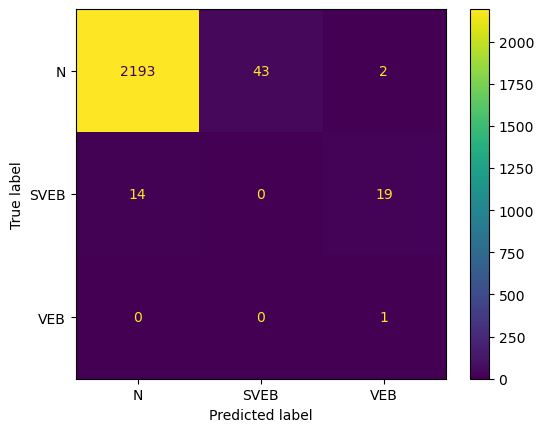

Fold 2:
  Test:  patient=1
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1859
         1.0       0.05      0.33      0.09         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1862
   macro avg       0.35      0.44      0.36      1862
weighted avg       1.00      0.99      0.99      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.050000  0.0  0.985499     0.350000      0.998469
recall        0.986552  0.333333  NaN  0.985499     0.439962      0.985499
f1-score      0.993230  0.086957  NaN  0.985499     0.360062      0.991770
support    1859.000000  3.000000  0.0  0.985499  1862.000000   1862.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

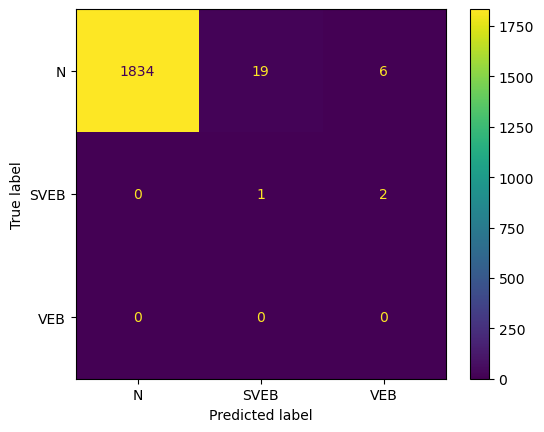

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2081
         1.0       0.05      0.50      0.08         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2083
   macro avg       0.35      0.49      0.35      2083
weighted avg       1.00      0.96      0.98      2083

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999502  0.045455  0.0  0.963514     0.348319      0.998586
recall        0.963960  0.500000  NaN  0.963514     0.487987      0.963514
f1-score      0.981409  0.083333  NaN  0.963514     0.354914      0.980547
support    2081.000000  2.000000  0.0  0.963514  2083.000000   2083.000000


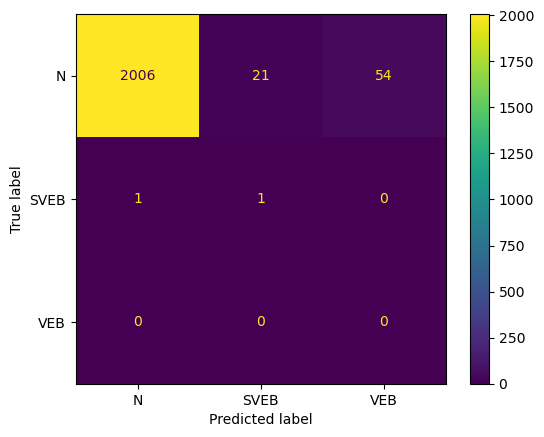

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.19      0.90      0.31        41

    accuracy                           0.93      2566
   macro avg       0.40      0.61      0.43      2566
weighted avg       0.99      0.93      0.96      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998732  0.0   0.188776  0.934918     0.395836      0.985790
recall        0.935446  NaN   0.902439  0.934918     0.612628      0.934918
f1-score      0.966053  NaN   0.312236  0.934918     0.426096      0.955606
support    2525.000000  0.0  41.000000  0.934918  2566.000000   2566.000000


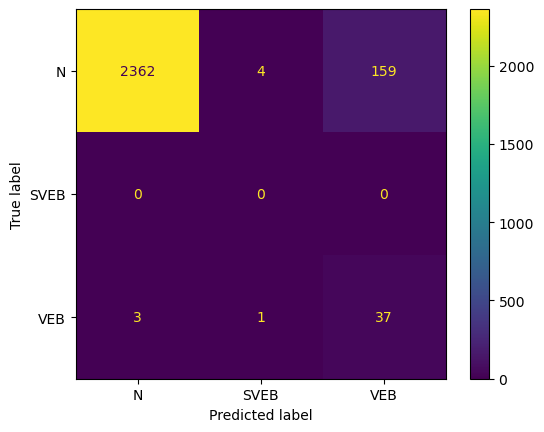

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.51      0.67       520

    accuracy                           0.87      2026
   macro avg       0.63      0.50      0.54      2026
weighted avg       0.91      0.87      0.87      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.884841  0.0    1.000000  0.873149     0.628280      0.914398
recall        1.000000  NaN    0.505769  0.873149     0.501923      0.873149
f1-score      0.938903  NaN    0.671775  0.873149     0.536893      0.870341
support    1506.000000  0.0  520.000000  0.873149  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

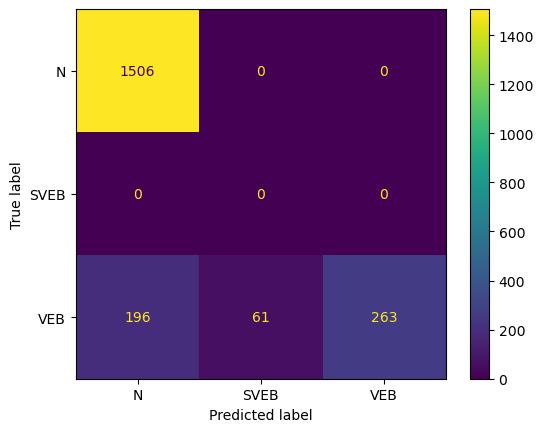

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      1739
         1.0       0.05      0.50      0.10         4
         2.0       0.05      0.47      0.10        17

    accuracy                           0.90      1760
   macro avg       0.37      0.62      0.38      1760
weighted avg       0.98      0.90      0.94      1760

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.995556  0.054054   0.054054  0.896591     0.367888   
recall        0.901668  0.500000   0.470588  0.896591     0.624085   
f1-score      0.946288  0.097561   0.096970  0.896591     0.380273   
support    1739.000000  4.000000  17.000000  0.896591  1760.000000   

           weighted avg  
precision      0.984322  
recall         0.896591  
f1-score       0.936156  
support     1760.000000  


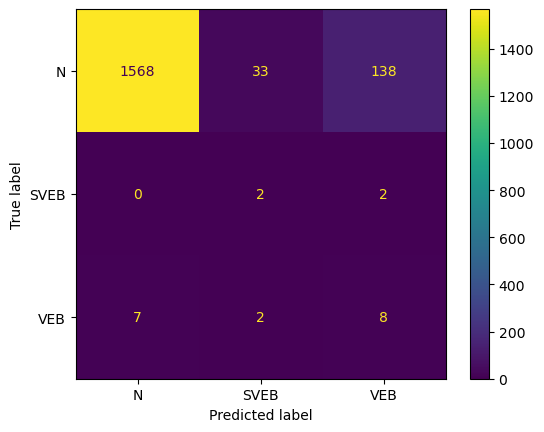

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.04      0.84      0.08        38

    accuracy                           0.70      2529
   macro avg       0.35      0.51      0.30      2529
weighted avg       0.98      0.70      0.81      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998857  0.0   0.041885  0.703836     0.346914      0.984478
recall        0.701726  NaN   0.842105  0.703836     0.514610      0.703836
f1-score      0.824334  NaN   0.079800  0.703836     0.301378      0.813147
support    2491.000000  0.0  38.000000  0.703836  2529.000000   2529.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

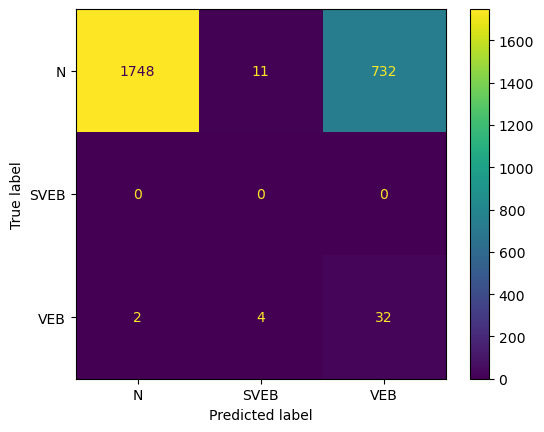

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.83      2123
   macro avg       0.33      0.61      0.30      2123
weighted avg       1.00      0.83      0.91      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.003436    0.8309     0.334479      0.999531
recall        0.830820  NaN  1.000000    0.8309     0.610273      0.830900
f1-score      0.907593  NaN  0.006849    0.8309     0.304814      0.907169
support    2122.000000  0.0  1.000000    0.8309  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

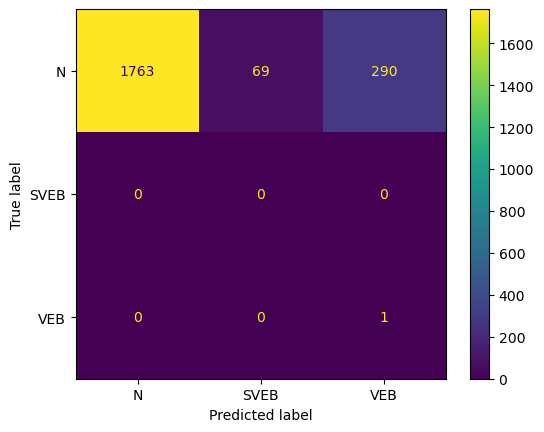

Fold 9:
  Test:  patient=8
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2536
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2538
   macro avg       0.33      0.33      0.33      2538
weighted avg       1.00      0.98      0.99      2538

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.983452     0.333333      0.999212
recall        0.984227  0.0  NaN  0.983452     0.328076      0.983452
f1-score      0.992051  0.0  NaN  0.983452     0.330684      0.991269
support    2536.000000  2.0  0.0  0.983452  2538.000000   2538.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

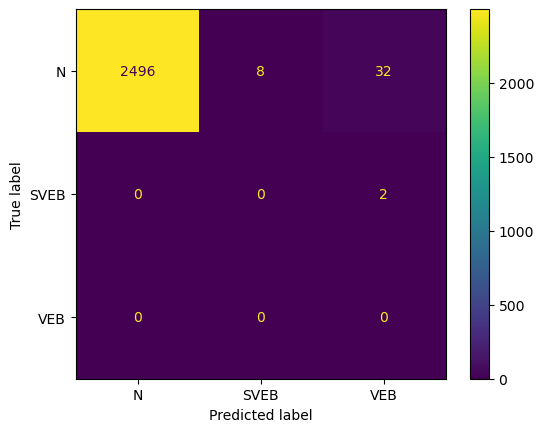

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       0.99      0.99      0.99      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998312  0.0  0.0  0.988852     0.332771      0.994973
recall        0.992170  0.0  NaN  0.988852     0.330723      0.988852
f1-score      0.995231  0.0  NaN  0.988852     0.331744      0.991903
support    1788.000000  6.0  0.0  0.988852  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

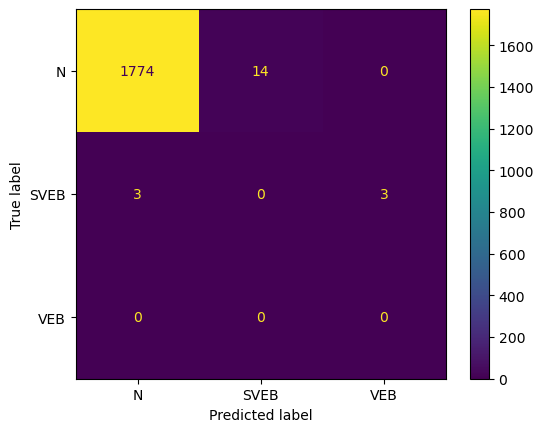

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      1819
         1.0       0.06      0.08      0.07        12
         2.0       0.20      0.72      0.31        43

    accuracy                           0.91      1874
   macro avg       0.42      0.58      0.44      1874
weighted avg       0.97      0.91      0.94      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.989994   0.058824   0.196203  0.914621     0.415007   
recall        0.924684   0.083333   0.720930  0.914621     0.576316   
f1-score      0.956225   0.068966   0.308458  0.914621     0.444549   
support    1819.000000  12.000000  43.000000  0.914621  1874.000000   

           weighted avg  
precision      0.965817  
recall         0.914621  
f1-score       0.935680  
support     1874.000000  


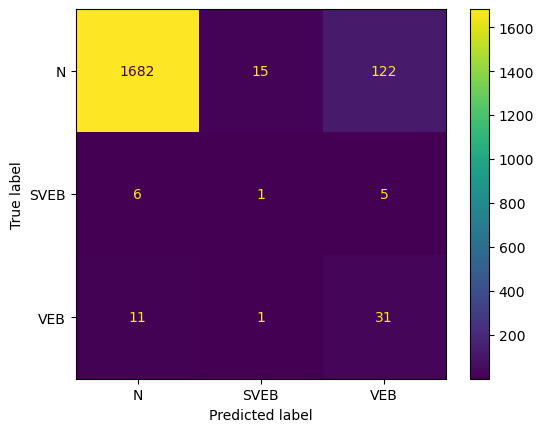

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1952
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      1952
   macro avg       0.50      0.50      0.50      1952
weighted avg       1.00      1.00      1.00      1952

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.998975     0.500000      1.000000
recall        0.998975  NaN  0.998975     0.499488      0.998975
f1-score      0.999487  NaN  0.998975     0.499744      0.999487
support    1952.000000  0.0  0.998975  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

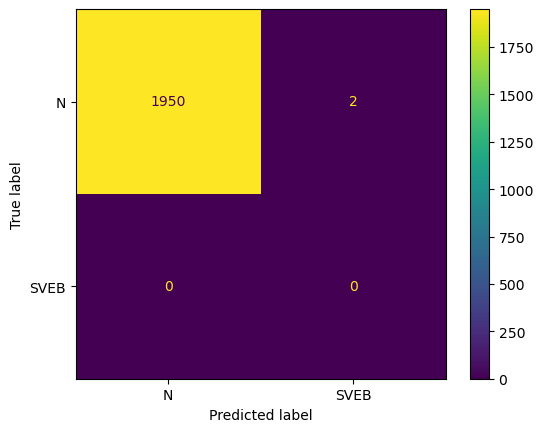

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.94      0.95      0.95       109

    accuracy                           1.00      2411
   macro avg       0.65      0.65      0.65      2411
weighted avg       1.00      1.00      1.00      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998695  0.0    0.936937  0.995023     0.645210      0.995488
recall        0.997392  0.0    0.954128  0.995023     0.650507      0.995023
f1-score      0.998043  0.0    0.945455  0.995023     0.647833      0.995252
support    2301.000000  1.0  109.000000  0.995023  2411.000000   2411.000000


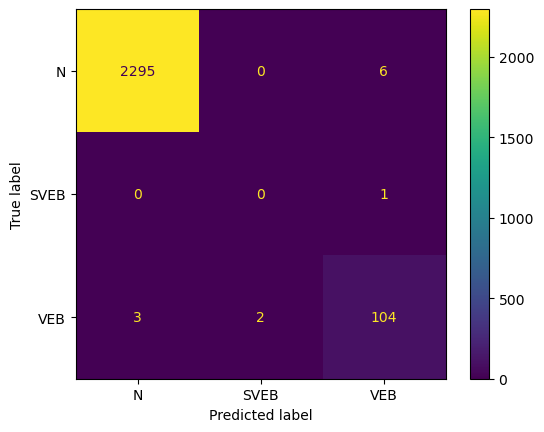

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1534
   macro avg       0.33      0.33      0.33      1534
weighted avg       1.00      0.98      0.99      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.982399     0.333333      0.999348
recall        0.983040  0.0  NaN  0.982399     0.327680      0.982399
f1-score      0.991447  0.0  NaN  0.982399     0.330482      0.990801
support    1533.000000  1.0  0.0  0.982399  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

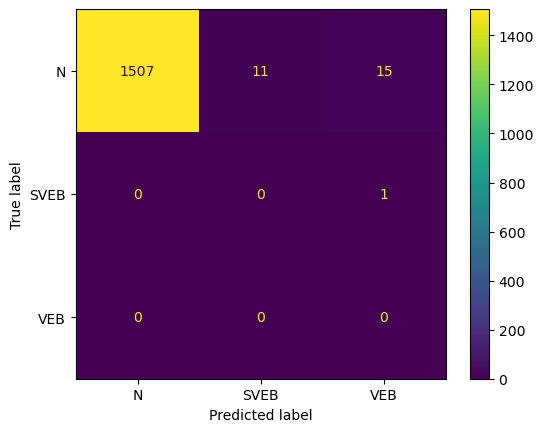

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.98      0.53      0.68      2165
         1.0       0.78      0.15      0.25        96
         2.0       0.01      0.75      0.02        16

    accuracy                           0.51      2277
   macro avg       0.59      0.47      0.32      2277
weighted avg       0.96      0.51      0.66      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.976884   0.777778   0.010999  0.512516     0.588553   
recall        0.527021   0.145833   0.750000  0.512516     0.474285   
f1-score      0.684668   0.245614   0.021680  0.512516     0.317321   
support    2165.000000  96.000000  16.000000  0.512516  2277.000000   

           weighted avg  
precision      0.961702  
recall         0.512516  
f1-score       0.661499  
support     2277.000000  


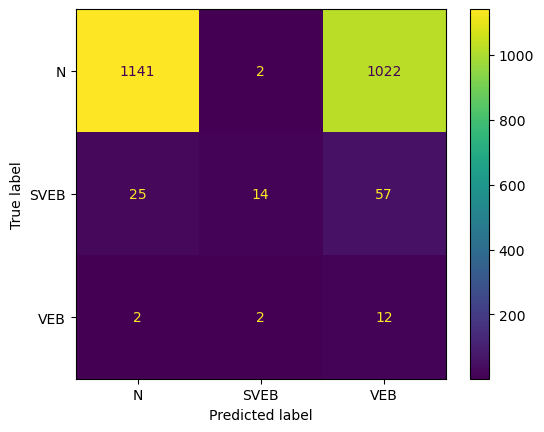

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.60      0.03      0.05       444

    accuracy                           0.78      1986
   macro avg       0.52      0.34      0.34      1986
weighted avg       0.87      0.78      0.77      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.952795  0.0    0.600000  0.778449     0.517598      0.873922
recall        0.994812  NaN    0.027027  0.778449     0.340613      0.778449
f1-score      0.973350  NaN    0.051724  0.778449     0.341691      0.767307
support    1542.000000  0.0  444.000000  0.778449  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

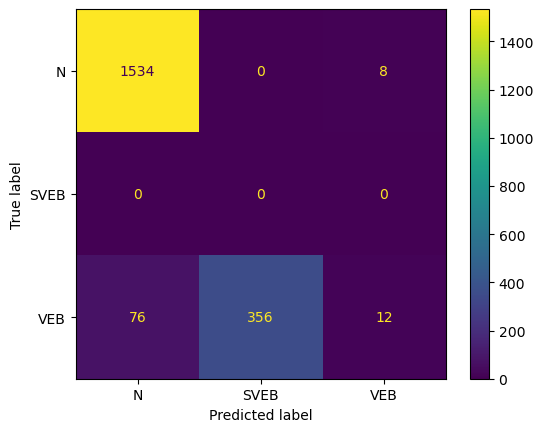

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1860
         1.0       0.11      1.00      0.20         1
         2.0       0.50      1.00      0.67         1

    accuracy                           1.00      1862
   macro avg       0.54      1.00      0.62      1862
weighted avg       1.00      1.00      1.00      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.111111  0.500000  0.995166     0.537037   
recall        0.995161  1.000000  1.000000  0.995166     0.998387   
f1-score      0.997575  0.200000  0.666667  0.995166     0.621414   
support    1860.000000  1.000000  1.000000  0.995166  1862.000000   

           weighted avg  
precision      0.999254  
recall         0.995166  
f1-score       0.996969  
support     1862.000000  


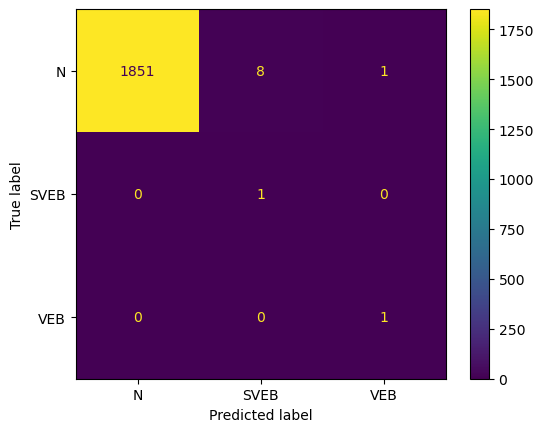

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.50      0.50      0.50      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.998384     0.500000      1.000000
recall        0.998384  NaN  0.998384     0.499192      0.998384
f1-score      0.999191  NaN  0.998384     0.499596      0.999191
support    2475.000000  0.0  0.998384  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

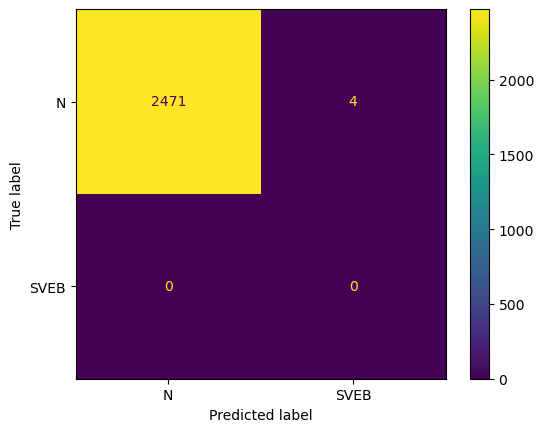

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.95      1517
   macro avg       0.33      0.32      0.32      1517
weighted avg       1.00      0.95      0.97      1517

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997924  0.0  0.0   0.95056     0.332641      0.995950
recall        0.952444  NaN  0.0   0.95056     0.317481      0.950560
f1-score      0.974654  NaN  0.0   0.95056     0.324885      0.972726
support    1514.000000  0.0  3.0   0.95056  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

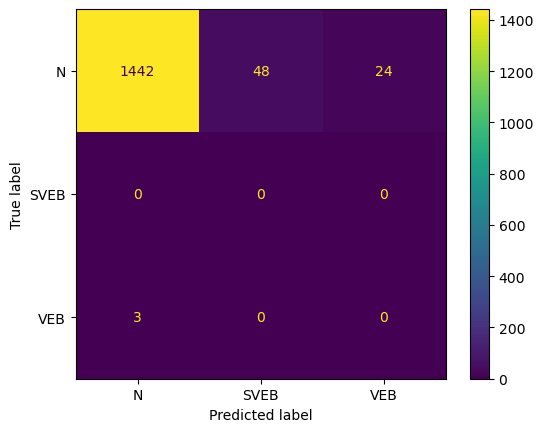

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.97      0.48      0.64      1535
         1.0       0.20      0.03      0.06        31
         2.0       0.04      0.70      0.07        47

    accuracy                           0.47      1613
   macro avg       0.40      0.40      0.26      1613
weighted avg       0.93      0.47      0.61      1613

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.968170   0.200000   0.038642  0.473652     0.402270   
recall        0.475570   0.032258   0.702128  0.473652     0.403319   
f1-score      0.637833   0.055556   0.073252  0.473652     0.255547   
support    1535.000000  31.000000  47.000000  0.473652  1613.000000   

           weighted avg  
precision      0.926322  
recall         0.473652  
f1-score       0.610192  
support     1613.000000  


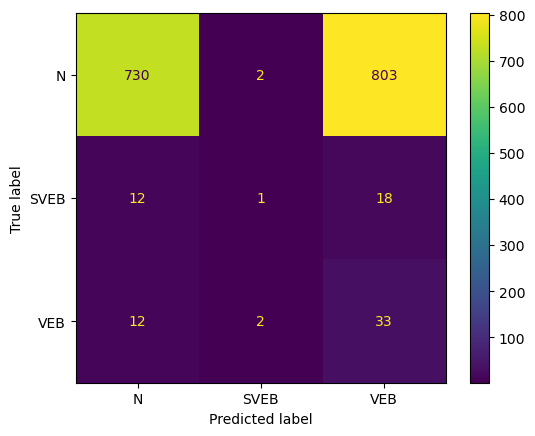

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1742
         1.0       0.03      0.03      0.03        30
         2.0       0.97      0.86      0.91       826

    accuracy                           0.93      2598
   macro avg       0.64      0.62      0.63      2598
weighted avg       0.93      0.93      0.93      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.931373   0.032258    0.969904  0.931486     0.644512   
recall        0.981630   0.033333    0.858354  0.931486     0.624439   
f1-score      0.955841   0.032787    0.910726  0.931486     0.633118   
support    1742.000000  30.000000  826.000000  0.931486  2598.000000   

           weighted avg  
precision      0.933241  
recall         0.931486  
f1-score       0.930839  
support     2598.000000  


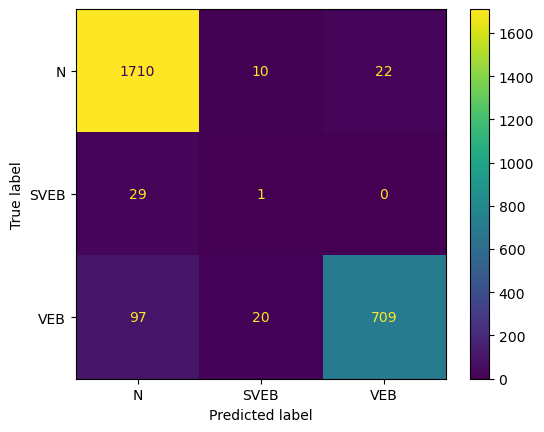

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1634
         1.0       0.43      0.14      0.21       128
         2.0       0.30      0.09      0.14       198

    accuracy                           0.83      1960
   macro avg       0.53      0.40      0.42      1960
weighted avg       0.77      0.83      0.79      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.856835    0.428571    0.300000  0.830612     0.528469   
recall        0.974296    0.140625    0.090909  0.830612     0.401943   
f1-score      0.911798    0.211765    0.139535  0.830612     0.421033   
support    1634.000000  128.000000  198.000000  0.830612  1960.000000   

           weighted avg  
precision      0.772615  
recall         0.830612  
f1-score       0.788068  
support     1960.000000  


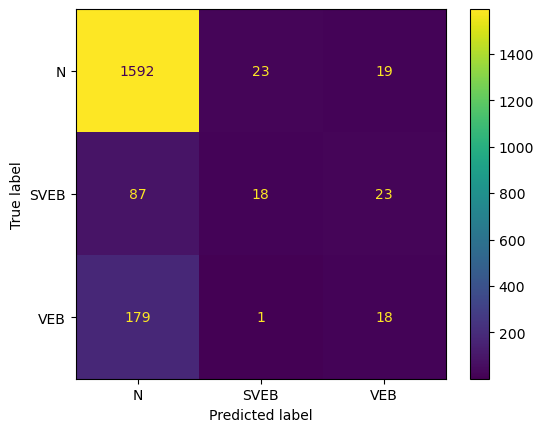

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2060
         1.0       0.38      0.24      0.29        55
         2.0       0.14      0.79      0.24        19

    accuracy                           0.93      2134
   macro avg       0.50      0.66      0.50      2134
weighted avg       0.96      0.93      0.95      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.985456   0.382353   0.141509  0.933927     0.503106   
recall        0.953883   0.236364   0.789474  0.933927     0.659907   
f1-score      0.969413   0.292135   0.240000  0.933927     0.500516   
support    2060.000000  55.000000  19.000000  0.933927  2134.000000   

           weighted avg  
precision      0.962398  
recall         0.933927  
f1-score       0.945463  
support     2134.000000  


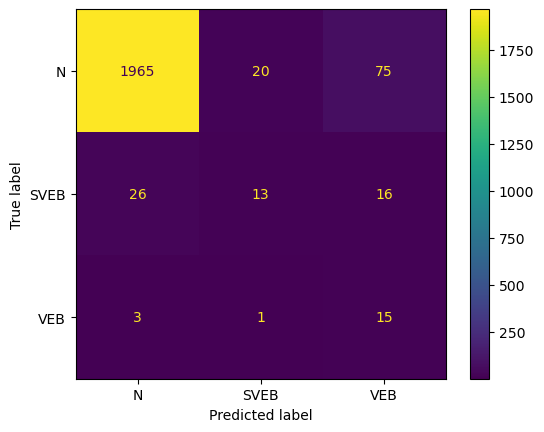

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.66      0.77      0.71       444

    accuracy                           0.88      2974
   macro avg       0.54      0.55      0.55      2974
weighted avg       0.92      0.88      0.90      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.965002  0.0    0.661509  0.875252     0.542170      0.919043
recall        0.894383  0.0    0.770270  0.875252     0.554884      0.875252
f1-score      0.928351  0.0    0.711759  0.875252     0.546703      0.895391
support    2528.000000  2.0  444.000000  0.875252  2974.000000   2974.000000


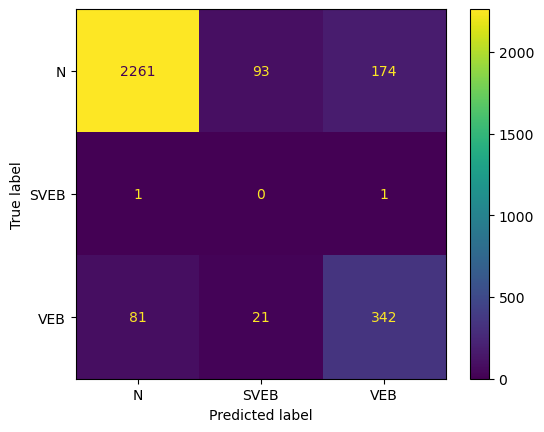

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2570
         1.0       0.50      0.67      0.57         3
         2.0       1.00      0.85      0.92        71

    accuracy                           1.00      2644
   macro avg       0.83      0.84      0.83      2644
weighted avg       1.00      1.00      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.995736  0.500000   1.000000  0.995083     0.831912   
recall        0.999611  0.666667   0.845070  0.995083     0.837116   
f1-score      0.997670  0.571429   0.916031  0.995083     0.828376   
support    2570.000000  3.000000  71.000000  0.995083  2644.000000   

           weighted avg  
precision      0.995288  
recall         0.995083  
f1-score       0.994994  
support     2644.000000  


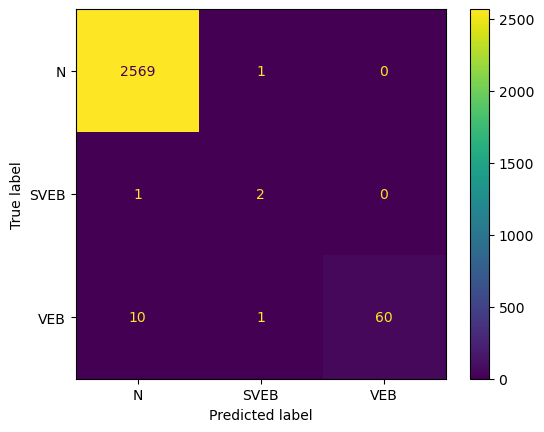

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.63      0.12      0.21      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.05      0.38      0.09       210

    accuracy                           0.15      1859
   macro avg       0.23      0.17      0.10      1859
weighted avg       0.53      0.15      0.18      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.630363    0.0    0.052083  0.145777     0.227482      0.529095
recall        0.123785    0.0    0.380952  0.145777     0.168246      0.145777
f1-score      0.206934    0.0    0.091638  0.145777     0.099524      0.182110
support    1543.000000  106.0  210.000000  0.145777  1859.000000   1859.000000


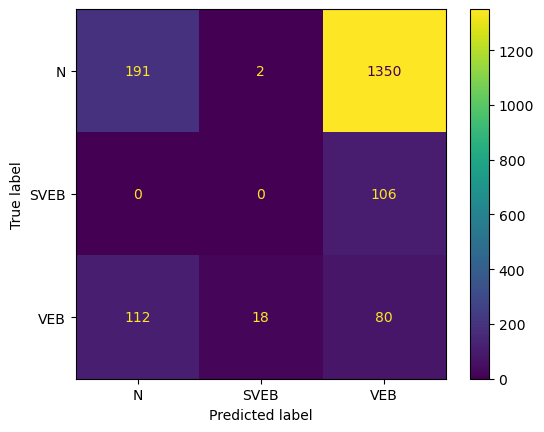

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.98      0.33      0.49       992

    accuracy                           0.73      2579
   macro avg       0.58      0.44      0.45      2579
weighted avg       0.84      0.73      0.71      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.751694  0.0    0.978788  0.727414     0.576827      0.838462
recall        0.979811  0.0    0.325605  0.727414     0.435139      0.727414
f1-score      0.850726  0.0    0.488654  0.727414     0.446460      0.710797
support    1585.000000  2.0  992.000000  0.727414  2579.000000   2579.000000


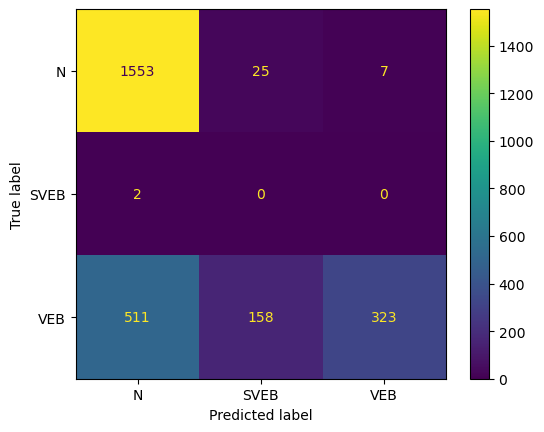

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2620
         1.0       0.91      0.14      0.24       383
         2.0       0.01      1.00      0.02         1

    accuracy                           0.87      3004
   macro avg       0.61      0.71      0.40      3004
weighted avg       0.90      0.87      0.85      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.897831    0.913793  0.011364   0.87217     0.607662   
recall        0.979389    0.138381  1.000000   0.87217     0.705924   
f1-score      0.936838    0.240363  0.022472   0.87217     0.399891   
support    2620.000000  383.000000  1.000000   0.87217  3004.000000   

           weighted avg  
precision      0.899571  
recall         0.872170  
f1-score       0.847736  
support     3004.000000  


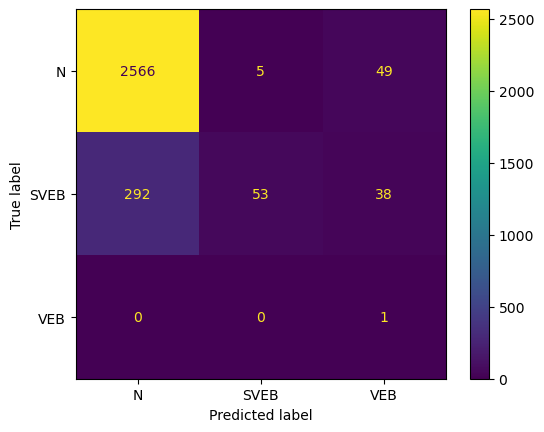

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2422
         1.0       0.09      0.36      0.14        22
         2.0       0.81      0.66      0.73       195

    accuracy                           0.93      2639
   macro avg       0.62      0.66      0.61      2639
weighted avg       0.96      0.93      0.94      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.975272   0.086022    0.806250  0.933687     0.622515   
recall        0.960776   0.363636    0.661538  0.933687     0.661984   
f1-score      0.967970   0.139130    0.726761  0.933687     0.611287   
support    2422.000000  22.000000  195.000000  0.933687  2639.000000   

           weighted avg  
precision      0.955370  
recall         0.933687  
f1-score       0.943237  
support     2639.000000  


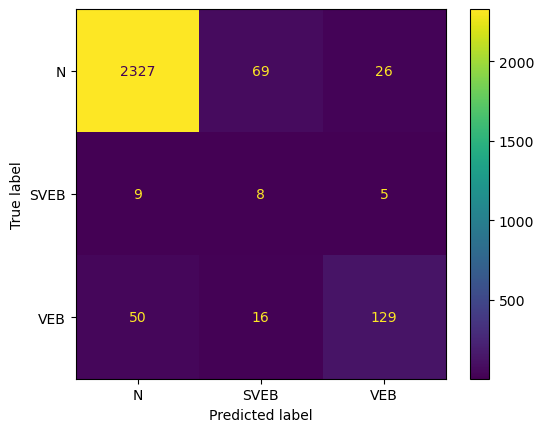

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2747
   macro avg       0.33      0.33      0.33      2747
weighted avg       1.00      0.99      1.00      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.990171     0.333333      1.000000
recall        0.990171  NaN  NaN  0.990171     0.330057      0.990171
f1-score      0.995061  NaN  NaN  0.990171     0.331687      0.995061
support    2747.000000  0.0  0.0  0.990171  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

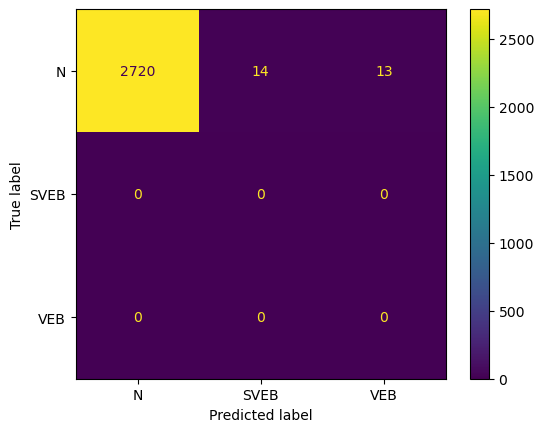

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2640
         1.0       0.29      0.71      0.41        28
         2.0       0.71      0.40      0.52       220

    accuracy                           0.94      2888
   macro avg       0.65      0.70      0.63      2888
weighted avg       0.94      0.94      0.93      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.964352   0.285714    0.712000  0.936981     0.654022   
recall        0.983712   0.714286    0.404545  0.936981     0.700848   
f1-score      0.973936   0.408163    0.515942  0.936981     0.632680   
support    2640.000000  28.000000  220.000000  0.936981  2888.000000   

           weighted avg  
precision      0.938549  
recall         0.936981  
f1-score       0.933562  
support     2888.000000  


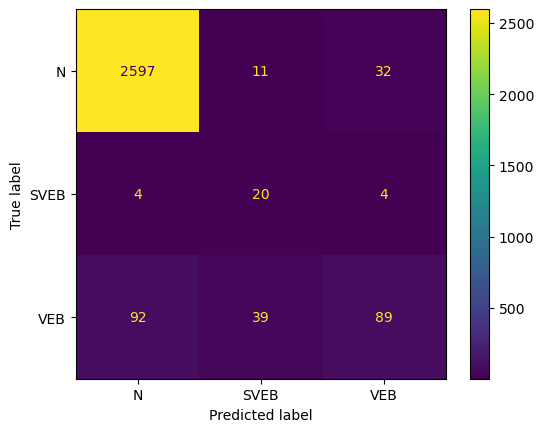

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.72      0.82      0.77       256

    accuracy                           0.94      2258
   macro avg       0.57      0.59      0.58      2258
weighted avg       0.95      0.94      0.94      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.981006  0.0    0.715254   0.93977     0.565420      0.950877
recall        0.954545  NaN    0.824219   0.93977     0.592921      0.939770
f1-score      0.967595  NaN    0.765880   0.93977     0.577825      0.944726
support    2002.000000  0.0  256.000000   0.93977  2258.000000   2258.000000


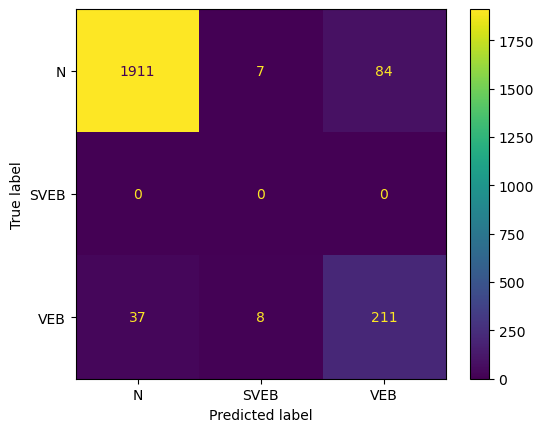

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3194
         1.0       0.06      0.67      0.11         3
         2.0       0.97      0.64      0.77       164

    accuracy                           0.98      3361
   macro avg       0.67      0.77      0.63      3361
weighted avg       0.99      0.98      0.98      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.989130  0.060606    0.972222   0.97947     0.673986   
recall        0.997182  0.666667    0.640244   0.97947     0.768031   
f1-score      0.993140  0.111111    0.772059   0.97947     0.625437   
support    3194.000000  3.000000  164.000000   0.97947  3361.000000   

           weighted avg  
precision      0.987477  
recall         0.979470  
f1-score       0.981565  
support     3361.000000  


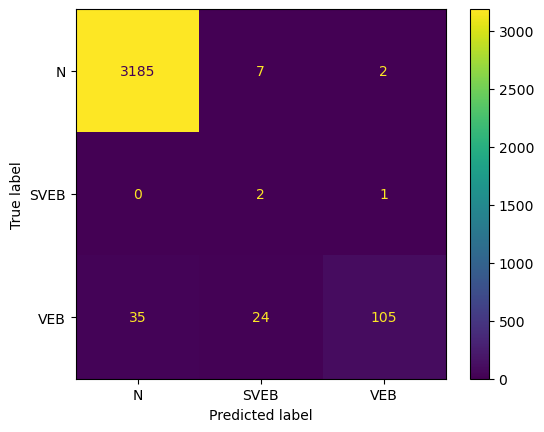

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      2081
         1.0       0.03      0.14      0.05         7
         2.0       0.29      0.81      0.42        64

    accuracy                           0.92      2152
   macro avg       0.44      0.63      0.48      2152
weighted avg       0.97      0.92      0.94      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.992264  0.031250   0.287293   0.91868     0.436936   
recall        0.924556  0.142857   0.812500   0.91868     0.626638   
f1-score      0.957214  0.051282   0.424490   0.91868     0.477662   
support    2081.000000  7.000000  64.000000   0.91868  2152.000000   

           weighted avg  
precision      0.968172  
recall         0.918680  
f1-score       0.938424  
support     2152.000000  


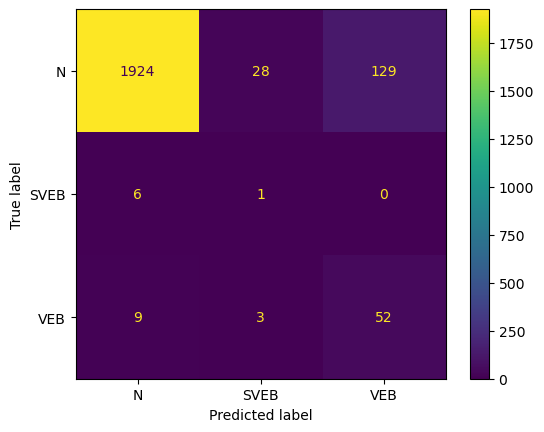

Fold 35:
  Test:  patient=34


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1953
         1.0       1.00      0.56      0.72        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      2047
   macro avg       0.66      0.52      0.57      2047
weighted avg       0.98      0.98      0.98      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.982880   1.000000  0.0  0.979482     0.660960      0.983666
recall        0.999488   0.563830  NaN  0.979482     0.521106      0.979482
f1-score      0.991114   0.721088  NaN  0.979482     0.570734      0.978715
support    1953.000000  94.000000  0.0  0.979482  2047.000000   2047.000000


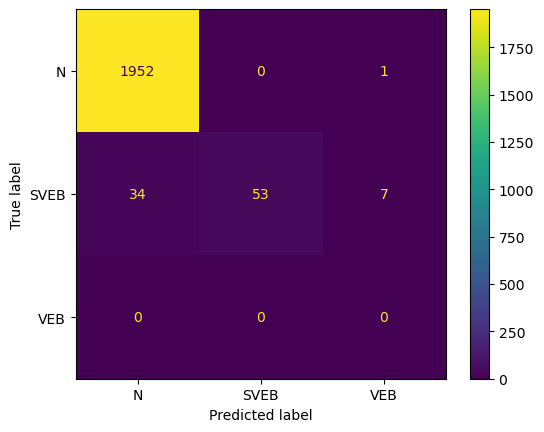

Fold 36:
  Test:  patient=35


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.76      0.86       396

    accuracy                           0.93      2426
   macro avg       0.65      0.57      0.61      2426
weighted avg       0.97      0.93      0.95      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.968750  0.0    0.983713  0.929514     0.650821      0.971192
recall        0.962069  NaN    0.762626  0.929514     0.574898      0.929514
f1-score      0.965398  NaN    0.859175  0.929514     0.608191      0.948059
support    2030.000000  0.0  396.000000  0.929514  2426.000000   2426.000000


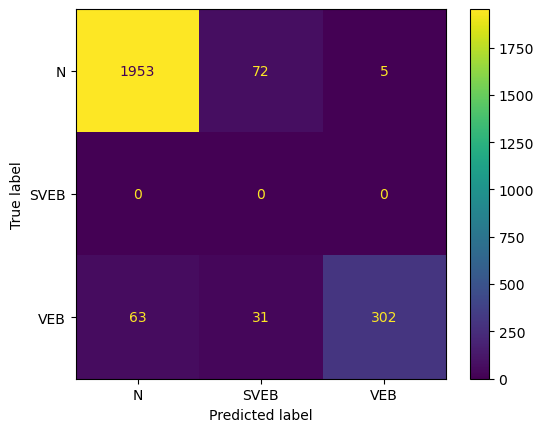

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      2273
         1.0       0.25      0.28      0.26       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.84      2482
   macro avg       0.40      0.39      0.39      2482
weighted avg       0.88      0.84      0.86      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.942937    0.250000  0.0  0.835616     0.397646      0.884588
recall        0.886934    0.277512  NaN  0.835616     0.388149      0.835616
f1-score      0.914078    0.263039  NaN  0.835616     0.392372      0.859257
support    2273.000000  209.000000  0.0  0.835616  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

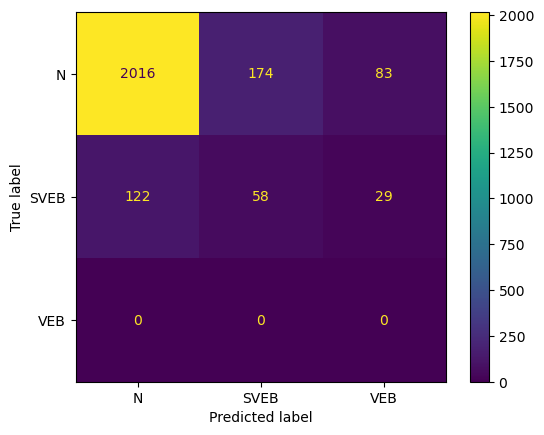

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      2044
         1.0       0.32      0.14      0.19        73
         2.0       0.88      0.57      0.69       473

    accuracy                           0.89      2590
   macro avg       0.70      0.57      0.61      2590
weighted avg       0.88      0.89      0.88      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.902710   0.322581    0.879870   0.89305     0.701720   
recall        0.994129   0.136986    0.572939   0.89305     0.568018   
f1-score      0.946217   0.192308    0.693982   0.89305     0.610835   
support    2044.000000  73.000000  473.000000   0.89305  2590.000000   

           weighted avg  
precision      0.882188  
recall         0.893050  
f1-score       0.878903  
support     2590.000000  


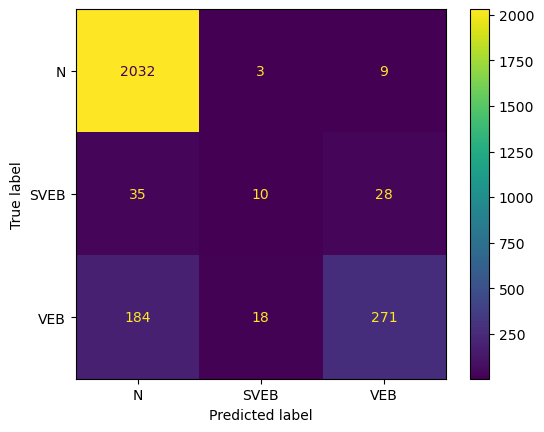

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1687
         1.0       0.01      0.67      0.03         3
         2.0       0.82      0.73      0.77       362

    accuracy                           0.87      2052
   macro avg       0.60      0.76      0.58      2052
weighted avg       0.93      0.87      0.90      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.958991  0.013793    0.816770  0.869883     0.596518   
recall        0.901008  0.666667    0.726519  0.869883     0.764731   
f1-score      0.929095  0.027027    0.769006  0.869883     0.575043   
support    1687.000000  3.000000  362.000000  0.869883  2052.000000   

           weighted avg  
precision      0.932519  
recall         0.869883  
f1-score       0.899535  
support     2052.000000  


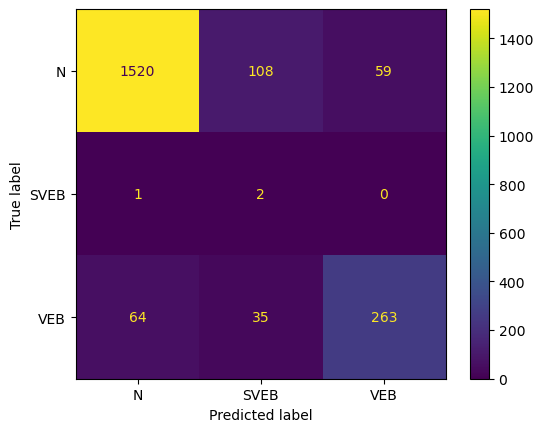

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.01         1

    accuracy                           0.89      2255
   macro avg       0.34      0.63      0.32      2255
weighted avg       1.00      0.89      0.94      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.006329  0.888692     0.335443      0.999559
recall        0.888642  NaN  1.000000  0.888692     0.629547      0.888692
f1-score      0.941038  NaN  0.012579  0.888692     0.317872      0.940627
support    2254.000000  0.0  1.000000  0.888692  2255.000000   2255.000000


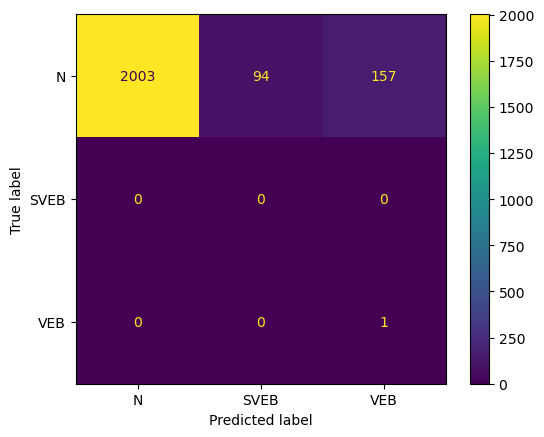

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.04      1.00      0.08         2

    accuracy                           0.82      1570
   macro avg       0.35      0.61      0.33      1570
weighted avg       1.00      0.82      0.90      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.041667  0.817834     0.347222      0.998142
recall        0.818124  0.0  1.000000  0.817834     0.606041      0.817834
f1-score      0.899965  0.0  0.080000  0.817834     0.326655      0.898347
support    1567.000000  1.0  2.000000  0.817834  1570.000000   1570.000000


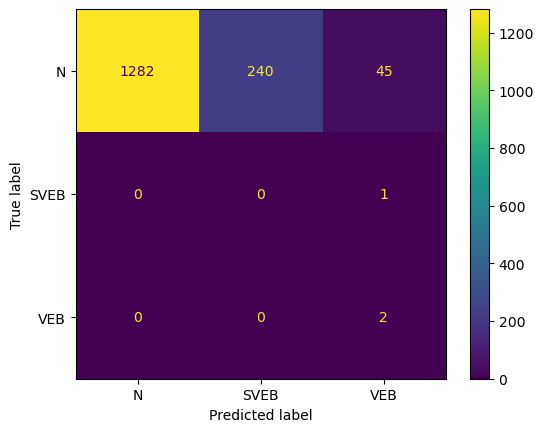

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.23      1.00      0.38       398
         1.0       1.00      0.05      0.09      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.26      1779
   macro avg       0.41      0.35      0.16      1779
weighted avg       0.83      0.26      0.16      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.234532     1.000000  0.0  0.261945     0.411511      0.828748
recall       1.000000     0.049240  NaN  0.261945     0.349747      0.261945
f1-score     0.379952     0.093858  NaN  0.261945     0.157937      0.157863
support    398.000000  1381.000000  0.0  0.261945  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

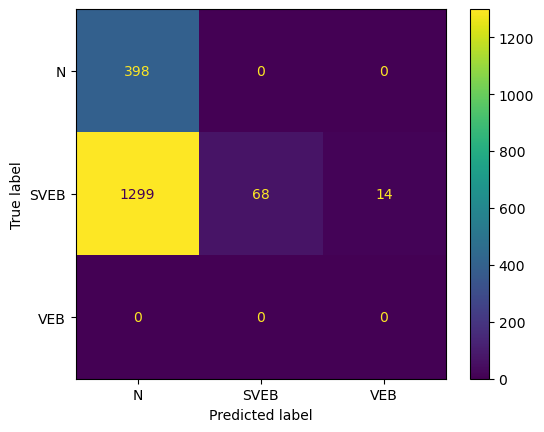

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2229
         1.0       0.01      0.57      0.02         7
         2.0       0.98      0.78      0.87       831

    accuracy                           0.86      3067
   macro avg       0.66      0.75      0.61      3067
weighted avg       0.98      0.86      0.91      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.981123  0.010178    0.983359  0.857189     0.658220   
recall        0.886048  0.571429    0.782190  0.857189     0.746555   
f1-score      0.931165  0.020000    0.871314  0.857189     0.607493   
support    2229.000000  7.000000  831.000000  0.857189  3067.000000   

           weighted avg  
precision      0.979512  
recall         0.857189  
f1-score       0.912868  
support     3067.000000  


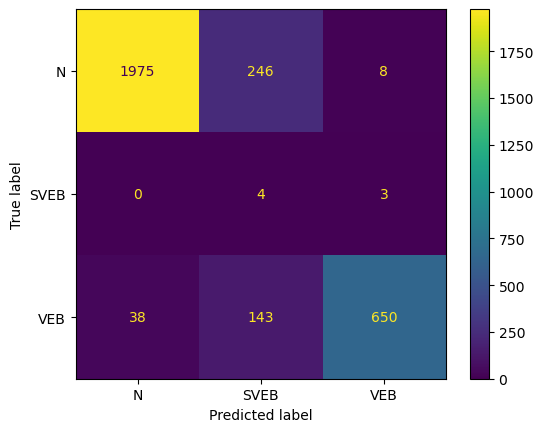

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86      2699
         1.0       0.58      0.22      0.32        50
         2.0       0.00      1.00      0.01         3

    accuracy                           0.75      2752
   macro avg       0.52      0.66      0.40      2752
weighted avg       0.97      0.75      0.85      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.982792   0.578947  0.004680   0.75218     0.522140   
recall        0.761764   0.220000  1.000000   0.75218     0.660588   
f1-score      0.858276   0.318841  0.009317   0.75218     0.395478   
support    2699.000000  50.000000  3.000000   0.75218  2752.000000   

           weighted avg  
precision      0.974388  
recall         0.752180  
f1-score       0.847550  
support     2752.000000  


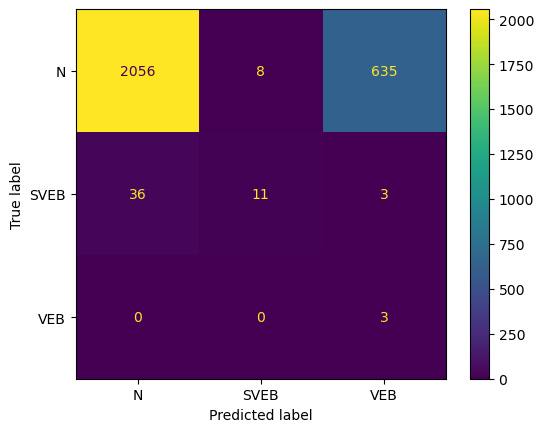

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_normal, acc_normal,confusion_matrix_final,list_fscore = cross_valid(pipe_normal, skf, X, y,groups)
end_time=time.time()

In [11]:
df_normal

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.911661   0.141635    0.404338     0.446878      0.879380
precision     0.946021   0.163484    0.355737     0.490600      0.946387
recall        0.907270   0.255726    0.700699     0.547158      0.859591
support    2047.340909  63.159091  166.880952  2269.795455   2269.795455

In [12]:
print("Time"+str(end_time-start_time))

Time379.9215142726898


In [13]:
confusion_matrix_final

array([[82111.,  1574.,  6398.],
       [ 2045.,   345.,   389.],
       [ 1880.,   968.,  4161.]])

In [14]:
list_fscore

{'patient0': {'0.0': 0.986726659167604,
  '1.0': 0.0,
  '2.0': 0.08695652173913045,
  'macro avg': 0.3578943936355781,
  'weighted avg': 0.9719987762935022},
 'patient1': {'0.0': 0.9932304359599241,
  '1.0': 0.08695652173913045,
  'macro avg': 0.3600623192330182,
  'weighted avg': 0.991770273906937},
 'patient2': {'0.0': 0.9814090019569471,
  '1.0': 0.08333333333333334,
  'macro avg': 0.35491411176342685,
  'weighted avg': 0.9805467113485712},
 'patient3': {'0.0': 0.9660531697341513,
  '2.0': 0.3122362869198312,
  'macro avg': 0.42609648555132756,
  'weighted avg': 0.9556063684109296},
 'patient4': {'0.0': 0.9389027431421446,
  '2.0': 0.6717752234993614,
  'macro avg': 0.5368926555471686,
  'weighted avg': 0.8703408920985872},
 'patient5': {'0.0': 0.9462884731442365,
  '1.0': 0.0975609756097561,
  '2.0': 0.09696969696969697,
  'macro avg': 0.3802730485745632,
  'weighted avg': 0.9361558997436087},
 'patient6': {'0.0': 0.8243338835180382,
  '2.0': 0.07980049875311722,
  'macro avg': 0.3

In [16]:
pipe_smote = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('classification', DecisionTreeClassifier())
    ])
pipe_smote

Pipeline(steps=[('sampling', SMOTE(random_state=123)),
                ('classification', DecisionTreeClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2238
         1.0       0.59      0.91      0.71        33
         2.0       0.00      0.00      0.00         1

    accuracy                           0.97      2272
   macro avg       0.53      0.63      0.57      2272
weighted avg       0.99      0.97      0.98      2272

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999080   0.588235  0.0   0.96875     0.529105      0.992673
recall        0.970063   0.909091  0.0   0.96875     0.626384      0.968750
f1-score      0.984357   0.714286  0.0   0.96875     0.566214      0.980001
support    2238.000000  33.000000  1.0   0.96875  2272.000000   2272.000000


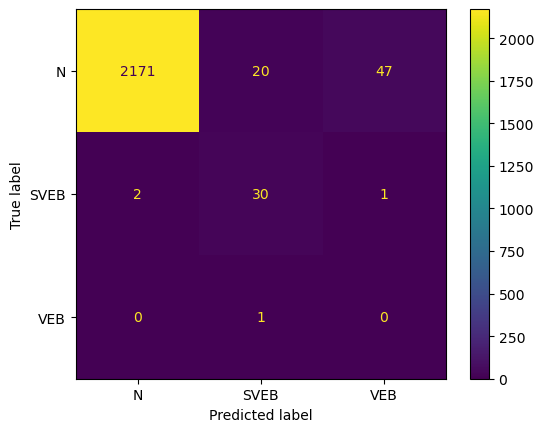

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1859
         1.0       0.04      0.67      0.07         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      1862
   macro avg       0.35      0.54      0.35      1862
weighted avg       1.00      0.96      0.98      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.037037  0.0  0.957035     0.345679      0.998449
recall        0.957504  0.666667  NaN  0.957035     0.541390      0.957035
f1-score      0.978291  0.070175  NaN  0.957035     0.349489      0.976828
support    1859.000000  3.000000  0.0  0.957035  1862.000000   1862.000000


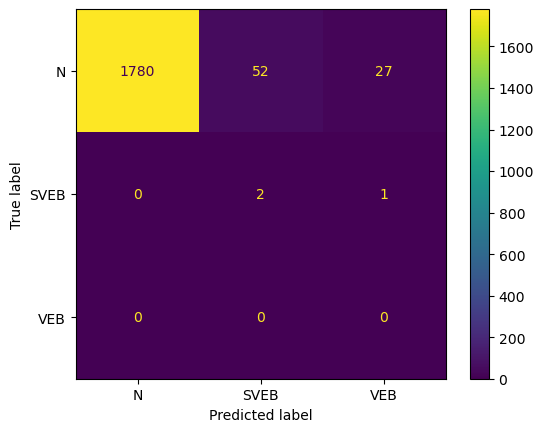

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2083
   macro avg       0.33      0.33      0.33      2083
weighted avg       1.00      0.99      0.99      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.985598     0.333333      0.999040
recall        0.986545  0.0  NaN  0.985598     0.328848      0.985598
f1-score      0.993227  0.0  NaN  0.985598     0.331076      0.992273
support    2081.000000  2.0  0.0  0.985598  2083.000000   2083.000000


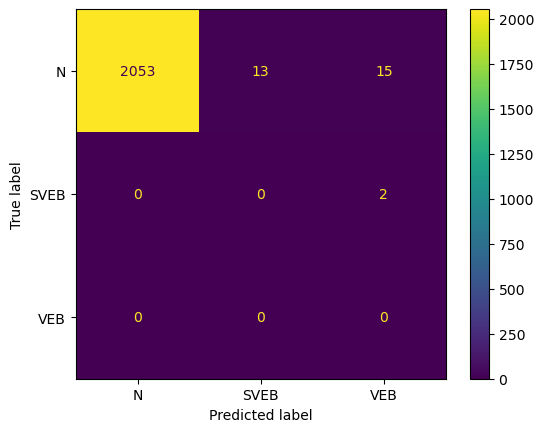

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.21      0.93      0.34        41

    accuracy                           0.93      2566
   macro avg       0.40      0.62      0.43      2566
weighted avg       0.99      0.93      0.95      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999146  0.0   0.209945  0.926734     0.403030      0.986536
recall        0.926733  NaN   0.926829  0.926734     0.617854      0.926734
f1-score      0.961578  NaN   0.342342  0.926734     0.434640      0.951684
support    2525.000000  0.0  41.000000  0.926734  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

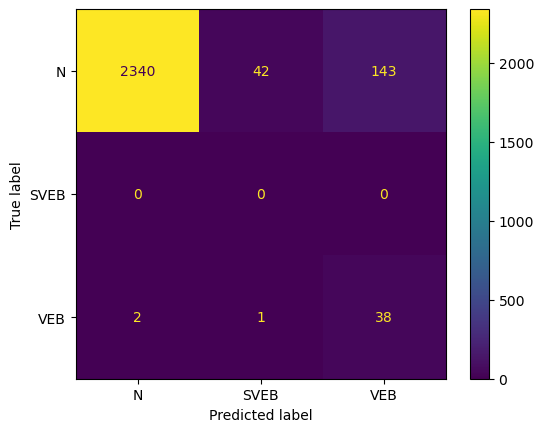

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.29      0.44       520

    accuracy                           0.81      2026
   macro avg       0.59      0.43      0.44      2026
weighted avg       0.85      0.81      0.78      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.808879  0.0    0.961538  0.811451     0.590139      0.848061
recall        0.992032  NaN    0.288462  0.811451     0.426831      0.811451
f1-score      0.891142  NaN    0.443787  0.811451     0.444976      0.776323
support    1506.000000  0.0  520.000000  0.811451  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

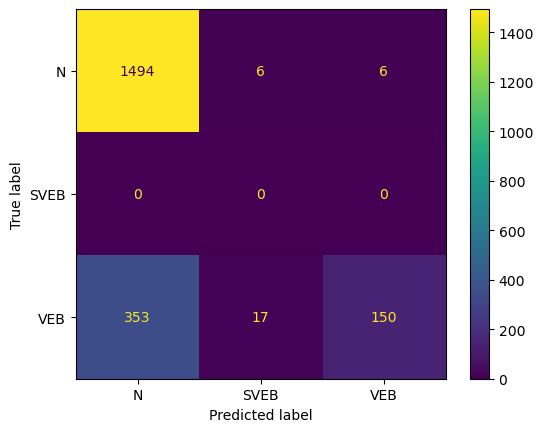

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.53      0.69      1739
         1.0       0.05      0.25      0.08         4
         2.0       0.01      0.65      0.03        17

    accuracy                           0.53      1760
   macro avg       0.35      0.48      0.26      1760
weighted avg       0.98      0.53      0.68      1760

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.991379  0.045455   0.013580  0.529545     0.350138   
recall        0.529040  0.250000   0.647059  0.529545     0.475366   
f1-score      0.689914  0.076923   0.026602  0.529545     0.264480   
support    1739.000000  4.000000  17.000000  0.529545  1760.000000   

           weighted avg  
precision      0.979785  
recall         0.529545  
f1-score       0.682114  
support     1760.000000  


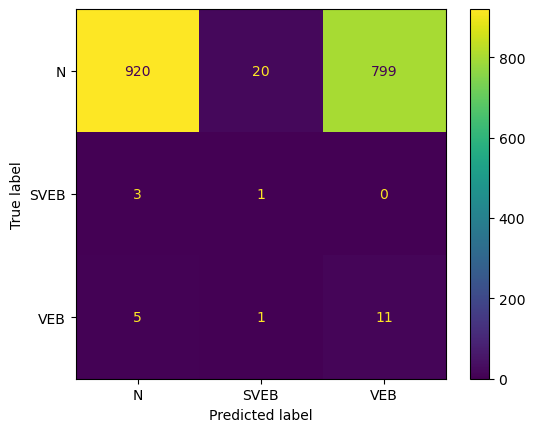

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.03      0.87      0.06        38

    accuracy                           0.55      2529
   macro avg       0.34      0.47      0.25      2529
weighted avg       0.98      0.55      0.69      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998522  0.0   0.028473  0.547252     0.342332      0.983946
recall        0.542352  NaN   0.868421  0.547252     0.470258      0.547252
f1-score      0.702914  NaN   0.055138  0.547252     0.252684      0.693180
support    2491.000000  0.0  38.000000  0.547252  2529.000000   2529.000000


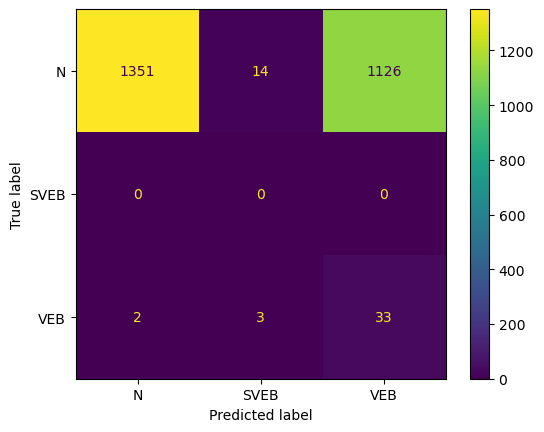

Fold 8:
  Test:  patient=7


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1

    accuracy                           0.95      2123
   macro avg       0.33      0.32      0.33      2123
weighted avg       1.00      0.95      0.98      2123

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999506  0.0  0.0  0.952426     0.333169      0.999035
recall        0.952875  NaN  0.0  0.952426     0.317625      0.952426
f1-score      0.975633  NaN  0.0  0.952426     0.325211      0.975174
support    2122.000000  0.0  1.0  0.952426  2123.000000   2123.000000


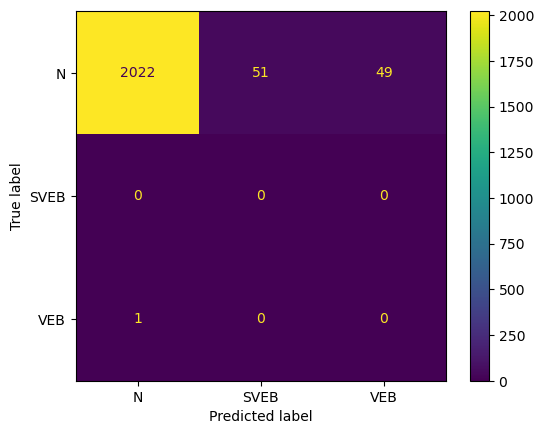

Fold 9:
  Test:  patient=8
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2536
         1.0       0.06      1.00      0.11         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      2538
   macro avg       0.35      0.65      0.36      2538
weighted avg       1.00      0.95      0.97      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.057143  0.0  0.949567     0.352381      0.999257
recall        0.949527  1.000000  NaN  0.949567     0.649842      0.949567
f1-score      0.974110  0.108108  NaN  0.949567     0.360739      0.973428
support    2536.000000  2.000000  0.0  0.949567  2538.000000   2538.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

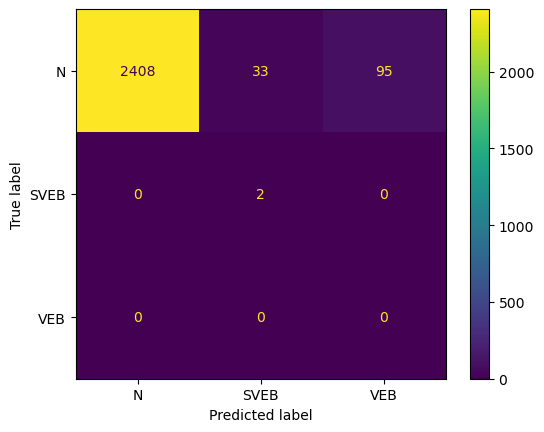

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1788
         1.0       0.09      0.50      0.15         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1794
   macro avg       0.36      0.49      0.38      1794
weighted avg       1.00      0.97      0.98      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.085714  0.0  0.973802     0.361905      0.996942
recall        0.975391  0.500000  NaN  0.973802     0.491797      0.973802
f1-score      0.987542  0.146341  NaN  0.973802     0.377961      0.984729
support    1788.000000  6.000000  0.0  0.973802  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

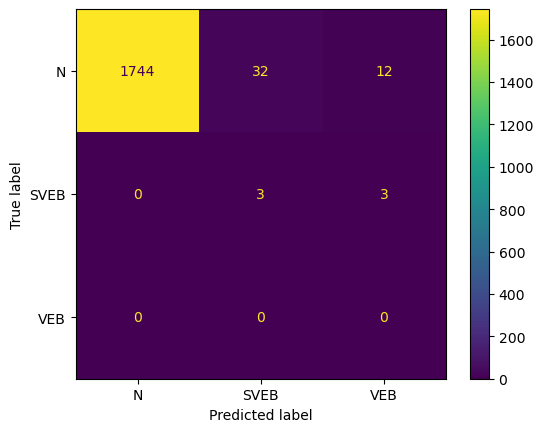

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      1819
         1.0       0.14      0.25      0.18        12
         2.0       0.08      0.56      0.14        43

    accuracy                           0.83      1874
   macro avg       0.40      0.55      0.41      1874
weighted avg       0.96      0.83      0.89      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.990279   0.142857   0.077419  0.829776     0.403518   
recall        0.840022   0.250000   0.558140  0.829776     0.549387   
f1-score      0.908983   0.181818   0.135977  0.829776     0.408926   
support    1819.000000  12.000000  43.000000  0.829776  1874.000000   

           weighted avg  
precision      0.963906  
recall         0.829776  
f1-score       0.886589  
support     1874.000000  


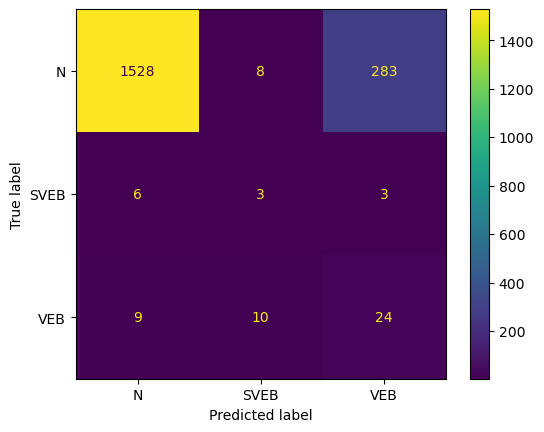

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.99      1.00      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.991803     0.333333      1.000000
recall        0.991803  NaN  NaN  0.991803     0.330601      0.991803
f1-score      0.995885  NaN  NaN  0.991803     0.331962      0.995885
support    1952.000000  0.0  0.0  0.991803  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

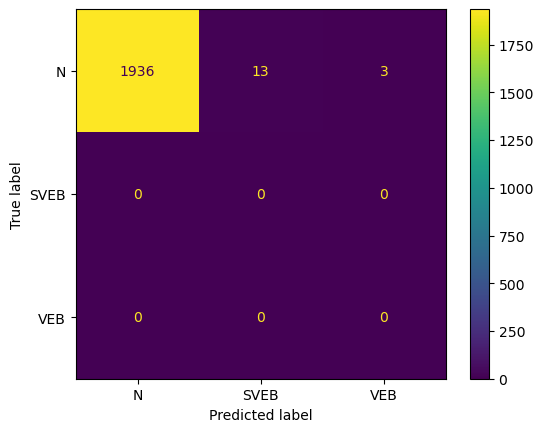

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.44      0.11      0.18       109

    accuracy                           0.89      2411
   macro avg       0.48      0.35      0.38      2411
weighted avg       0.97      0.89      0.93      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998129  0.0    0.444444  0.890087     0.480858      0.972683
recall        0.927423  0.0    0.110092  0.890087     0.345838      0.890087
f1-score      0.961478  0.0    0.176471  0.890087     0.379316      0.925589
support    2301.000000  1.0  109.000000  0.890087  2411.000000   2411.000000


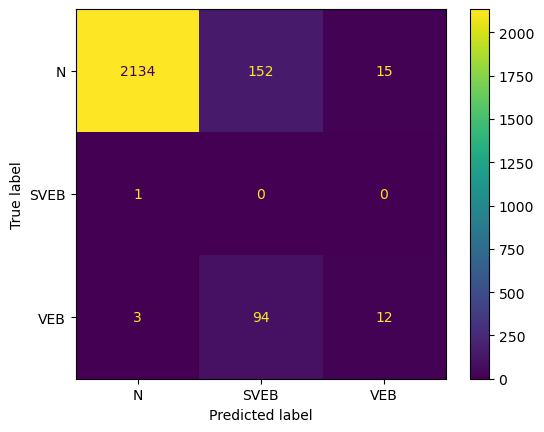

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.85      1534
   macro avg       0.33      0.28      0.31      1534
weighted avg       1.00      0.85      0.92      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999236  0.0  0.0  0.852673     0.333079      0.998585
recall        0.853229  0.0  NaN  0.852673     0.284410      0.852673
f1-score      0.920479  0.0  NaN  0.852673     0.306826      0.919878
support    1533.000000  1.0  0.0  0.852673  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

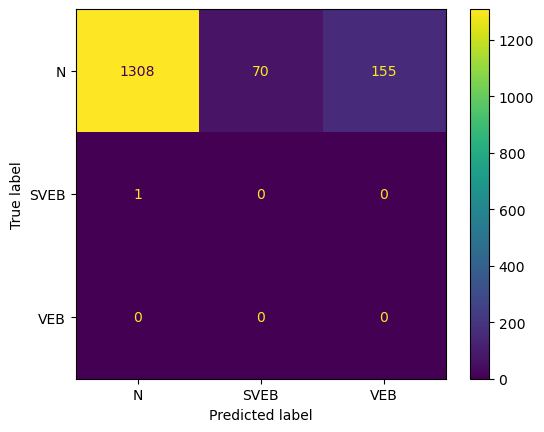

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      2165
         1.0       0.21      0.08      0.12        96
         2.0       0.03      0.69      0.05        16

    accuracy                           0.80      2277
   macro avg       0.41      0.53      0.36      2277
weighted avg       0.94      0.80      0.86      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.983544   0.210526   0.026442  0.795784     0.406837   
recall        0.828176   0.083333   0.687500  0.795784     0.533003   
f1-score      0.899198   0.119403   0.050926  0.795784     0.356509   
support    2165.000000  96.000000  16.000000  0.795784  2277.000000   

           weighted avg  
precision      0.944227  
recall         0.795784  
f1-score       0.860360  
support     2277.000000  


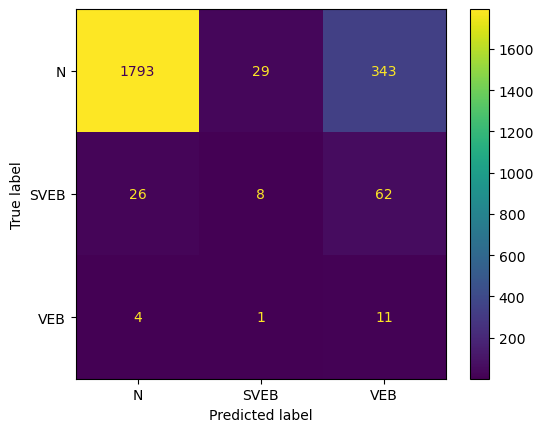

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.75      0.85       444

    accuracy                           0.93      1986
   macro avg       0.64      0.58      0.60      1986
weighted avg       0.94      0.93      0.93      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.934487  0.0    0.973837   0.93001     0.636108      0.943284
recall        0.980545  NaN    0.754505   0.93001     0.578350      0.930010
f1-score      0.956962  NaN    0.850254   0.93001     0.602405      0.933106
support    1542.000000  0.0  444.000000   0.93001  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

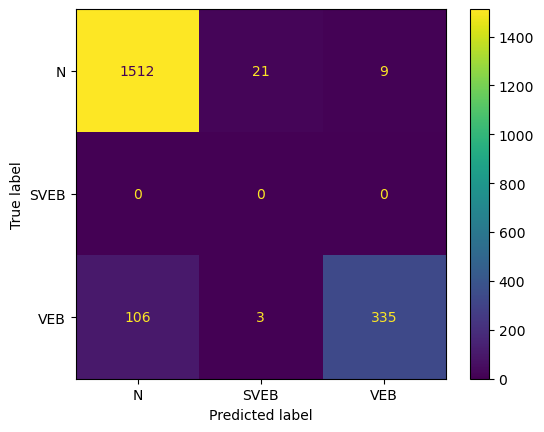

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      1860
         1.0       0.00      1.00      0.01         1
         2.0       0.03      1.00      0.07         1

    accuracy                           0.86      1862
   macro avg       0.35      0.95      0.33      1862
weighted avg       1.00      0.86      0.93      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.004405  0.034483  0.863588     0.346296   
recall        0.863441  1.000000  1.000000  0.863588     0.954480   
f1-score      0.926717  0.008772  0.066667  0.863588     0.334052   
support    1860.000000  1.000000  1.000000  0.863588  1862.000000   

           weighted avg  
precision      0.998947  
recall         0.863588  
f1-score       0.925762  
support     1862.000000  


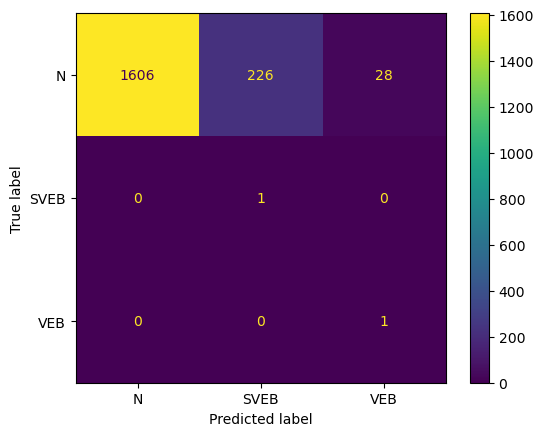

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2475
   macro avg       0.33      0.33      0.33      2475
weighted avg       1.00      0.99      1.00      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.992323     0.333333      1.000000
recall        0.992323  NaN  NaN  0.992323     0.330774      0.992323
f1-score      0.996147  NaN  NaN  0.992323     0.332049      0.996147
support    2475.000000  0.0  0.0  0.992323  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

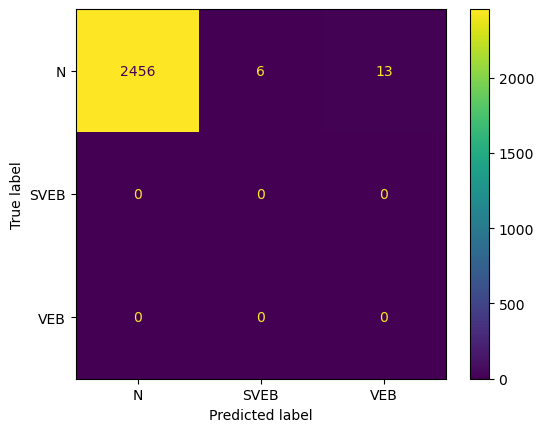

Fold 19:
  Test:  patient=18


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.95      1517
   macro avg       0.33      0.32      0.32      1517
weighted avg       1.00      0.95      0.97      1517

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999305  0.0  0.0  0.947924     0.333102      0.997329
recall        0.949802  NaN  0.0  0.947924     0.316601      0.947924
f1-score      0.973925  NaN  0.0  0.947924     0.324642      0.971999
support    1514.000000  0.0  3.0  0.947924  1517.000000   1517.000000


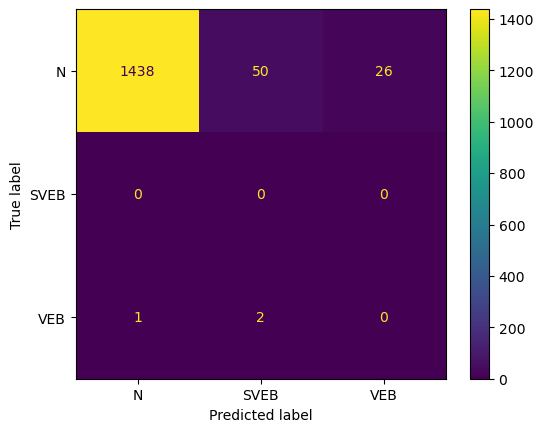

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      1535
         1.0       0.29      0.06      0.11        31
         2.0       0.17      0.68      0.27        47

    accuracy                           0.88      1613
   macro avg       0.48      0.55      0.44      1613
weighted avg       0.95      0.88      0.91      1613

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.983063   0.285714   0.169312  0.884687     0.479363   
recall        0.907492   0.064516   0.680851  0.884687     0.550953   
f1-score      0.943767   0.105263   0.271186  0.884687     0.440072   
support    1535.000000  31.000000  47.000000  0.884687  1613.000000   

           weighted avg  
precision      0.945949  
recall         0.884687  
f1-score       0.908054  
support     1613.000000  


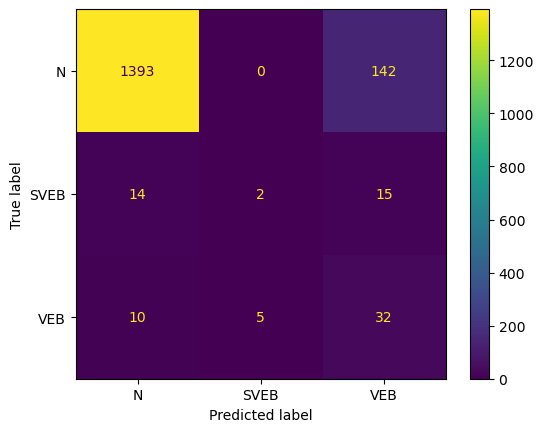

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1742
         1.0       0.04      0.07      0.05        30
         2.0       0.90      0.92      0.91       826

    accuracy                           0.92      2598
   macro avg       0.63      0.64      0.64      2598
weighted avg       0.93      0.92      0.93      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.958799   0.037736    0.903073  0.921863     0.633203   
recall        0.935132   0.066667    0.924939  0.921863     0.642246   
f1-score      0.946818   0.048193    0.913876  0.921863     0.636295   
support    1742.000000  30.000000  826.000000  0.921863  2598.000000   

           weighted avg  
precision      0.930446  
recall         0.921863  
f1-score       0.925968  
support     2598.000000  


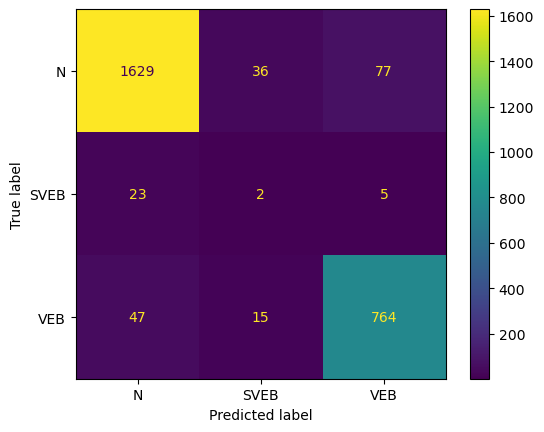

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70      1634
         1.0       0.10      0.41      0.16       128
         2.0       0.23      0.42      0.30       198

    accuracy                           0.55      1960
   macro avg       0.40      0.47      0.39      1960
weighted avg       0.77      0.55      0.62      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.885446    0.100379    0.228883   0.55102     0.404903   
recall        0.577111    0.414062    0.424242   0.55102     0.471805   
f1-score      0.698777    0.161585    0.297345   0.55102     0.385903   
support    1634.000000  128.000000  198.000000   0.55102  1960.000000   

           weighted avg  
precision      0.767850  
recall         0.551020  
f1-score       0.623143  
support     1960.000000  


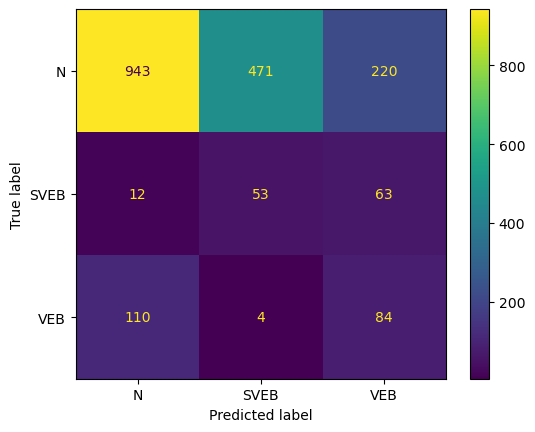

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2060
         1.0       0.31      0.25      0.28        55
         2.0       0.16      0.95      0.27        19

    accuracy                           0.93      2134
   macro avg       0.49      0.72      0.51      2134
weighted avg       0.96      0.93      0.94      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.988360   0.311111   0.159292  0.930178     0.486254   
recall        0.948058   0.254545   0.947368  0.930178     0.716657   
f1-score      0.967790   0.280000   0.272727  0.930178     0.506839   
support    2060.000000  55.000000  19.000000  0.930178  2134.000000   

           weighted avg  
precision      0.963524  
recall         0.930178  
f1-score       0.943875  
support     2134.000000  


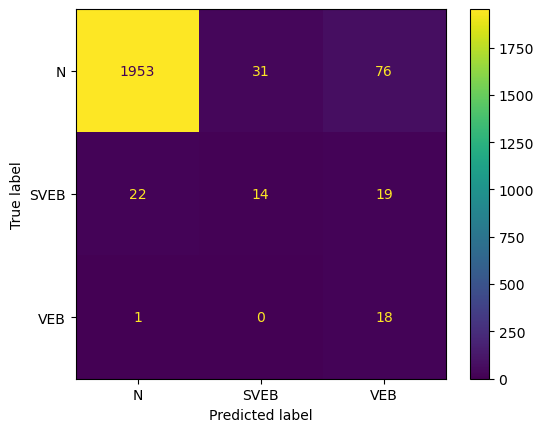

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.98      0.59      0.74      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.32      0.90      0.47       444

    accuracy                           0.64      2974
   macro avg       0.43      0.50      0.40      2974
weighted avg       0.88      0.64      0.70      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.978445  0.0    0.318254  0.638534     0.432233      0.879225
recall        0.592563  0.0    0.903153  0.638534     0.498572      0.638534
f1-score      0.738113  0.0    0.470657  0.638534     0.402923      0.697687
support    2528.000000  2.0  444.000000  0.638534  2974.000000   2974.000000


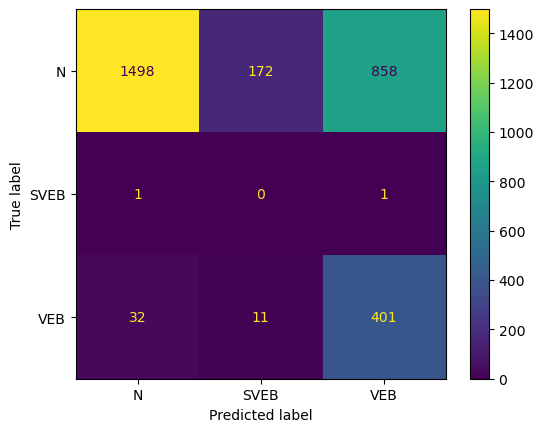

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2570
         1.0       0.27      1.00      0.43         3
         2.0       0.87      0.55      0.67        71

    accuracy                           0.98      2644
   macro avg       0.71      0.85      0.70      2644
weighted avg       0.98      0.98      0.98      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.988022  0.272727   0.866667   0.98298     0.709139   
recall        0.994942  1.000000   0.549296   0.98298     0.848079   
f1-score      0.991470  0.428571   0.672414   0.98298     0.697485   
support    2570.000000  3.000000  71.000000   0.98298  2644.000000   

           weighted avg  
precision      0.983951  
recall         0.982980  
f1-score       0.982263  
support     2644.000000  


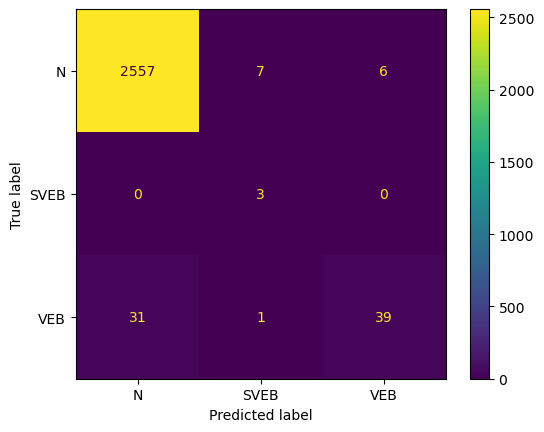

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.48      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.07      0.52      0.12       210

    accuracy                           0.11      1859
   macro avg       0.18      0.19      0.07      1859
weighted avg       0.40      0.11      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.475676    0.0    0.066026  0.106509     0.180567      0.402277
recall        0.057032    0.0    0.523810  0.106509     0.193614      0.106509
f1-score      0.101852    0.0    0.117271  0.106509     0.073041      0.097786
support    1543.000000  106.0  210.000000  0.106509  1859.000000   1859.000000


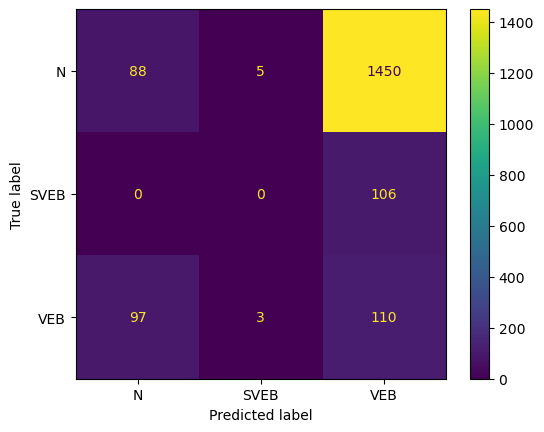

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.73      0.36      0.48       992

    accuracy                           0.68      2579
   macro avg       0.51      0.41      0.44      2579
weighted avg       0.78      0.68      0.70      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.812754  0.0    0.726337  0.680496     0.513030      0.778884
recall        0.884543  0.0    0.355847  0.680496     0.413463      0.680496
f1-score      0.847130  0.0    0.477673  0.680496     0.441601      0.704363
support    1585.000000  2.0  992.000000  0.680496  2579.000000   2579.000000


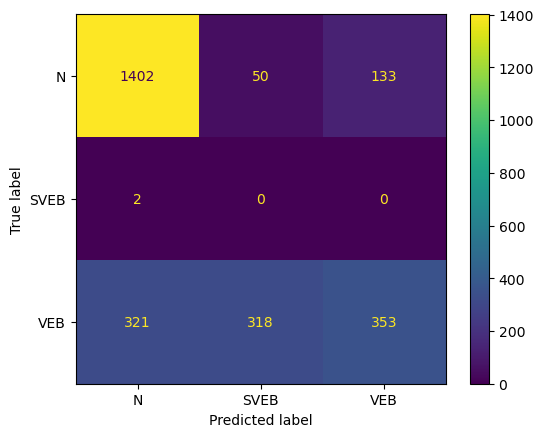

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.84      0.49      0.62      2620
         1.0       0.73      0.14      0.24       383
         2.0       0.00      0.00      0.00         1

    accuracy                           0.44      3004
   macro avg       0.52      0.21      0.28      3004
weighted avg       0.83      0.44      0.57      3004

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.842452    0.729730  0.0  0.443409     0.524061      0.827800
recall        0.487786    0.140992  0.0  0.443409     0.209593      0.443409
f1-score      0.617839    0.236324  0.0  0.443409     0.284721      0.568991
support    2620.000000  383.000000  1.0  0.443409  3004.000000   3004.000000


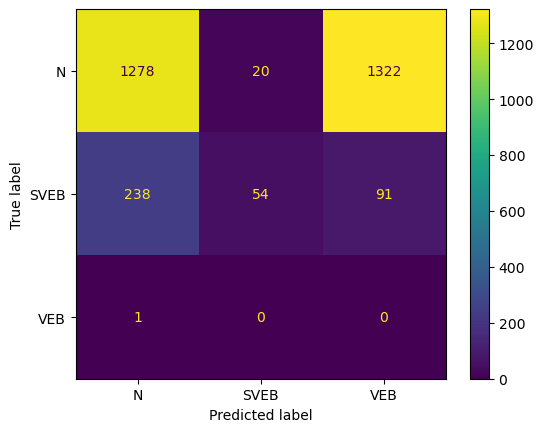

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      2422
         1.0       0.02      0.23      0.03        22
         2.0       0.63      0.51      0.56       195

    accuracy                           0.84      2639
   macro avg       0.54      0.54      0.51      2639
weighted avg       0.94      0.84      0.89      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.969378   0.016949    0.634615  0.843122     0.540314   
recall        0.875723   0.227273    0.507692  0.843122     0.536896   
f1-score      0.920174   0.031546    0.564103  0.843122     0.505274   
support    2422.000000  22.000000  195.000000  0.843122  2639.000000   

           weighted avg  
precision      0.936702  
recall         0.843122  
f1-score       0.886455  
support     2639.000000  


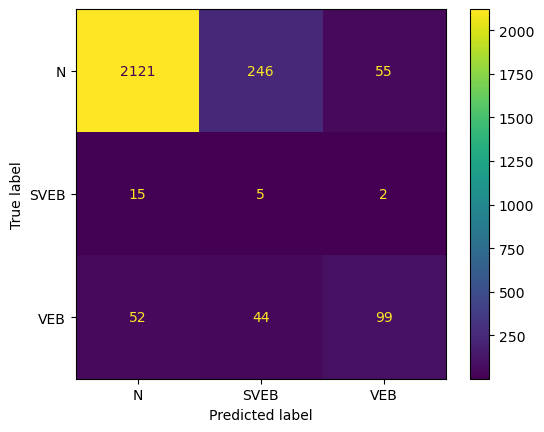

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      2747
   macro avg       0.33      0.31      0.32      2747
weighted avg       1.00      0.92      0.96      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.921005     0.333333      1.000000
recall        0.921005  NaN  NaN  0.921005     0.307002      0.921005
f1-score      0.958878  NaN  NaN  0.921005     0.319626      0.958878
support    2747.000000  0.0  0.0  0.921005  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

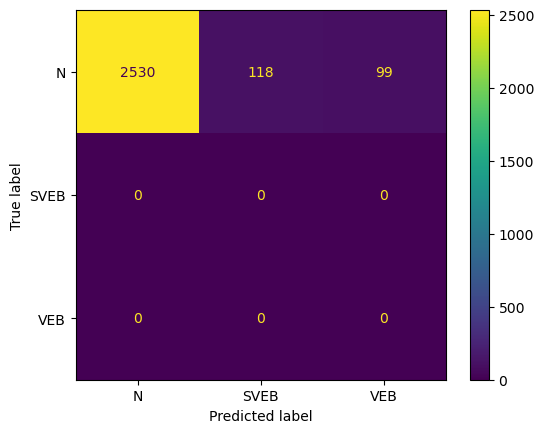

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2640
         1.0       0.36      0.14      0.21        28
         2.0       0.61      0.44      0.51       220

    accuracy                           0.93      2888
   macro avg       0.64      0.52      0.56      2888
weighted avg       0.92      0.93      0.92      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.951471   0.363636    0.611465  0.930748     0.642191   
recall        0.980303   0.142857    0.436364  0.930748     0.519841   
f1-score      0.965672   0.205128    0.509284  0.930748     0.560028   
support    2640.000000  28.000000  220.000000  0.930748  2888.000000   

           weighted avg  
precision      0.919871  
recall         0.930748  
f1-score       0.923532  
support     2888.000000  


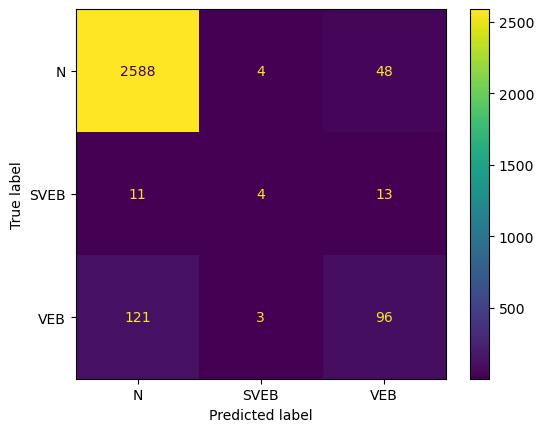

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.96      0.15      0.26      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.12      0.89      0.21       256

    accuracy                           0.23      2258
   macro avg       0.36      0.35      0.16      2258
weighted avg       0.87      0.23      0.25      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.961661  0.0    0.119060  0.234278     0.360240      0.866132
recall        0.150350  NaN    0.890625  0.234278     0.346992      0.234278
f1-score      0.260043  NaN    0.210041  0.234278     0.156695      0.254374
support    2002.000000  0.0  256.000000  0.234278  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

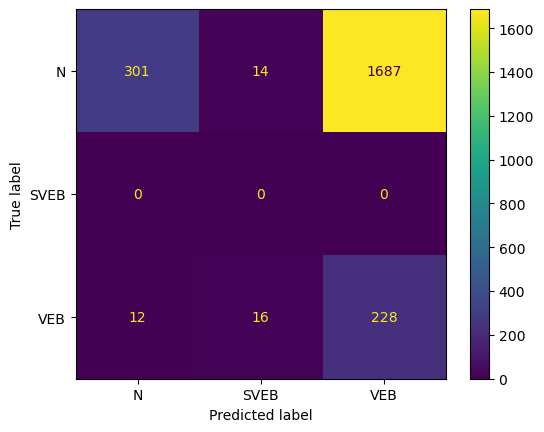

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88      3194
         1.0       0.00      1.00      0.01         3
         2.0       0.93      0.87      0.90       164

    accuracy                           0.80      3361
   macro avg       0.64      0.89      0.60      3361
weighted avg       0.99      0.80      0.88      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.992969  0.004630    0.928105  0.799464     0.641901   
recall        0.795867  1.000000    0.865854  0.799464     0.887240   
f1-score      0.883559  0.009217    0.895899  0.799464     0.596225   
support    3194.000000  3.000000  164.000000  0.799464  3361.000000   

           weighted avg  
precision      0.988922  
recall         0.799464  
f1-score       0.883381  
support     3361.000000  


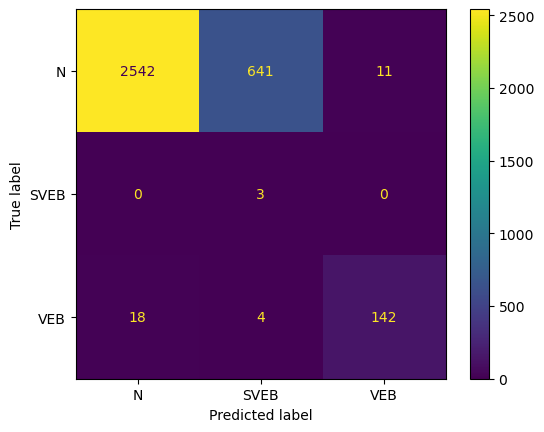

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      2081
         1.0       0.00      0.00      0.00         7
         2.0       0.16      0.59      0.26        64

    accuracy                           0.89      2152
   macro avg       0.38      0.50      0.40      2152
weighted avg       0.96      0.89      0.92      2152

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.983272  0.0   0.162393  0.891729     0.381889      0.955661
recall        0.903892  0.0   0.593750  0.891729     0.499214      0.891729
f1-score      0.941913  0.0   0.255034  0.891729     0.398982      0.918421
support    2081.000000  7.0  64.000000  0.891729  2152.000000   2152.000000


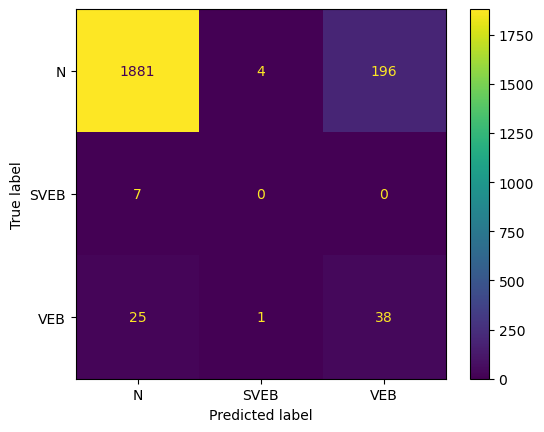

Fold 35:
  Test:  patient=34


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1953
         1.0       0.78      0.19      0.31        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2047
   macro avg       0.58      0.40      0.43      2047
weighted avg       0.96      0.96      0.95      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.966220   0.782609  0.0  0.958964     0.582943      0.957788
recall        0.995904   0.191489  NaN  0.958964     0.395798      0.958964
f1-score      0.980837   0.307692  NaN  0.958964     0.429510      0.949926
support    1953.000000  94.000000  0.0  0.958964  2047.000000   2047.000000


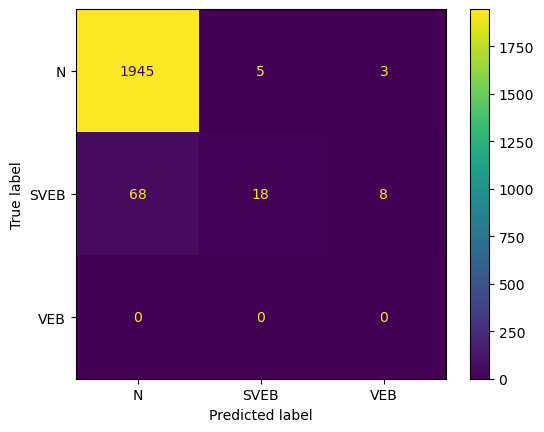

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.86      0.96      0.90       396

    accuracy                           0.94      2426
   macro avg       0.62      0.63      0.62      2426
weighted avg       0.97      0.94      0.96      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.991701  0.0    0.855856  0.944765     0.615852      0.969527
recall        0.941872  NaN    0.959596  0.944765     0.633823      0.944765
f1-score      0.966145  NaN    0.904762  0.944765     0.623635      0.956125
support    2030.000000  0.0  396.000000  0.944765  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

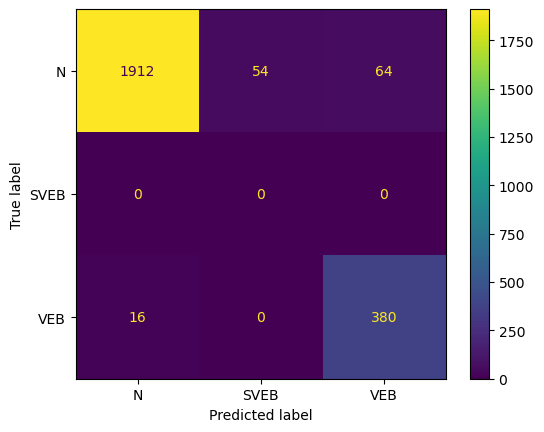

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71      2273
         1.0       0.14      0.34      0.20       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.54      2482
   macro avg       0.37      0.30      0.30      2482
weighted avg       0.90      0.54      0.66      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.968630    0.140873  0.0  0.538678     0.369834      0.898928
recall        0.556973    0.339713  NaN  0.538678     0.298895      0.538678
f1-score      0.707263    0.199158  NaN  0.538678     0.302140      0.664477
support    2273.000000  209.000000  0.0  0.538678  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

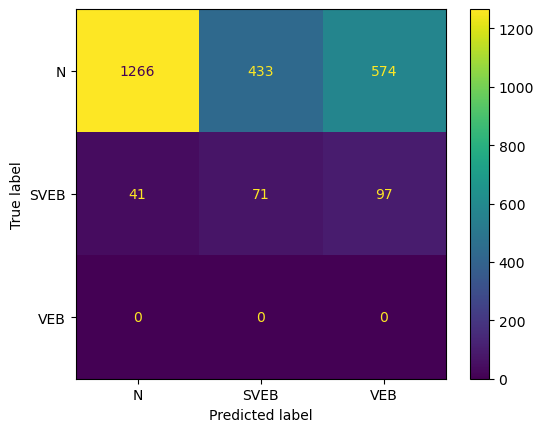

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2044
         1.0       0.36      0.40      0.38        73
         2.0       0.86      0.71      0.77       473

    accuracy                           0.91      2590
   macro avg       0.72      0.69      0.71      2590
weighted avg       0.91      0.91      0.91      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.946226   0.358025    0.858612  0.914672     0.720954   
recall        0.981409   0.397260    0.706131  0.914672     0.694933   
f1-score      0.963497   0.376623    0.774942  0.914672     0.705021   
support    2044.000000  73.000000  473.000000  0.914672  2590.000000   

           weighted avg  
precision      0.913647  
recall         0.914672  
f1-score       0.912521  
support     2590.000000  


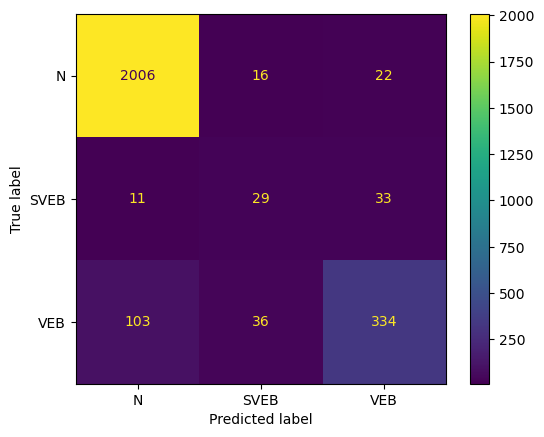

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1687
         1.0       0.02      0.33      0.04         3
         2.0       0.63      0.71      0.67       362

    accuracy                           0.85      2052
   macro avg       0.53      0.64      0.54      2052
weighted avg       0.88      0.85      0.86      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.935383  0.020408    0.628362  0.852339     0.528051   
recall        0.883817  0.333333    0.709945  0.852339     0.642365   
f1-score      0.908869  0.038462    0.666667  0.852339     0.537999   
support    1687.000000  3.000000  362.000000  0.852339  2052.000000   

           weighted avg  
precision      0.879882  
recall         0.852339  
f1-score       0.864869  
support     2052.000000  


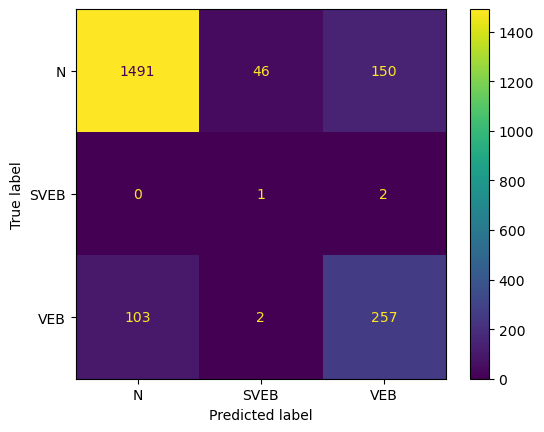

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.83      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.72      2255
   macro avg       0.33      0.57      0.28      2255
weighted avg       1.00      0.72      0.83      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.003802   0.71663     0.334601      0.999558
recall        0.716504  NaN  1.000000   0.71663     0.572168      0.716630
f1-score      0.834841  NaN  0.007576   0.71663     0.280806      0.834474
support    2254.000000  0.0  1.000000   0.71663  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

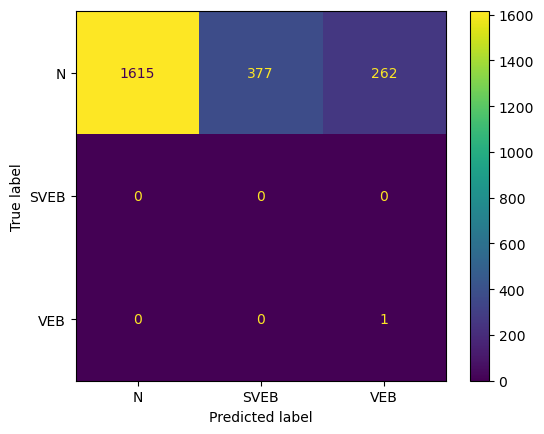

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1567
         1.0       0.04      1.00      0.07         1
         2.0       0.05      0.50      0.08         2

    accuracy                           0.97      1570
   macro avg       0.36      0.82      0.38      1570
weighted avg       1.00      0.97      0.98      1570

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     0.999342  0.035714  0.045455   0.96879     0.360170   
recall        0.969368  1.000000  0.500000   0.96879     0.823123   
f1-score      0.984127  0.068966  0.083333   0.96879     0.378809   
support    1567.000000  1.000000  2.000000   0.96879  1570.000000   

           weighted avg  
precision      0.997513  
recall         0.968790  
f1-score       0.982397  
support     1570.000000  


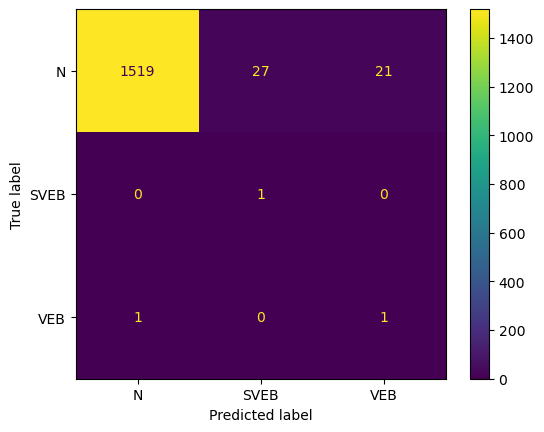

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.27      0.99      0.43       398
         1.0       1.00      0.19      0.33      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.37      1779
   macro avg       0.42      0.39      0.25      1779
weighted avg       0.83      0.37      0.35      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.270977     0.996296  0.0  0.372681     0.422424      0.834027
recall       0.989950     0.194786  NaN  0.372681     0.394912      0.372681
f1-score     0.425486     0.325863  NaN  0.372681     0.250450      0.348151
support    398.000000  1381.000000  0.0  0.372681  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

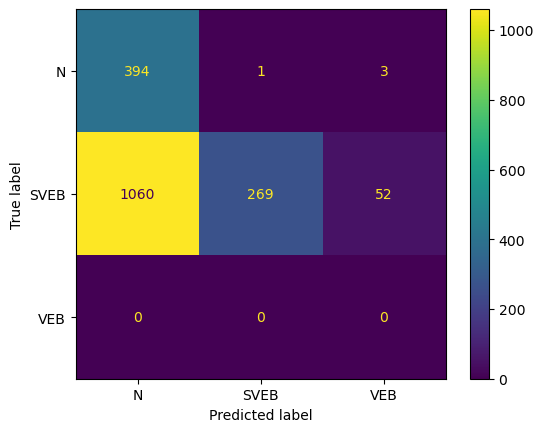

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      2229
         1.0       0.03      0.29      0.05         7
         2.0       0.92      0.89      0.91       831

    accuracy                           0.94      3067
   macro avg       0.64      0.71      0.64      3067
weighted avg       0.95      0.94      0.94      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.967302  0.029412    0.924718  0.935442     0.640477   
recall        0.955585  0.285714    0.886883  0.935442     0.709394   
f1-score      0.961408  0.053333    0.905405  0.935442     0.640049   
support    2229.000000  7.000000  831.000000  0.935442  3067.000000   

           weighted avg  
precision      0.953624  
recall         0.935442  
f1-score       0.944162  
support     3067.000000  


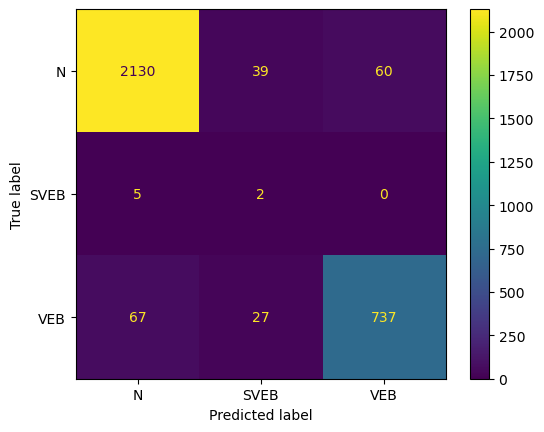

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84      2699
         1.0       0.00      0.04      0.01        50
         2.0       0.00      0.00      0.00         3

    accuracy                           0.72      2752
   macro avg       0.33      0.26      0.28      2752
weighted avg       0.96      0.72      0.83      2752

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.983160   0.002890  0.0   0.72202     0.328683      0.964278
recall        0.735458   0.040000  0.0   0.72202     0.258486      0.722020
f1-score      0.841458   0.005391  0.0   0.72202     0.282283      0.825351
support    2699.000000  50.000000  3.0   0.72202  2752.000000   2752.000000


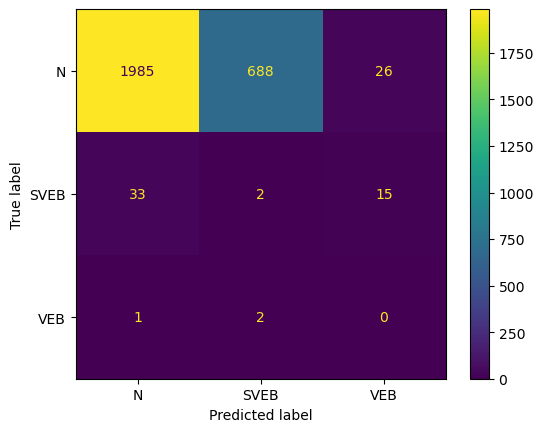

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_smote, acc_smote,confusion_matrix_final,list_fscore_smote = cross_valid(pipe_smote, skf, X, y,groups)
end_time=time.time()

In [18]:
df_smote

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.864459   0.134598    0.346011     0.407286      0.840015
precision     0.943232   0.128641    0.272283     0.448052      0.934515
recall        0.835170   0.336009    0.582041     0.505357      0.804117
support    2047.340909  63.159091  159.295455  2269.795455   2269.795455

In [19]:
print("Time"+str(end_time-start_time))

Time939.048216342926


In [20]:
confusion_matrix_final

array([[74961.,  4363., 10759.],
       [ 1602.,   583.,   594.],
       [ 1655.,   625.,  4729.]])

In [21]:
list_fscore_smote

{'patient0': {'0.0': 0.9843572885966901,
  '1.0': 0.7142857142857143,
  '2.0': 0.0,
  'macro avg': 0.5662143342941348,
  'weighted avg': 0.9800013382265937},
 'patient1': {'0.0': 0.9782907392140697,
  '1.0': 0.07017543859649122,
  'macro avg': 0.3494887259368536,
  'weighted avg': 0.9768276103731176},
 'patient2': {'0.0': 0.9932268988872762,
  '1.0': 0.0,
  'macro avg': 0.3310756329624254,
  'weighted avg': 0.9922732484802794},
 'patient3': {'0.0': 0.9615779741113623,
  '2.0': 0.34234234234234234,
  'macro avg': 0.43464010548456816,
  'weighted avg': 0.9516837181088175},
 'patient4': {'0.0': 0.8911422606620937,
  '2.0': 0.4437869822485207,
  'macro avg': 0.4449764143035381,
  'weighted avg': 0.7763225445835853},
 'patient5': {'0.0': 0.6899137607799024,
  '1.0': 0.07692307692307693,
  '2.0': 0.026602176541717048,
  'macro avg': 0.26447967141489875,
  'weighted avg': 0.6821136132415635},
 'patient6': {'0.0': 0.7029136316337148,
  '2.0': 0.055137844611528826,
  'macro avg': 0.252683825415

In [22]:
pipe_smote_PCA = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('scaler', StandardScaler()),  
        ("pca", PCA()),
        ('classification', DecisionTreeClassifier())
    ])
pipe_smote_PCA

Pipeline(steps=[('sampling', SMOTE(random_state=123)),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('classification', DecisionTreeClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2238
         1.0       0.12      0.33      0.18        33
         2.0       0.03      1.00      0.06         1

    accuracy                           0.95      2272
   macro avg       0.38      0.76      0.40      2272
weighted avg       0.98      0.95      0.96      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.996274   0.122222  0.028571  0.946743     0.382356   
recall        0.955764   0.333333  1.000000  0.946743     0.763032   
f1-score      0.975599   0.178862  0.055556  0.946743     0.403339   
support    2238.000000  33.000000  1.000000  0.946743  2272.000000   

           weighted avg  
precision      0.983153  
recall         0.946743  
f1-score       0.963621  
support     2272.000000  


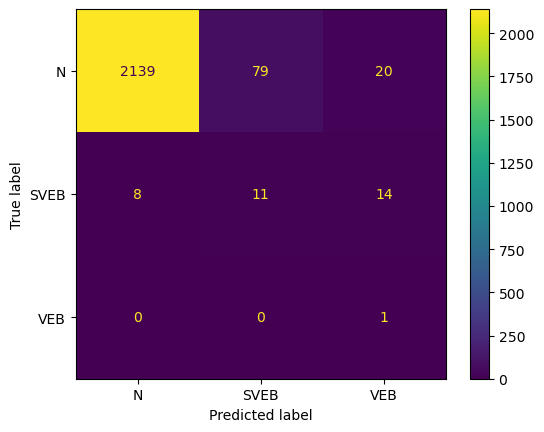

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      1859
         1.0       0.01      0.33      0.02         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.93      1862
   macro avg       0.34      0.42      0.33      1862
weighted avg       1.00      0.93      0.96      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998848  0.012500  0.0  0.931794     0.337116      0.997259
recall        0.932760  0.333333  NaN  0.931794     0.422031      0.931794
f1-score      0.964673  0.024096  NaN  0.931794     0.329590      0.963158
support    1859.000000  3.000000  0.0  0.931794  1862.000000   1862.000000


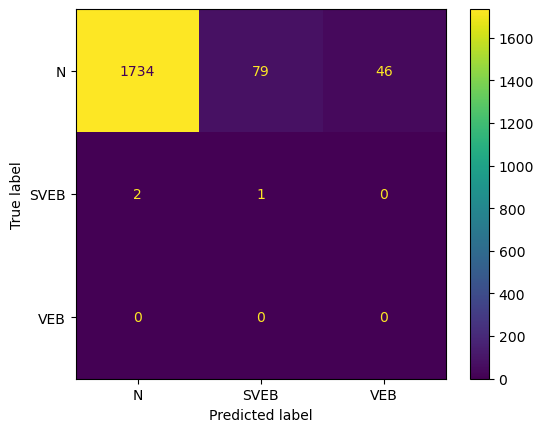

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      2083
   macro avg       0.33      0.32      0.33      2083
weighted avg       1.00      0.95      0.98      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998994  0.0  0.0  0.953433     0.332998      0.998035
recall        0.954349  0.0  NaN  0.953433     0.318116      0.953433
f1-score      0.976161  0.0  NaN  0.953433     0.325387      0.975224
support    2081.000000  2.0  0.0  0.953433  2083.000000   2083.000000


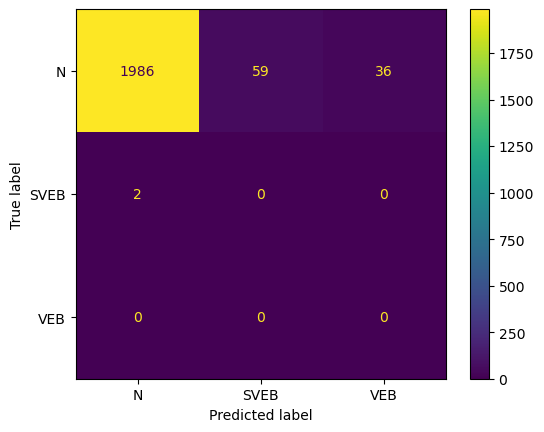

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.83      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.05      0.83      0.09        41

    accuracy                           0.72      2566
   macro avg       0.35      0.52      0.31      2566
weighted avg       0.98      0.72      0.82      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998896  0.0   0.048227  0.718239     0.349041      0.983706
recall        0.716436  NaN   0.829268  0.718239     0.515235      0.718239
f1-score      0.834410  NaN   0.091153  0.718239     0.308521      0.822534
support    2525.000000  0.0  41.000000  0.718239  2566.000000   2566.000000


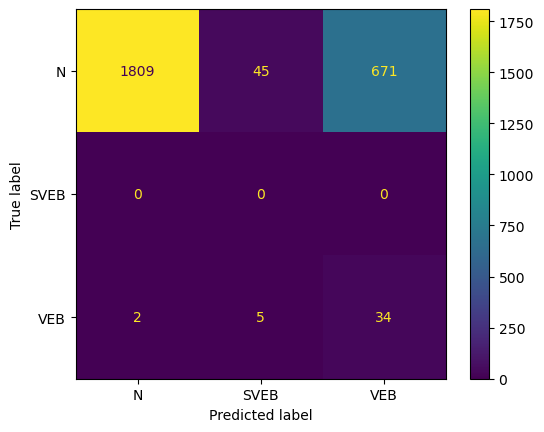

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.51      0.67       520

    accuracy                           0.85      2026
   macro avg       0.63      0.49      0.54      2026
weighted avg       0.93      0.85      0.87      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.913911  0.0    0.970696  0.853899     0.628202      0.928486
recall        0.972776  NaN    0.509615  0.853899     0.494130      0.853899
f1-score      0.942425  NaN    0.668348  0.853899     0.536924      0.872080
support    1506.000000  0.0  520.000000  0.853899  2026.000000   2026.000000


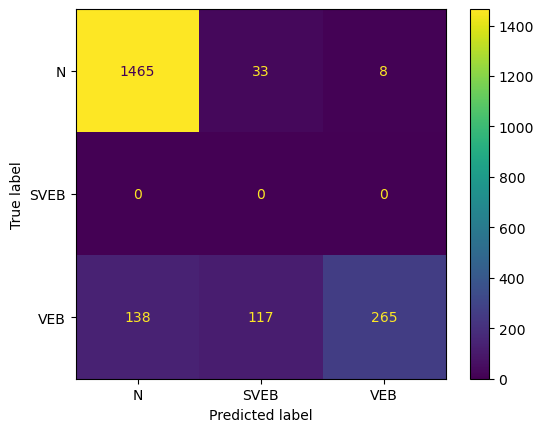

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.56      0.72      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.01      0.29      0.02        17

    accuracy                           0.56      1760
   macro avg       0.33      0.29      0.24      1760
weighted avg       0.98      0.56      0.71      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988855  0.0   0.009728  0.557386     0.332861      0.977150
recall        0.561242  0.0   0.294118  0.557386     0.285120      0.557386
f1-score      0.716067  0.0   0.018832  0.557386     0.244967      0.707705
support    1739.000000  4.0  17.000000  0.557386  1760.000000   1760.000000


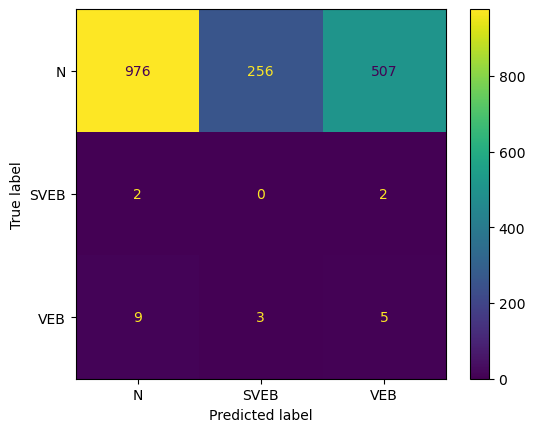

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.09      0.79      0.16        38

    accuracy                           0.84      2529
   macro avg       0.36      0.55      0.36      2529
weighted avg       0.98      0.84      0.90      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.997160  0.0   0.089021  0.844998     0.362060      0.983515
recall        0.845845  NaN   0.789474  0.844998     0.545106      0.844998
f1-score      0.915291  NaN   0.160000  0.844998     0.358430      0.903942
support    2491.000000  0.0  38.000000  0.844998  2529.000000   2529.000000


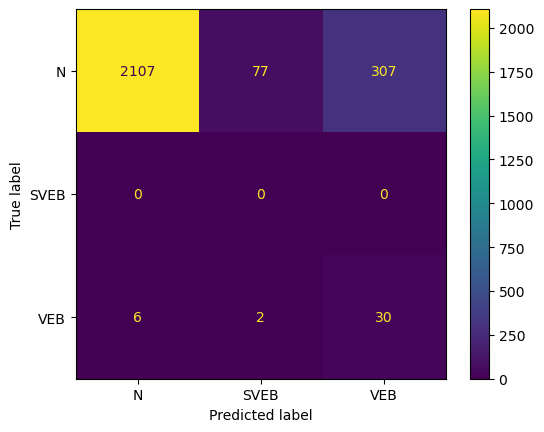

Fold 8:
  Test:  patient=7


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.88      2123
   macro avg       0.33      0.63      0.31      2123
weighted avg       1.00      0.88      0.93      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.004386   0.87659     0.334795      0.999531
recall        0.876532  NaN  1.000000   0.87659     0.625511      0.876590
f1-score      0.934204  NaN  0.008734   0.87659     0.314313      0.933768
support    2122.000000  0.0  1.000000   0.87659  2123.000000   2123.000000


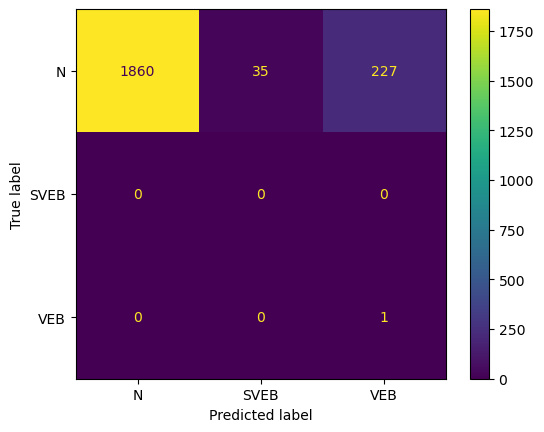

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      2536
         1.0       0.01      0.50      0.02         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.82      2538
   macro avg       0.34      0.44      0.31      2538
weighted avg       1.00      0.82      0.90      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.009709  0.0  0.818361     0.336570      0.999220
recall        0.818612  0.500000  NaN  0.818361     0.439537      0.818361
f1-score      0.900260  0.019048  NaN  0.818361     0.306436      0.899566
support    2536.000000  2.000000  0.0  0.818361  2538.000000   2538.000000


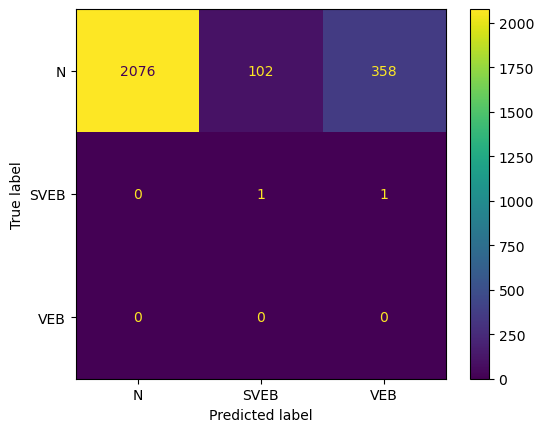

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1794
   macro avg       0.33      0.32      0.33      1794
weighted avg       0.99      0.95      0.97      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997664  0.0  0.0  0.952062     0.332555      0.994327
recall        0.955257  0.0  NaN  0.952062     0.318419      0.952062
f1-score      0.976000  0.0  NaN  0.952062     0.325333      0.972736
support    1788.000000  6.0  0.0  0.952062  1794.000000   1794.000000


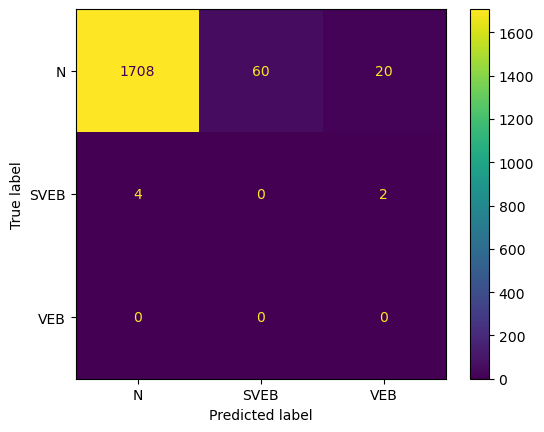

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82      1819
         1.0       0.02      0.25      0.04        12
         2.0       0.05      0.51      0.09        43

    accuracy                           0.69      1874
   macro avg       0.35      0.49      0.32      1874
weighted avg       0.96      0.69      0.80      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.984520   0.019608   0.051282  0.692102     0.351803   
recall        0.699285   0.250000   0.511628  0.692102     0.486971   
f1-score      0.817743   0.036364   0.093220  0.692102     0.315776   
support    1819.000000  12.000000  43.000000  0.692102  1874.000000   

           weighted avg  
precision      0.956928  
recall         0.692102  
f1-score       0.796115  
support     1874.000000  


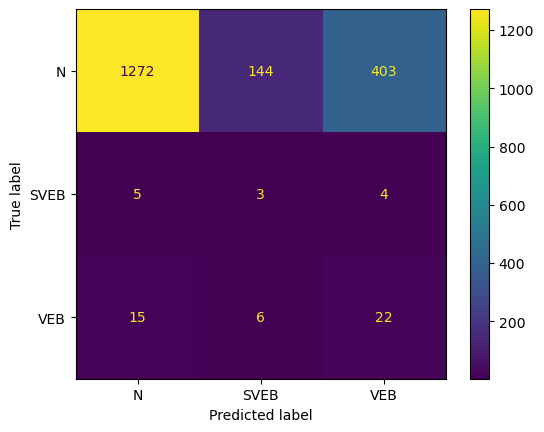

Fold 12:
  Test:  patient=11


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1952
   macro avg       0.33      0.32      0.33      1952
weighted avg       1.00      0.95      0.98      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.954918     0.333333      1.000000
recall        0.954918  NaN  NaN  0.954918     0.318306      0.954918
f1-score      0.976939  NaN  NaN  0.954918     0.325646      0.976939
support    1952.000000  0.0  0.0  0.954918  1952.000000   1952.000000


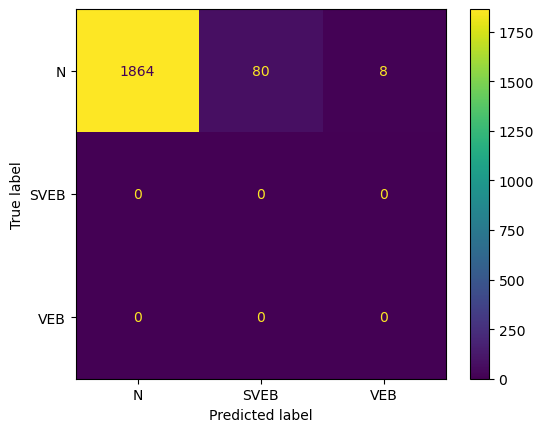

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      2301
         1.0       0.01      1.00      0.01         1
         2.0       0.38      0.96      0.55       109

    accuracy                           0.86      2411
   macro avg       0.46      0.94      0.49      2411
weighted avg       0.97      0.86      0.90      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.998979  0.005556    0.384615  0.855247     0.463050   
recall        0.850065  1.000000    0.963303  0.855247     0.937789   
f1-score      0.918525  0.011050    0.549738  0.855247     0.493104   
support    2301.000000  1.000000  109.000000  0.855247  2411.000000   

           weighted avg  
precision      0.970791  
recall         0.855247  
f1-score       0.901476  
support     2411.000000  


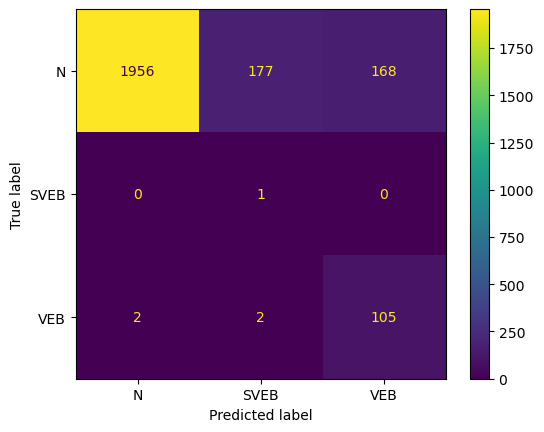

Fold 14:
  Test:  patient=13


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      1534
   macro avg       0.33      0.30      0.31      1534
weighted avg       1.00      0.89      0.94      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999270  0.0  0.0  0.891786     0.333090      0.998618
recall        0.892368  0.0  NaN  0.891786     0.297456      0.891786
f1-score      0.942798  0.0  NaN  0.891786     0.314266      0.942183
support    1533.000000  1.0  0.0  0.891786  1534.000000   1534.000000


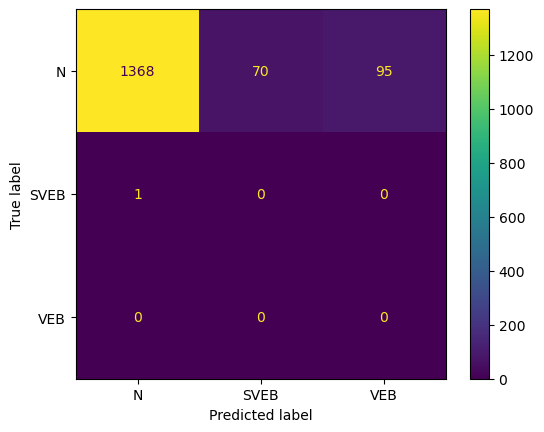

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2165
         1.0       0.13      0.34      0.19        96
         2.0       0.09      0.81      0.17        16

    accuracy                           0.84      2277
   macro avg       0.40      0.67      0.43      2277
weighted avg       0.94      0.84      0.88      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.982011   0.132000   0.094891   0.83531     0.402967   
recall        0.857275   0.343750   0.812500   0.83531     0.671175   
f1-score      0.915413   0.190751   0.169935   0.83531     0.425366   
support    2165.000000  96.000000  16.000000   0.83531  2277.000000   

           weighted avg  
precision      0.939940  
recall         0.835310  
f1-score       0.879622  
support     2277.000000  


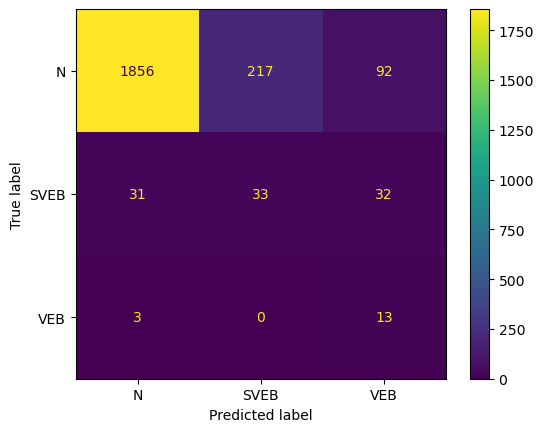

Fold 16:
  Test:  patient=15


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.21      0.34       444

    accuracy                           0.82      1986
   macro avg       0.61      0.40      0.42      1986
weighted avg       0.87      0.82      0.78      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.837616  0.0    0.978723  0.817724     0.605447      0.869163
recall        0.993515  NaN    0.207207  0.817724     0.400241      0.817724
f1-score      0.908929  NaN    0.342007  0.817724     0.416979      0.782185
support    1542.000000  0.0  444.000000  0.817724  1986.000000   1986.000000


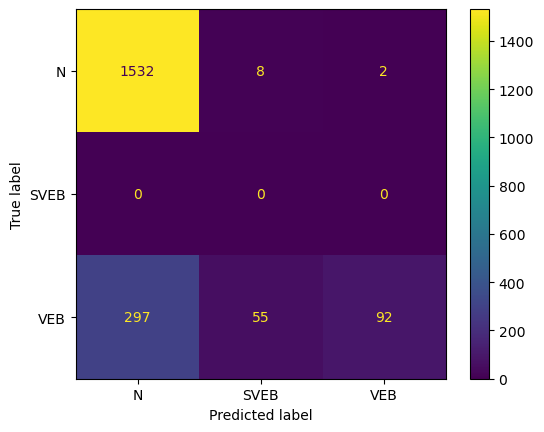

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      1860
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.91      1862
   macro avg       0.33      0.30      0.32      1862
weighted avg       1.00      0.91      0.95      1862

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999412  0.0  0.0   0.91246     0.333137      0.998338
recall        0.913441  0.0  0.0   0.91246     0.304480      0.912460
f1-score      0.954494  0.0  0.0   0.91246     0.318165      0.953469
support    1860.000000  1.0  1.0   0.91246  1862.000000   1862.000000


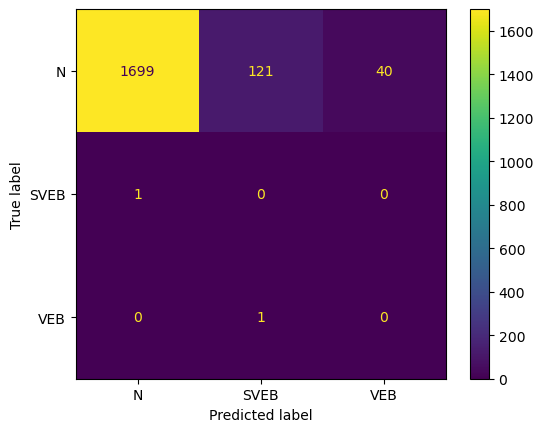

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2475
   macro avg       0.33      0.33      0.33      2475
weighted avg       1.00      0.99      1.00      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.992727     0.333333      1.000000
recall        0.992727  NaN  NaN  0.992727     0.330909      0.992727
f1-score      0.996350  NaN  NaN  0.992727     0.332117      0.996350
support    2475.000000  0.0  0.0  0.992727  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

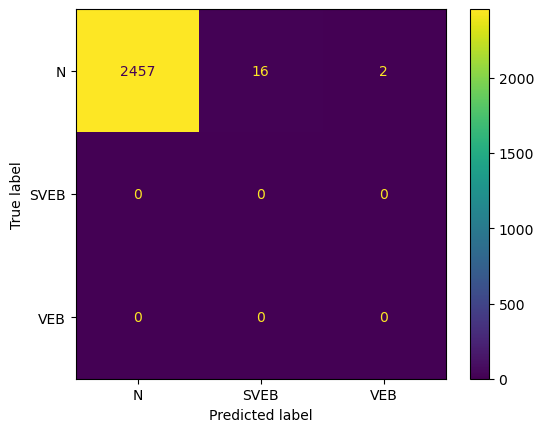

Fold 19:
  Test:  patient=18


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.95      1517
   macro avg       0.33      0.32      0.33      1517
weighted avg       1.00      0.95      0.97      1517

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999308  0.0  0.0  0.951879     0.333103      0.997332
recall        0.953765  NaN  0.0  0.951879     0.317922      0.951879
f1-score      0.976005  NaN  0.0  0.951879     0.325335      0.974075
support    1514.000000  0.0  3.0  0.951879  1517.000000   1517.000000


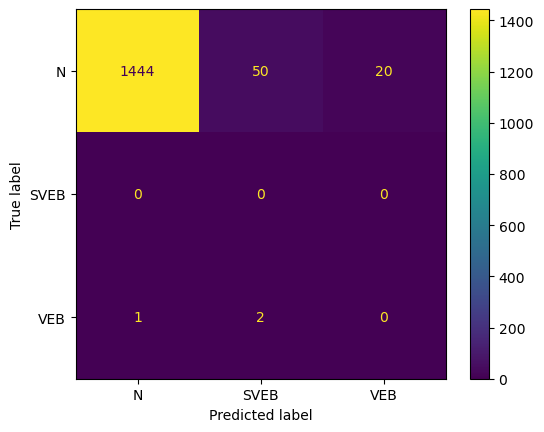

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.96      0.62      0.75      1535
         1.0       0.17      0.03      0.05        31
         2.0       0.05      0.62      0.09        47

    accuracy                           0.61      1613
   macro avg       0.39      0.42      0.30      1613
weighted avg       0.92      0.61      0.72      1613

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.959759   0.166667   0.047308  0.610043     0.391245   
recall        0.621498   0.032258   0.617021  0.610043     0.423593   
f1-score      0.754448   0.054054   0.087879  0.610043     0.298794   
support    1535.000000  31.000000  47.000000  0.610043  1613.000000   

           weighted avg  
precision      0.917929  
recall         0.610043  
f1-score       0.721565  
support     1613.000000  


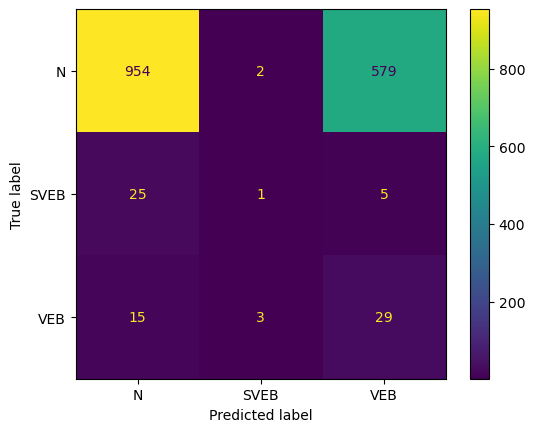

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1742
         1.0       0.05      0.13      0.08        30
         2.0       0.91      0.90      0.90       826

    accuracy                           0.91      2598
   macro avg       0.64      0.65      0.64      2598
weighted avg       0.92      0.91      0.91      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.944803   0.053333    0.907317  0.907236     0.635151   
recall        0.923651   0.133333    0.900726  0.907236     0.652570   
f1-score      0.934107   0.076190    0.904010  0.907236     0.638103   
support    1742.000000  30.000000  826.000000  0.907236  2598.000000   

           weighted avg  
precision      0.922591  
recall         0.907236  
f1-score       0.914632  
support     2598.000000  


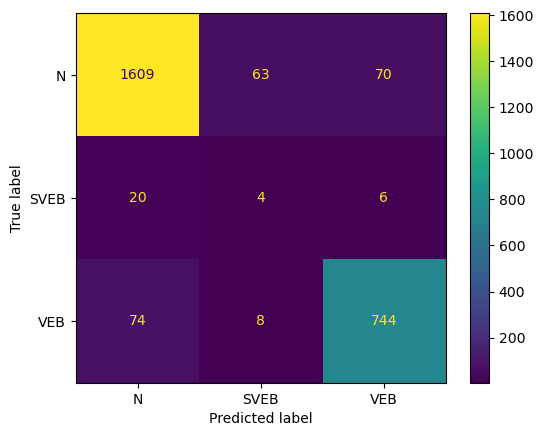

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1634
         1.0       0.29      0.31      0.30       128
         2.0       0.53      0.59      0.56       198

    accuracy                           0.84      1960
   macro avg       0.58      0.60      0.59      1960
weighted avg       0.85      0.84      0.84      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.928795    0.291971    0.527027  0.838776     0.582597   
recall        0.910037    0.312500    0.590909  0.838776     0.604482   
f1-score      0.919320    0.301887    0.557143  0.838776     0.592783   
support    1634.000000  128.000000  198.000000  0.838776  1960.000000   

           weighted avg  
precision      0.846619  
recall         0.838776  
f1-score       0.842410  
support     1960.000000  


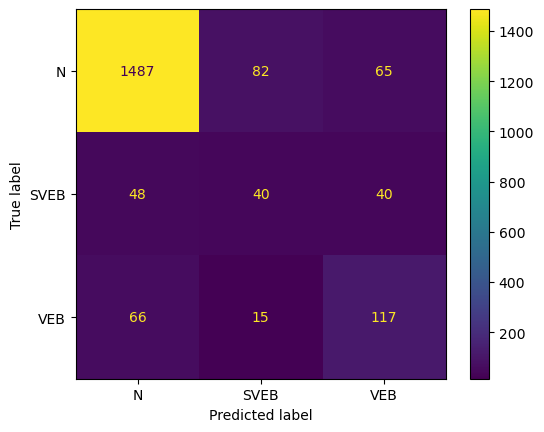

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      2060
         1.0       0.10      0.24      0.14        55
         2.0       0.21      0.84      0.33        19

    accuracy                           0.90      2134
   macro avg       0.43      0.67      0.47      2134
weighted avg       0.96      0.90      0.92      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.984912   0.097015   0.205128  0.900656     0.429018   
recall        0.918932   0.236364   0.842105  0.900656     0.665800   
f1-score      0.950779   0.137566   0.329897  0.900656     0.472747   
support    2060.000000  55.000000  19.000000  0.900656  2134.000000   

           weighted avg  
precision      0.955085  
recall         0.900656  
f1-score       0.924291  
support     2134.000000  


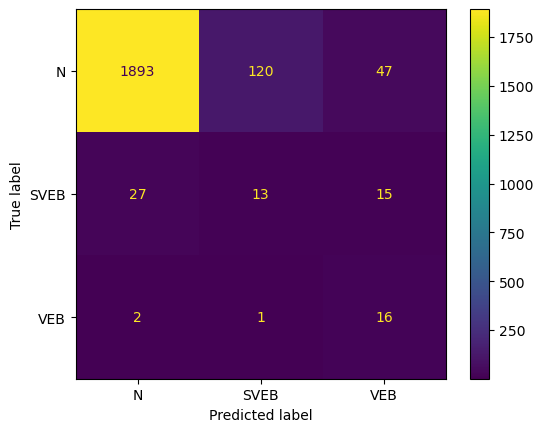

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.93      0.52      0.66      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.25      0.76      0.37       444

    accuracy                           0.55      2974
   macro avg       0.39      0.43      0.35      2974
weighted avg       0.83      0.55      0.62      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.934767  0.0    0.246905  0.552455     0.393891      0.831445
recall        0.515823  0.0    0.763514  0.552455     0.426445      0.552455
f1-score      0.664797  0.0    0.373143  0.552455     0.345980      0.620808
support    2528.000000  2.0  444.000000  0.552455  2974.000000   2974.000000


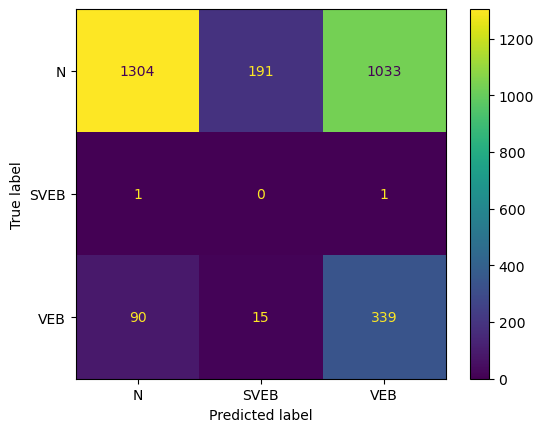

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2570
         1.0       0.01      0.33      0.02         3
         2.0       0.96      0.69      0.80        71

    accuracy                           0.95      2644
   macro avg       0.65      0.66      0.60      2644
weighted avg       0.99      0.95      0.97      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.992357  0.009346   0.960784  0.951967     0.654162   
recall        0.959922  0.333333   0.690141  0.951967     0.661132   
f1-score      0.975870  0.018182   0.803279  0.951967     0.599110   
support    2570.000000  3.000000  71.000000  0.951967  2644.000000   

           weighted avg  
precision      0.990394  
recall         0.951967  
f1-score       0.970149  
support     2644.000000  


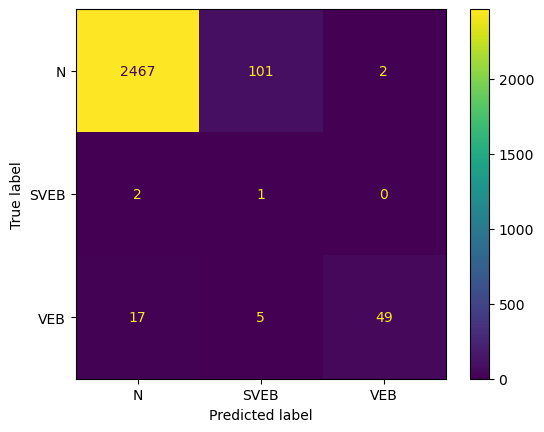

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.46      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.48      0.11       210

    accuracy                           0.10      1859
   macro avg       0.17      0.18      0.07      1859
weighted avg       0.39      0.10      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.463158    0.0    0.060880  0.101668     0.174679      0.391306
recall        0.057032    0.0    0.480952  0.101668     0.179328      0.101668
f1-score      0.101558    0.0    0.108079  0.101668     0.069879      0.096504
support    1543.000000  106.0  210.000000  0.101668  1859.000000   1859.000000


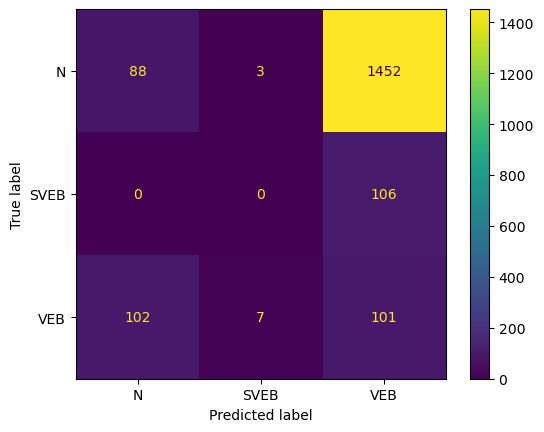

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.91      0.28      0.43       992

    accuracy                           0.70      2579
   macro avg       0.56      0.41      0.43      2579
weighted avg       0.82      0.70      0.69      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.765861  0.0    0.905229  0.697169     0.557030      0.818874
recall        0.959621  0.0    0.279234  0.697169     0.412952      0.697169
f1-score      0.851862  0.0    0.426810  0.697169     0.426224      0.687707
support    1585.000000  2.0  992.000000  0.697169  2579.000000   2579.000000


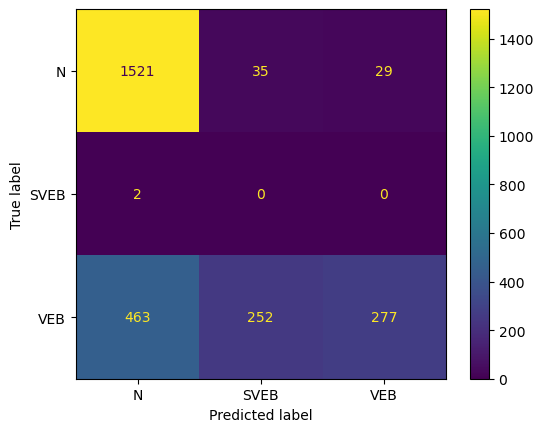

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2620
         1.0       0.77      0.32      0.45       383
         2.0       0.03      1.00      0.06         1

    accuracy                           0.90      3004
   macro avg       0.57      0.77      0.48      3004
weighted avg       0.90      0.90      0.88      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.914296    0.770701  0.028571  0.896471     0.571189   
recall        0.981298    0.315927  1.000000  0.896471     0.765742   
f1-score      0.946613    0.448148  0.055556  0.896471     0.483439   
support    2620.000000  383.000000  1.000000  0.896471  3004.000000   

           weighted avg  
precision      0.895693  
recall         0.896471  
f1-score       0.882763  
support     3004.000000  


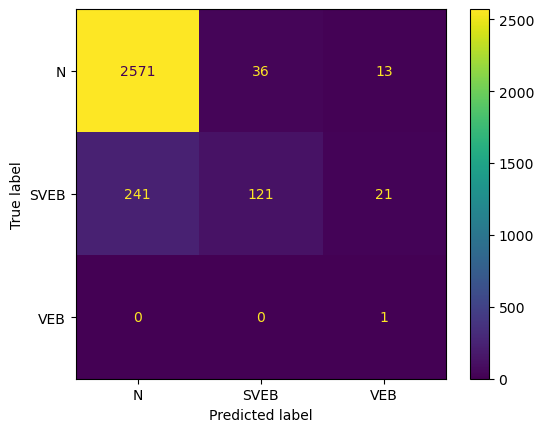

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94      2422
         1.0       0.05      0.36      0.08        22
         2.0       0.41      0.56      0.48       195

    accuracy                           0.87      2639
   macro avg       0.48      0.61      0.50      2639
weighted avg       0.93      0.87      0.89      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.981431   0.047619    0.414449  0.865479     0.481166   
recall        0.894715   0.363636    0.558974  0.865479     0.605775   
f1-score      0.936069   0.084211    0.475983  0.865479     0.498754   
support    2422.000000  22.000000  195.000000  0.865479  2639.000000   

           weighted avg  
precision      0.931751  
recall         0.865479  
f1-score       0.894971  
support     2639.000000  


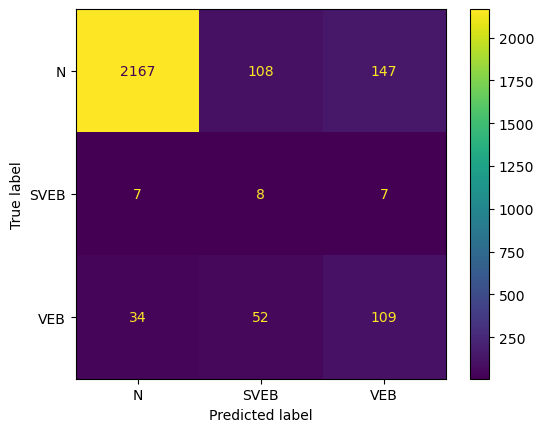

Fold 30:
  Test:  patient=29
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      2747
   macro avg       0.33      0.30      0.31      2747
weighted avg       1.00      0.89      0.94      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.889334     0.333333      1.000000
recall        0.889334  NaN  NaN  0.889334     0.296445      0.889334
f1-score      0.941426  NaN  NaN  0.889334     0.313809      0.941426
support    2747.000000  0.0  0.0  0.889334  2747.000000   2747.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

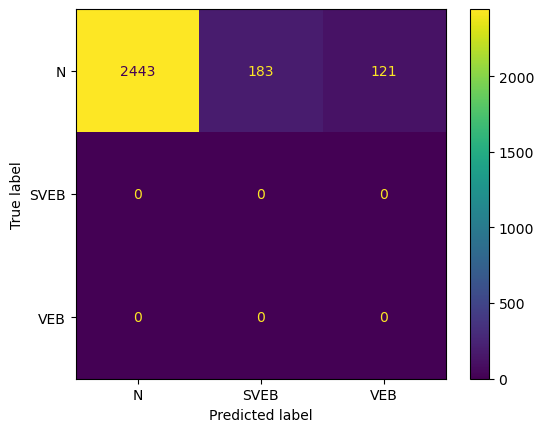

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.87      0.47      0.61      2640
         1.0       0.01      0.07      0.02        28
         2.0       0.03      0.17      0.05       220

    accuracy                           0.45      2888
   macro avg       0.30      0.24      0.23      2888
weighted avg       0.80      0.45      0.57      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.870564   0.009434    0.030670  0.447022     0.303556   
recall        0.473864   0.071429    0.172727  0.447022     0.239340   
f1-score      0.613687   0.016667    0.052090  0.447022     0.227481   
support    2640.000000  28.000000  220.000000  0.447022  2888.000000   

           weighted avg  
precision      0.798234  
recall         0.447022  
f1-score       0.565117  
support     2888.000000  


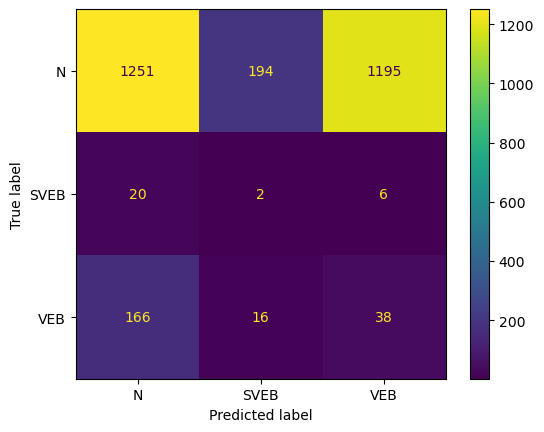

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.29      0.75      0.41       256

    accuracy                           0.74      2258
   macro avg       0.42      0.49      0.42      2258
weighted avg       0.89      0.74      0.79      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.966035  0.0    0.287218  0.739593     0.417751      0.889075
recall        0.738761  NaN    0.746094  0.739593     0.494952      0.739593
f1-score      0.837249  NaN    0.414767  0.739593     0.417338      0.789350
support    2002.000000  0.0  256.000000  0.739593  2258.000000   2258.000000


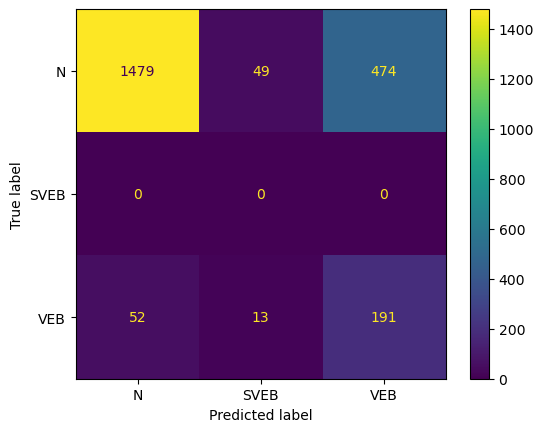

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      3194
         1.0       0.00      0.67      0.00         3
         2.0       0.55      0.63      0.59       164

    accuracy                           0.69      3361
   macro avg       0.51      0.67      0.47      3361
weighted avg       0.96      0.69      0.80      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.977954  0.002215    0.547368  0.691461     0.509179   
recall        0.694427  0.666667    0.634146  0.691461     0.665080   
f1-score      0.812157  0.004415    0.587571  0.691461     0.468047   
support    3194.000000  3.000000  164.000000  0.691461  3361.000000   

           weighted avg  
precision      0.956073  
recall         0.691461  
f1-score       0.800477  
support     3361.000000  


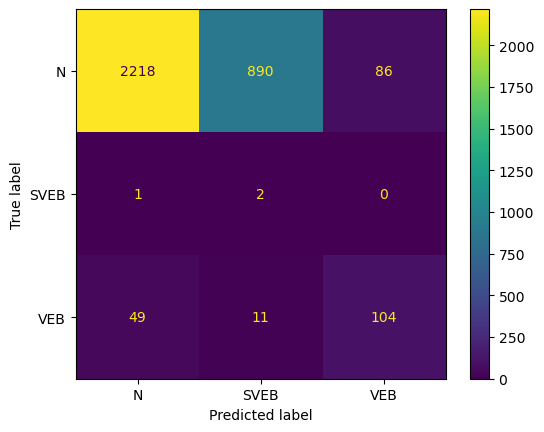

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      2081
         1.0       0.04      0.14      0.06         7
         2.0       0.29      0.75      0.41        64

    accuracy                           0.92      2152
   macro avg       0.44      0.61      0.48      2152
weighted avg       0.97      0.92      0.94      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.989785  0.038462   0.285714  0.923327     0.437987   
recall        0.931283  0.142857   0.750000  0.923327     0.608047   
f1-score      0.959643  0.060606   0.413793  0.923327     0.478014   
support    2081.000000  7.000000  64.000000  0.923327  2152.000000   

           weighted avg  
precision      0.965752  
recall         0.923327  
f1-score       0.940486  
support     2152.000000  


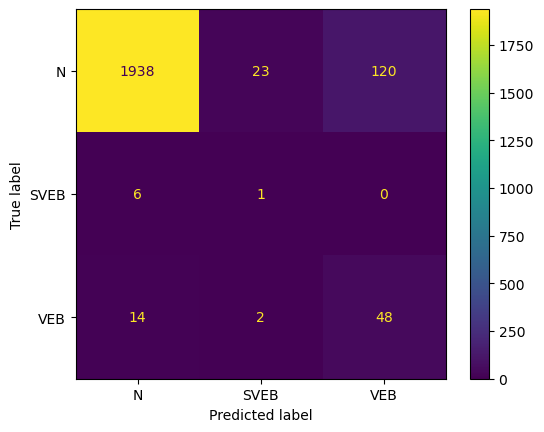

Fold 35:
  Test:  patient=34


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1953
         1.0       0.92      0.49      0.64        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2047
   macro avg       0.63      0.49      0.54      2047
weighted avg       0.97      0.97      0.97      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.976884   0.920000  0.0  0.972154     0.632295      0.974272
recall        0.995392   0.489362  NaN  0.972154     0.494918      0.972154
f1-score      0.986051   0.638889  NaN  0.972154     0.541647      0.970109
support    1953.000000  94.000000  0.0  0.972154  2047.000000   2047.000000


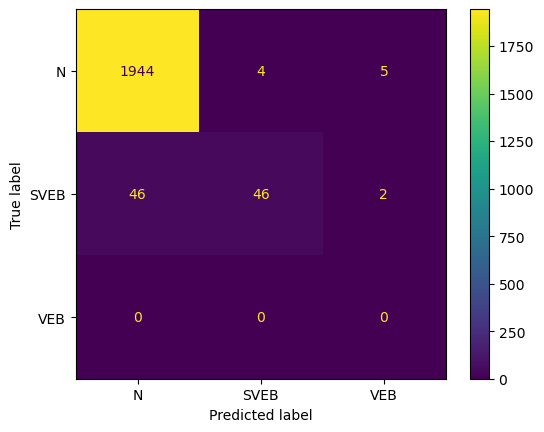

Fold 36:
  Test:  patient=35


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.59      0.44      0.50       396

    accuracy                           0.82      2426
   macro avg       0.52      0.44      0.48      2426
weighted avg       0.90      0.82      0.86      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.954879  0.0    0.590444  0.821517     0.515108      0.895392
recall        0.896552  NaN    0.436869  0.821517     0.444473      0.821517
f1-score      0.924797  NaN    0.502177  0.821517     0.475658      0.855812
support    2030.000000  0.0  396.000000  0.821517  2426.000000   2426.000000


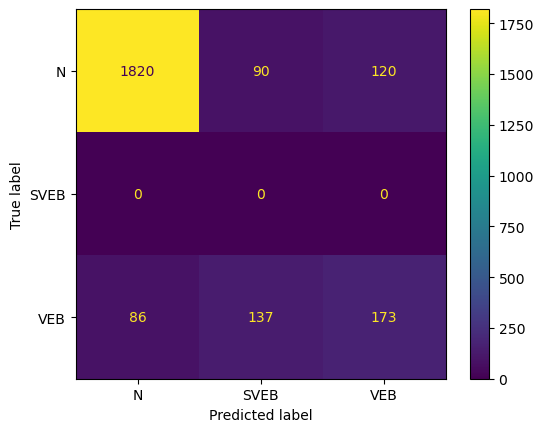

Fold 37:
  Test:  patient=36


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      2273
         1.0       0.19      0.47      0.27       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.69      2482
   macro avg       0.38      0.39      0.36      2482
weighted avg       0.88      0.69      0.77      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.947616    0.192607  0.0  0.688558     0.380074      0.884040
recall        0.708315    0.473684  NaN  0.688558     0.394000      0.688558
f1-score      0.810675    0.273859  NaN  0.688558     0.361511      0.765471
support    2273.000000  209.000000  0.0  0.688558  2482.000000   2482.000000


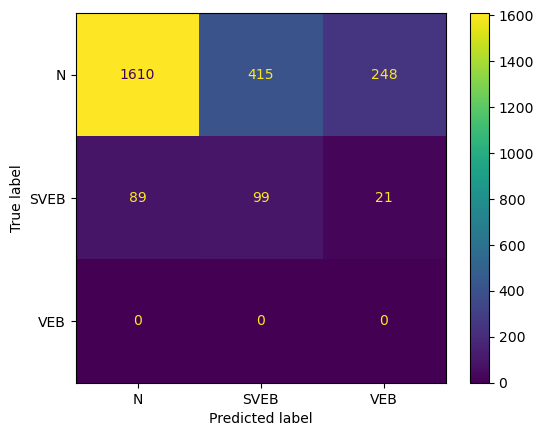

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      2044
         1.0       0.24      0.40      0.30        73
         2.0       0.75      0.74      0.75       473

    accuracy                           0.87      2590
   macro avg       0.64      0.69      0.66      2590
weighted avg       0.88      0.87      0.87      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.934565   0.241667    0.752137  0.869498     0.642790   
recall        0.915362   0.397260    0.744186  0.869498     0.685603   
f1-score      0.924864   0.300518    0.748140  0.869498     0.657841   
support    2044.000000  73.000000  473.000000  0.869498  2590.000000   

           weighted avg  
precision      0.881720  
recall         0.869498  
f1-score       0.874992  
support     2590.000000  


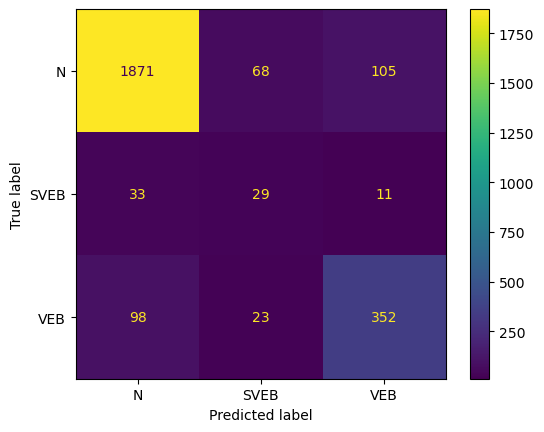

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      1687
         1.0       0.01      0.33      0.01         3
         2.0       0.37      0.30      0.33       362

    accuracy                           0.74      2052
   macro avg       0.42      0.49      0.40      2052
weighted avg       0.80      0.74      0.77      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.888609  0.005848    0.366438  0.740741     0.420298   
recall        0.836989  0.333333    0.295580  0.740741     0.488634   
f1-score      0.862027  0.011494    0.327217  0.740741     0.400246   
support    1687.000000  3.000000  362.000000  0.740741  2052.000000   

           weighted avg  
precision      0.795201  
recall         0.740741  
f1-score       0.766436  
support     2052.000000  


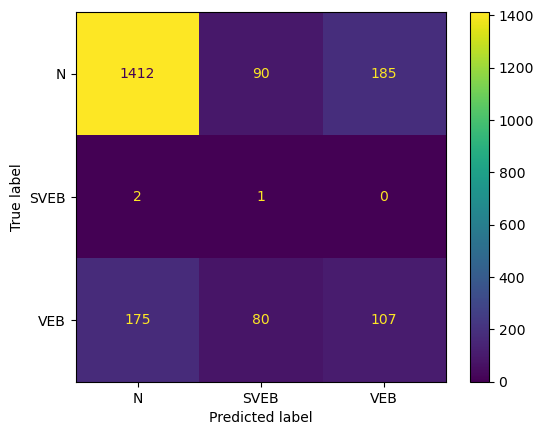

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1

    accuracy                           0.82      2255
   macro avg       0.33      0.27      0.30      2255
weighted avg       1.00      0.82      0.90      2255

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.817738     0.333333      0.999557
recall        0.818101  NaN  0.0  0.817738     0.272700      0.817738
f1-score      0.899951  NaN  0.0  0.817738     0.299984      0.899552
support    2254.000000  0.0  1.0  0.817738  2255.000000   2255.000000


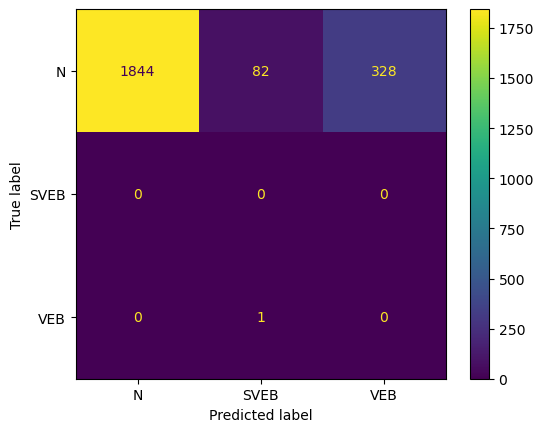

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.02      0.50      0.03         2

    accuracy                           0.82      1570
   macro avg       0.34      0.44      0.31      1570
weighted avg       1.00      0.82      0.90      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998452  0.0  0.017544  0.822293     0.338665      0.996566
recall        0.823229  0.0  0.500000  0.822293     0.441076      0.822293
f1-score      0.902413  0.0  0.033898  0.822293     0.312104      0.900732
support    1567.000000  1.0  2.000000  0.822293  1570.000000   1570.000000


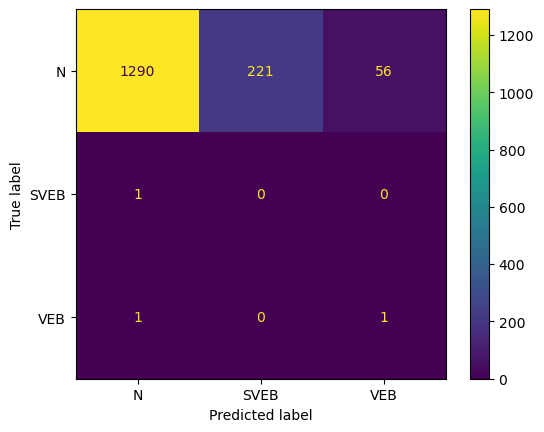

Fold 42:
  Test:  patient=41


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.26      0.93      0.40       398
         1.0       0.98      0.19      0.33      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.36      1779
   macro avg       0.41      0.38      0.24      1779
weighted avg       0.82      0.36      0.34      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.258177     0.981752  0.0  0.359753     0.413310      0.819873
recall       0.932161     0.194786  NaN  0.359753     0.375649      0.359753
f1-score     0.404360     0.325076  NaN  0.359753     0.243145      0.342813
support    398.000000  1381.000000  0.0  0.359753  1779.000000   1779.000000


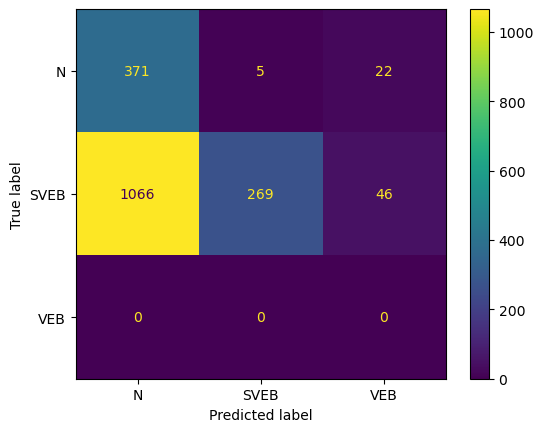

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.79      2229
         1.0       0.01      0.29      0.03         7
         2.0       0.55      0.85      0.67       831

    accuracy                           0.73      3067
   macro avg       0.50      0.61      0.50      3067
weighted avg       0.83      0.73      0.76      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.935484  0.014184    0.551832  0.732638     0.500500   
recall        0.689547  0.285714    0.851986  0.732638     0.609082   
f1-score      0.793905  0.027027    0.669820  0.732638     0.496917   
support    2229.000000  7.000000  831.000000  0.732638  3067.000000   

           weighted avg  
precision      0.829431  
recall         0.732638  
f1-score       0.758534  
support     3067.000000  


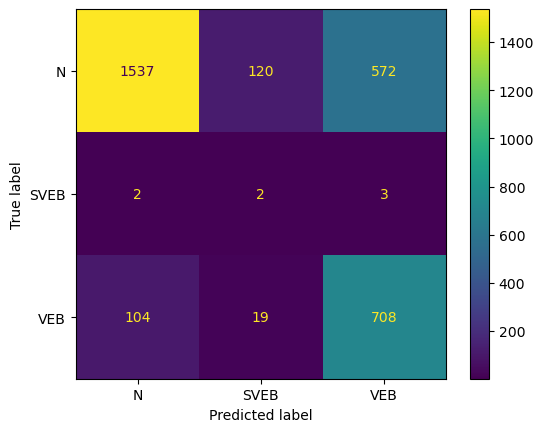

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2699
         1.0       0.08      0.08      0.08        50
         2.0       0.01      0.33      0.02         3

    accuracy                           0.93      2752
   macro avg       0.36      0.45      0.36      2752
weighted avg       0.97      0.93      0.95      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.983883   0.078431  0.010526  0.933503     0.357614   
recall        0.949981   0.080000  0.333333  0.933503     0.454438   
f1-score      0.966635   0.079208  0.020408  0.933503     0.355417   
support    2699.000000  50.000000  3.000000  0.933503  2752.000000   

           weighted avg  
precision      0.966371  
recall         0.933503  
f1-score       0.949480  
support     2752.000000  


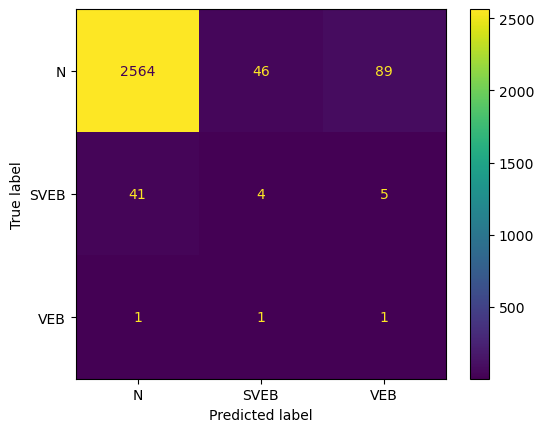

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_smote_PCA, acc_smote_PCA,confusion_matrix_final_smote,list_fscore_PCA = cross_valid(pipe_smote_PCA, skf, X, y,groups)
end_time=time.time()

In [24]:
df_smote_PCA

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.868581   0.103693    0.304521     0.390795      0.838485
precision     0.937381   0.095974    0.236446     0.423267      0.925653
recall        0.834835   0.238214    0.578958     0.480767      0.798380
support    2047.340909  63.159091  159.295455  2269.795455   2269.795455

In [25]:
confusion_matrix_final_smote

array([[74961.,  4929., 10193.],
       [ 1736.,   693.,   350.],
       [ 2082.,   854.,  4073.]])

In [26]:
list_fscore_PCA

{'patient0': {'0.0': 0.9755986316989737,
  '1.0': 0.17886178861788615,
  '2.0': 0.05555555555555556,
  'macro avg': 0.4033386586241385,
  'weighted avg': 0.963621361057328},
 'patient1': {'0.0': 0.964673157162726,
  '1.0': 0.024096385542168676,
  'macro avg': 0.3295898475682982,
  'weighted avg': 0.9631577273480849},
 'patient2': {'0.0': 0.9761612189727206,
  '1.0': 0.0,
  'macro avg': 0.32538707299090686,
  'weighted avg': 0.9752239542401495},
 'patient3': {'0.0': 0.834409594095941,
  '2.0': 0.09115281501340483,
  'macro avg': 0.3085208030364486,
  'weighted avg': 0.8225337063553392},
 'patient4': {'0.0': 0.9424252171116113,
  '2.0': 0.6683480453972257,
  'macro avg': 0.536924420836279,
  'weighted avg': 0.8720796449045627},
 'patient5': {'0.0': 0.7160674981658106,
  '1.0': 0.0,
  '2.0': 0.018832391713747645,
  'macro avg': 0.24496662995985274,
  'weighted avg': 0.7077054147553855},
 'patient6': {'0.0': 0.9152910512597741,
  '2.0': 0.16,
  'macro avg': 0.35843035041992466,
  'weighted

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pipe_select_30 = Pipeline([
        ('f_classif', SelectKBest(mutual_info_classif, k=30)),
        ('sampling', SMOTE(random_state = 123)),
        ('classification', DecisionTreeClassifier())
    ])
pipe_select_30

Pipeline(steps=[('f_classif',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001F14C94AD40>)),
                ('sampling', SMOTE(random_state=123)),
                ('classification', DecisionTreeClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2238
         1.0       0.82      0.27      0.41        33
         2.0       0.01      1.00      0.02         1

    accuracy                           0.96      2272
   macro avg       0.61      0.75      0.47      2272
weighted avg       1.00      0.96      0.98      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.999083   0.818182  0.012500  0.963468     0.609922   
recall        0.973637   0.272727  1.000000  0.963468     0.748788   
f1-score      0.986196   0.409091  0.024691  0.963468     0.473326   
support    2238.000000  33.000000  1.000000  0.963468  2272.000000   

           weighted avg  
precision      0.996021  
recall         0.963468  
f1-score       0.977391  
support     2272.000000  


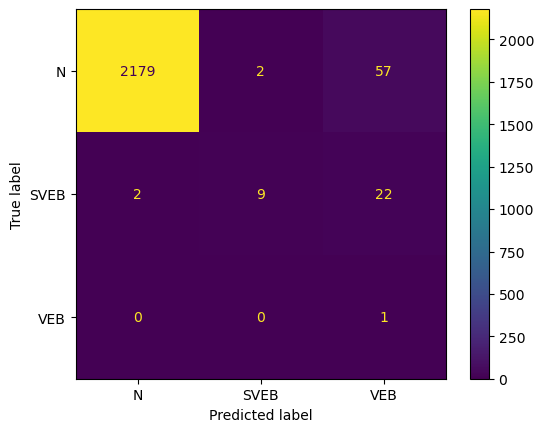

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1859
         1.0       0.50      0.67      0.57         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1862
   macro avg       0.50      0.55      0.52      1862
weighted avg       1.00      0.99      1.00      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.500000  0.0  0.994092     0.500000      0.999194
recall        0.994621  0.666667  NaN  0.994092     0.553762      0.994092
f1-score      0.997303  0.571429  NaN  0.994092     0.522911      0.996617
support    1859.000000  3.000000  0.0  0.994092  1862.000000   1862.000000


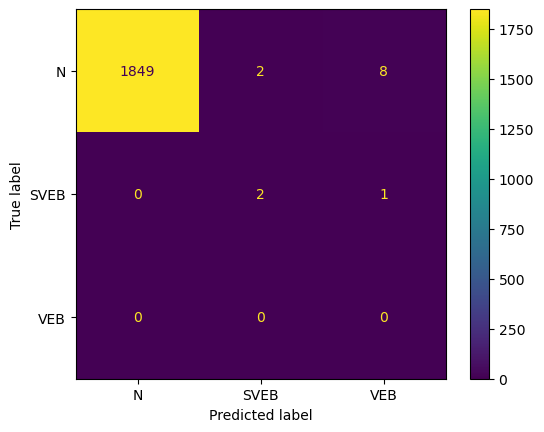

Fold 3:
  Test:  patient=2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       1.00      0.50      0.67         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.67      0.50      0.56      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  1.000000  0.0  0.996639     0.666667      1.000000
recall        0.997117  0.500000  NaN  0.996639     0.499039      0.996639
f1-score      0.998556  0.666667  NaN  0.996639     0.555074      0.998238
support    2081.000000  2.000000  0.0  0.996639  2083.000000   2083.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

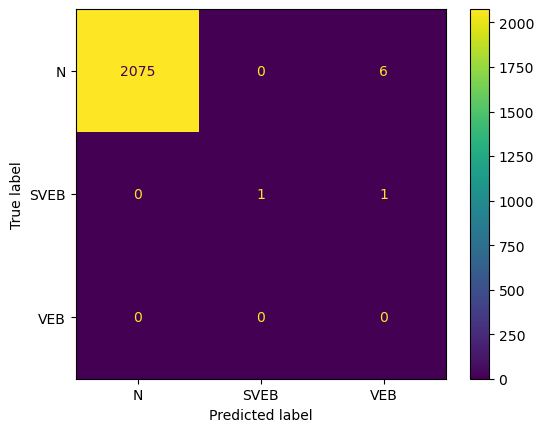

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.16      0.95      0.27        41

    accuracy                           0.91      2566
   macro avg       0.39      0.62      0.41      2566
weighted avg       0.99      0.91      0.94      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999567  0.0   0.157895  0.914263     0.385820      0.986118
recall        0.913663  NaN   0.951220  0.914263     0.621628      0.914263
f1-score      0.954687  NaN   0.270833  0.914263     0.408507      0.943760
support    2525.000000  0.0  41.000000  0.914263  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

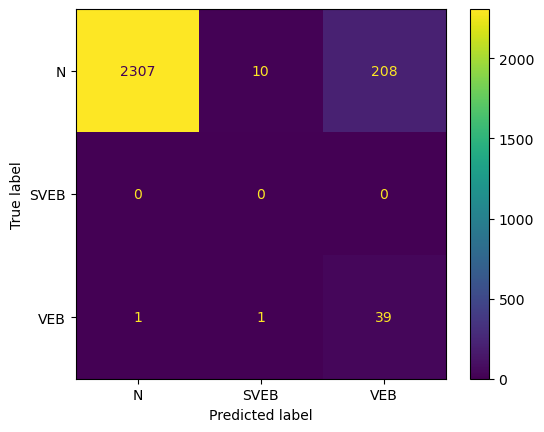

Fold 5:
  Test:  patient=4


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.32      0.48       520

    accuracy                           0.82      2026
   macro avg       0.61      0.44      0.47      2026
weighted avg       0.89      0.82      0.81      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.852841  0.0    0.988095  0.822804     0.613645      0.887556
recall        0.996680  NaN    0.319231  0.822804     0.438637      0.822804
f1-score      0.919167  NaN    0.482558  0.822804     0.467242      0.807106
support    1506.000000  0.0  520.000000  0.822804  2026.000000   2026.000000


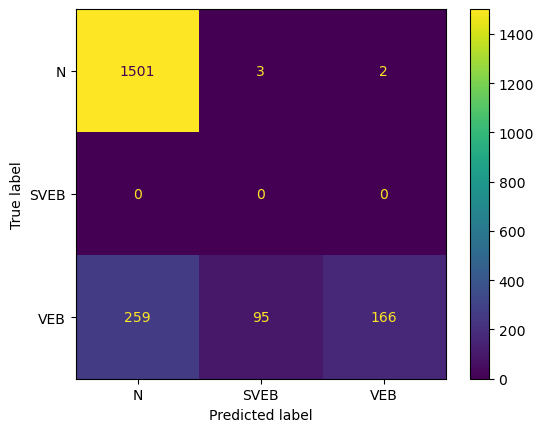

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.02      0.59      0.04        17

    accuracy                           0.70      1760
   macro avg       0.34      0.43      0.29      1760
weighted avg       0.98      0.70      0.82      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995126  0.0   0.020161  0.701705     0.338429      0.983447
recall        0.704428  0.0   0.588235  0.701705     0.430888      0.701705
f1-score      0.824916  0.0   0.038986  0.701705     0.287967      0.815450
support    1739.000000  4.0  17.000000  0.701705  1760.000000   1760.000000


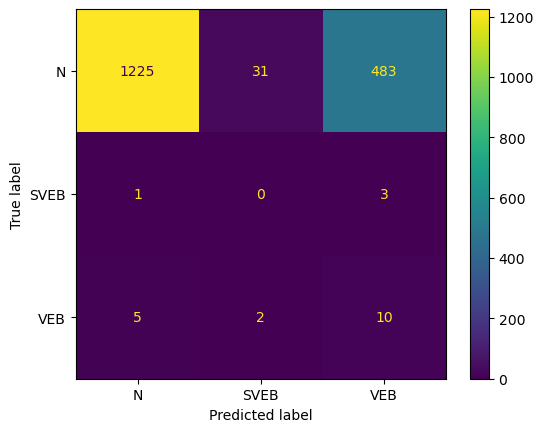

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.18      0.30      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.02      0.84      0.03        38

    accuracy                           0.19      2529
   macro avg       0.34      0.34      0.11      2529
weighted avg       0.98      0.19      0.30      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995546  0.0   0.015489  0.189403     0.337012      0.980820
recall        0.179446  NaN   0.842105  0.189403     0.340517      0.189403
f1-score      0.304082  NaN   0.030418  0.189403     0.111500      0.299970
support    2491.000000  0.0  38.000000  0.189403  2529.000000   2529.000000


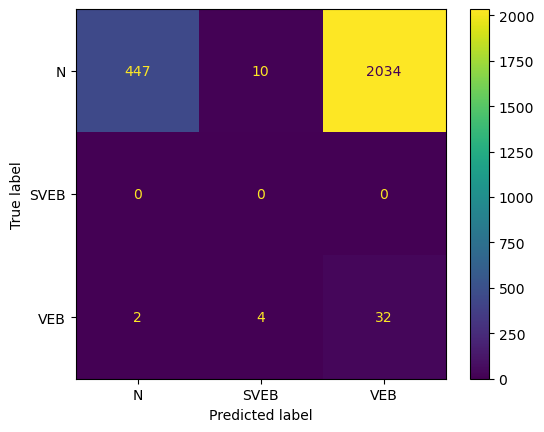

Fold 8:
  Test:  patient=7


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.02      1.00      0.04         1

    accuracy                           0.97      2123
   macro avg       0.34      0.66      0.34      2123
weighted avg       1.00      0.97      0.98      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.021277  0.968912     0.340426      0.999539
recall        0.968897  NaN  1.000000  0.968912     0.656299      0.968912
f1-score      0.984203  NaN  0.041667  0.968912     0.341957      0.983759
support    2122.000000  0.0  1.000000  0.968912  2123.000000   2123.000000


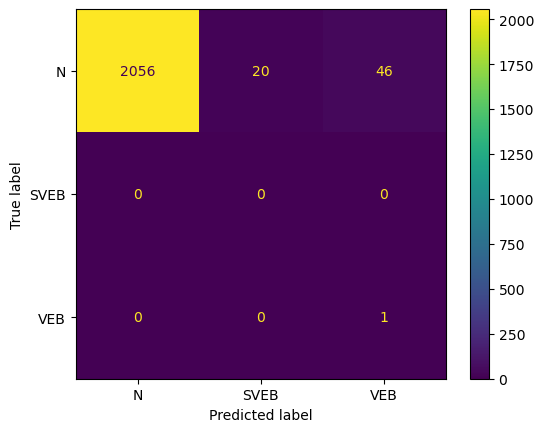

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2536
         1.0       0.05      1.00      0.10         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      2538
   macro avg       0.35      0.64      0.35      2538
weighted avg       1.00      0.92      0.96      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.052632  0.0   0.91844     0.350877      0.999253
recall        0.918375  1.000000  NaN   0.91844     0.639458      0.918440
f1-score      0.957451  0.100000  NaN   0.91844     0.352484      0.956775
support    2536.000000  2.000000  0.0   0.91844  2538.000000   2538.000000


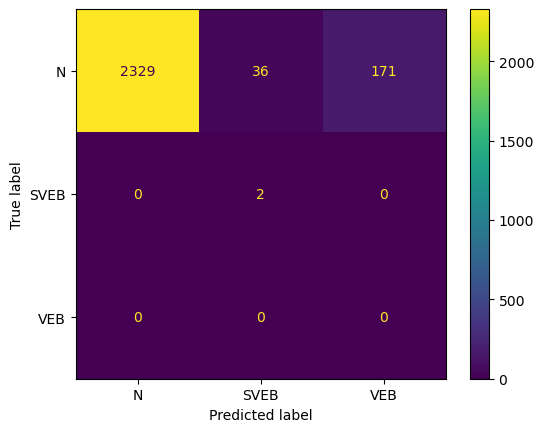

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1794
   macro avg       0.33      0.33      0.33      1794
weighted avg       1.00      0.98      0.99      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999432  0.0  0.0  0.981048     0.333144      0.996090
recall        0.984340  0.0  NaN  0.981048     0.328113      0.981048
f1-score      0.991829  0.0  NaN  0.981048     0.330610      0.988512
support    1788.000000  6.0  0.0  0.981048  1794.000000   1794.000000


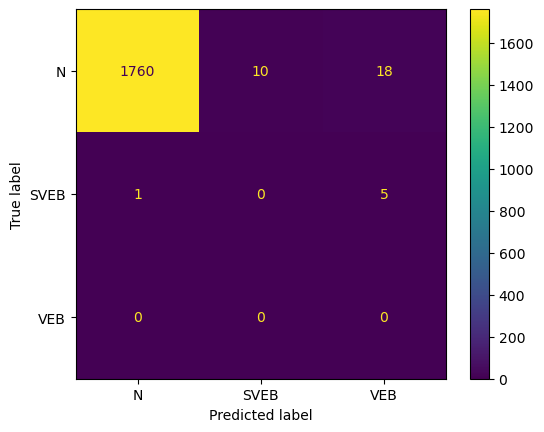

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1819
         1.0       0.07      0.17      0.10        12
         2.0       0.35      0.81      0.49        43

    accuracy                           0.94      1874
   macro avg       0.47      0.64      0.52      1874
weighted avg       0.97      0.94      0.95      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991982   0.074074   0.346535   0.94397     0.470863   
recall        0.952172   0.166667   0.813953   0.94397     0.644264   
f1-score      0.971669   0.102564   0.486111   0.94397     0.520115   
support    1819.000000  12.000000  43.000000   0.94397  1874.000000   

           weighted avg  
precision      0.971294  
recall         0.943970  
f1-score       0.954962  
support     1874.000000  


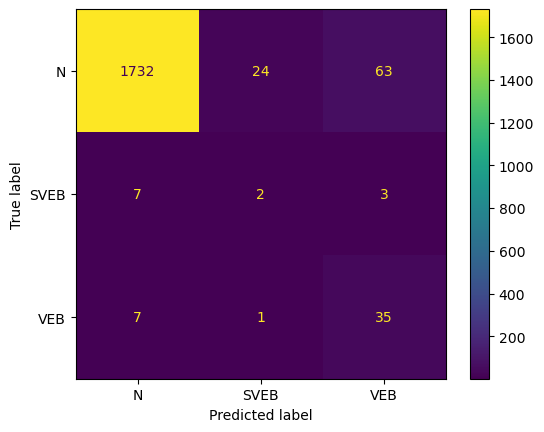

Fold 12:
  Test:  patient=11


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.99      1.00      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.992828     0.333333      1.000000
recall        0.992828  NaN  NaN  0.992828     0.330943      0.992828
f1-score      0.996401  NaN  NaN  0.992828     0.332134      0.996401
support    1952.000000  0.0  0.0  0.992828  1952.000000   1952.000000


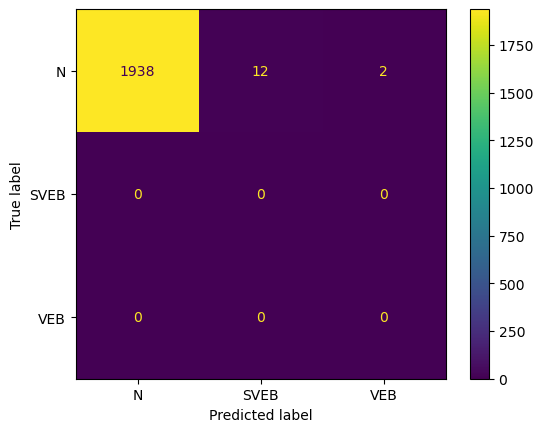

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.65      0.96      0.77       109

    accuracy                           0.96      2411
   macro avg       0.55      0.64      0.59      2411
weighted avg       0.98      0.96      0.97      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998201  0.0    0.648148   0.96433     0.548783      0.981962
recall        0.964798  0.0    0.963303   0.96433     0.642700      0.964330
f1-score      0.981215  0.0    0.774908   0.96433     0.585374      0.971481
support    2301.000000  1.0  109.000000   0.96433  2411.000000   2411.000000


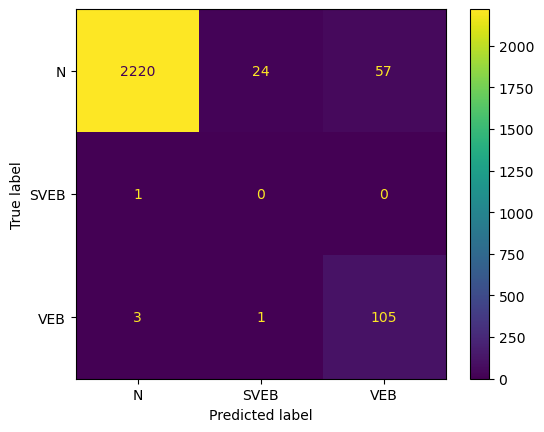

Fold 14:
  Test:  patient=13


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      1533
         1.0       0.05      1.00      0.10         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.86      1534
   macro avg       0.35      0.62      0.34      1534
weighted avg       1.00      0.86      0.93      1534

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.052632  0.0  0.864407     0.350877      0.999382
recall        0.864318  1.000000  NaN  0.864407     0.621439      0.864407
f1-score      0.927222  0.100000  NaN  0.864407     0.342407      0.926683
support    1533.000000  1.000000  0.0  0.864407  1534.000000   1534.000000


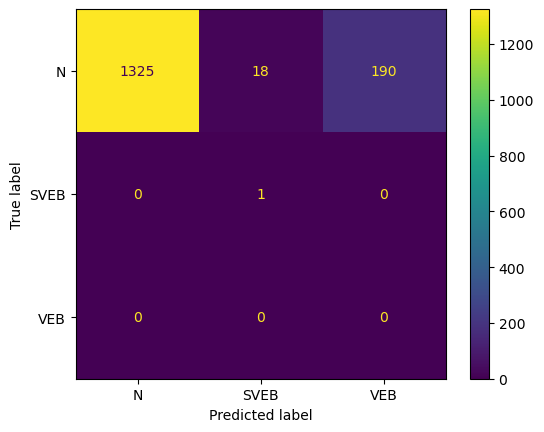

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      2165
         1.0       0.43      0.24      0.31        96
         2.0       0.03      0.62      0.06        16

    accuracy                           0.84      2277
   macro avg       0.48      0.58      0.43      2277
weighted avg       0.96      0.84      0.89      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.985856   0.433962   0.031746  0.841019     0.483855   
recall        0.869284   0.239583   0.625000  0.841019     0.577956   
f1-score      0.923908   0.308725   0.060423  0.841019     0.431019   
support    2165.000000  96.000000  16.000000  0.841019  2277.000000   

           weighted avg  
precision      0.955884  
recall         0.841019  
f1-score       0.891904  
support     2277.000000  


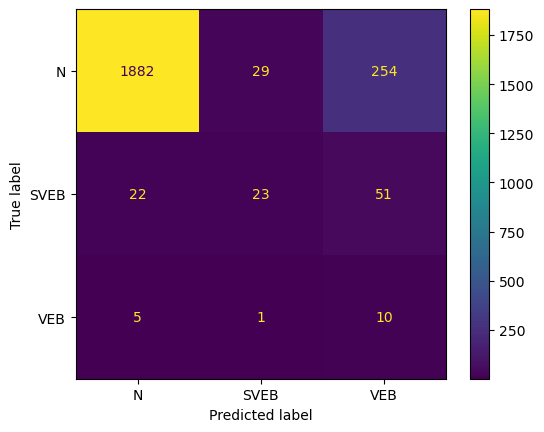

Fold 16:
  Test:  patient=15


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.21      0.35       444

    accuracy                           0.82      1986
   macro avg       0.65      0.40      0.44      1986
weighted avg       0.97      0.82      0.84      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.962799  0.0    0.989362   0.81571     0.650720      0.968738
recall        0.990272  NaN    0.209459   0.81571     0.399911      0.815710
f1-score      0.976343  NaN    0.345725   0.81571     0.440689      0.835359
support    1542.000000  0.0  444.000000   0.81571  1986.000000   1986.000000


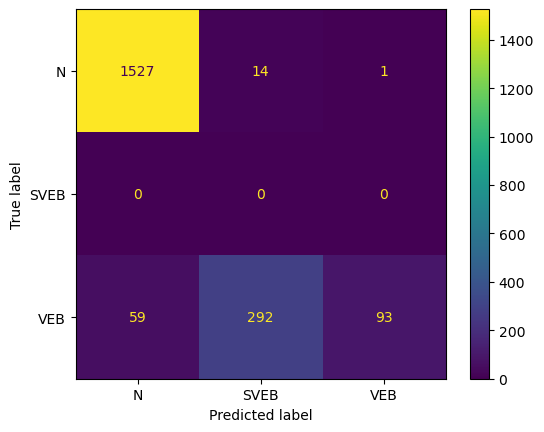

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1860
         1.0       0.02      1.00      0.03         1
         2.0       0.02      1.00      0.04         1

    accuracy                           0.94      1862
   macro avg       0.35      0.98      0.35      1862
weighted avg       1.00      0.94      0.97      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.015873  0.021277  0.941998     0.345717   
recall        0.941935  1.000000  1.000000  0.941998     0.980645   
f1-score      0.970100  0.031250  0.041667  0.941998     0.347672   
support    1860.000000  1.000000  1.000000  0.941998  1862.000000   

           weighted avg  
precision      0.998946  
recall         0.941998  
f1-score       0.969097  
support     1862.000000  


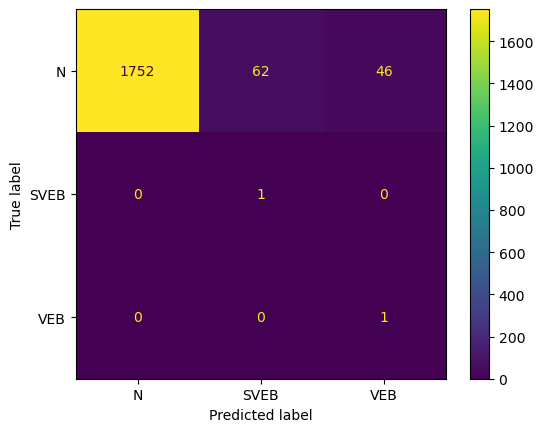

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.79      2475
   macro avg       0.33      0.26      0.29      2475
weighted avg       1.00      0.79      0.88      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.786263     0.333333      1.000000
recall        0.786263  NaN  NaN  0.786263     0.262088      0.786263
f1-score      0.880344  NaN  NaN  0.786263     0.293448      0.880344
support    2475.000000  0.0  0.0  0.786263  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

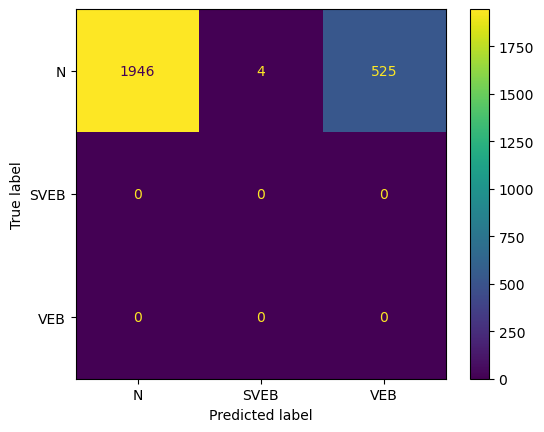

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.60      1517
   macro avg       0.33      0.20      0.25      1517
weighted avg       1.00      0.60      0.75      1517

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998894  0.0  0.0  0.595254     0.332965      0.996918
recall        0.596433  NaN  0.0  0.595254     0.198811      0.595254
f1-score      0.746898  NaN  0.0  0.595254     0.248966      0.745421
support    1514.000000  0.0  3.0  0.595254  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

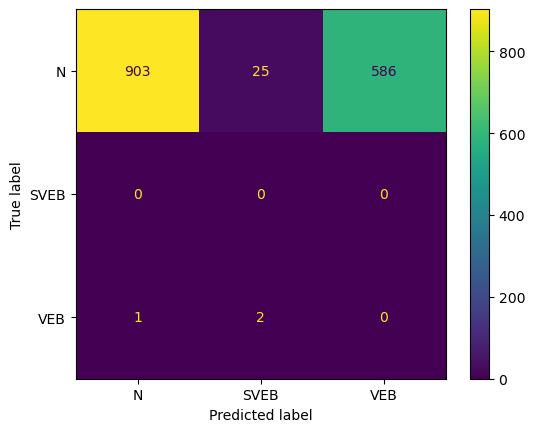

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.05      0.70      0.09        47

    accuracy                           0.59      1613
   macro avg       0.34      0.43      0.28      1613
weighted avg       0.93      0.59      0.71      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.975738   0.0   0.050152  0.593924     0.341963      0.930016
recall        0.602606   0.0   0.702128  0.593924     0.434911      0.593924
f1-score      0.745066   0.0   0.093617  0.593924     0.279561      0.711765
support    1535.000000  31.0  47.000000  0.593924  1613.000000   1613.000000


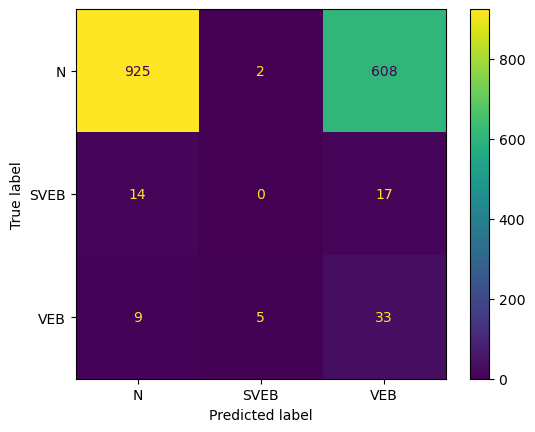

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1742
         1.0       0.12      0.20      0.15        30
         2.0       0.96      0.93      0.95       826

    accuracy                           0.94      2598
   macro avg       0.68      0.70      0.69      2598
weighted avg       0.95      0.94      0.95      2598

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.961054   0.12    0.961347  0.944958     0.680800      0.951435
recall        0.963261   0.20    0.933414  0.944958     0.698892      0.944958
f1-score      0.962156   0.15    0.947174  0.944958     0.686443      0.948015
support    1742.000000  30.00  826.000000  0.944958  2598.000000   2598.000000


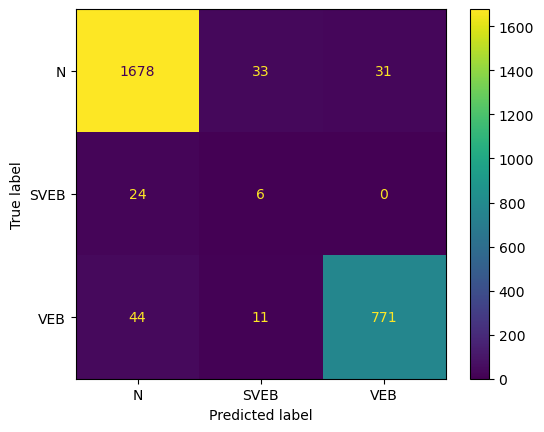

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1634
         1.0       0.26      0.35      0.30       128
         2.0       0.17      0.20      0.18       198

    accuracy                           0.74      1960
   macro avg       0.44      0.46      0.45      1960
weighted avg       0.77      0.74      0.75      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.880722    0.258621    0.165957  0.739796     0.435100   
recall        0.835985    0.351562    0.196970  0.739796     0.461506   
f1-score      0.857771    0.298013    0.180139  0.739796     0.445308   
support    1634.000000  128.000000  198.000000  0.739796  1960.000000   

           weighted avg  
precision      0.767889  
recall         0.739796  
f1-score       0.752761  
support     1960.000000  


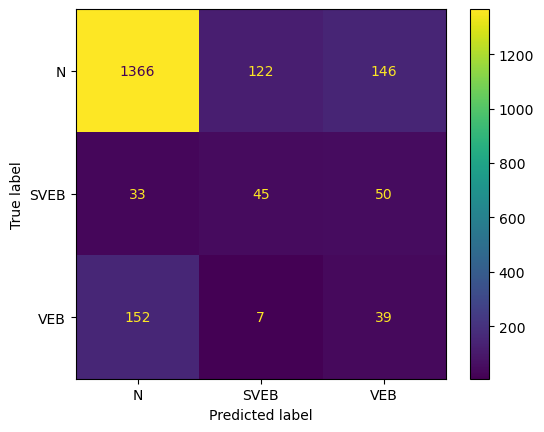

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2060
         1.0       0.24      0.38      0.30        55
         2.0       0.21      0.89      0.34        19

    accuracy                           0.93      2134
   macro avg       0.48      0.74      0.54      2134
weighted avg       0.97      0.93      0.95      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.992879   0.241379   0.209877  0.932521     0.481378   
recall        0.947573   0.381818   0.894737  0.932521     0.741376   
f1-score      0.969697   0.295775   0.340000  0.932521     0.535157   
support    2060.000000  55.000000  19.000000  0.932521  2134.000000   

           weighted avg  
precision      0.966539  
recall         0.932521  
f1-score       0.946721  
support     2134.000000  


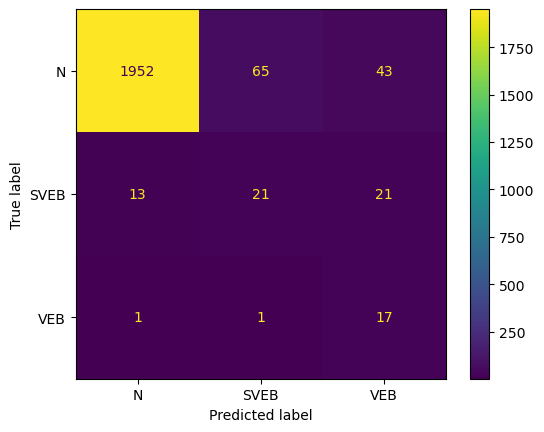

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.33      0.83      0.47       444

    accuracy                           0.68      2974
   macro avg       0.43      0.49      0.42      2974
weighted avg       0.87      0.68      0.73      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.961966  0.0    0.332133  0.676866     0.431366      0.867289
recall        0.650316  0.0    0.831081  0.676866     0.493799      0.676866
f1-score      0.776021  0.0    0.474598  0.676866     0.416873      0.730498
support    2528.000000  2.0  444.000000  0.676866  2974.000000   2974.000000


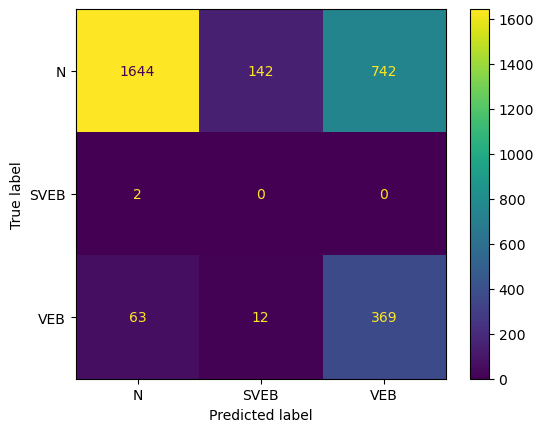

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2570
         1.0       0.04      0.33      0.07         3
         2.0       0.85      0.97      0.91        71

    accuracy                           0.99      2644
   macro avg       0.63      0.76      0.66      2644
weighted avg       0.99      0.99      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.999606  0.037037   0.851852   0.98525     0.629498   
recall        0.986381  0.333333   0.971831   0.98525     0.763849   
f1-score      0.992949  0.066667   0.907895   0.98525     0.655837   
support    2570.000000  3.000000  71.000000   0.98525  2644.000000   

           weighted avg  
precision      0.994546  
recall         0.985250  
f1-score       0.989614  
support     2644.000000  


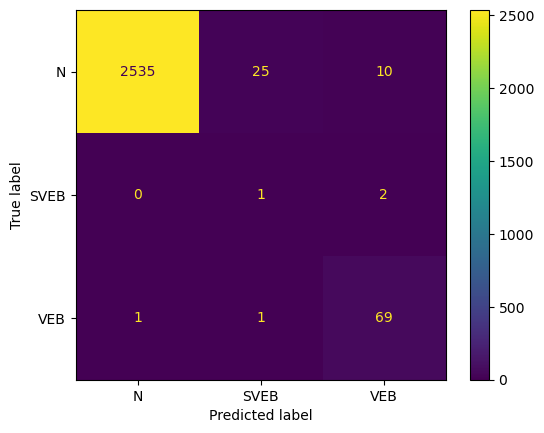

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.44      0.06      0.10      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.43      0.10       210

    accuracy                           0.10      1859
   macro avg       0.17      0.16      0.07      1859
weighted avg       0.37      0.10      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.442786    0.0    0.055185  0.096826     0.165990      0.373753
recall        0.057680    0.0    0.433333  0.096826     0.163671      0.096826
f1-score      0.102064    0.0    0.097902  0.096826     0.066655      0.095774
support    1543.000000  106.0  210.000000  0.096826  1859.000000   1859.000000


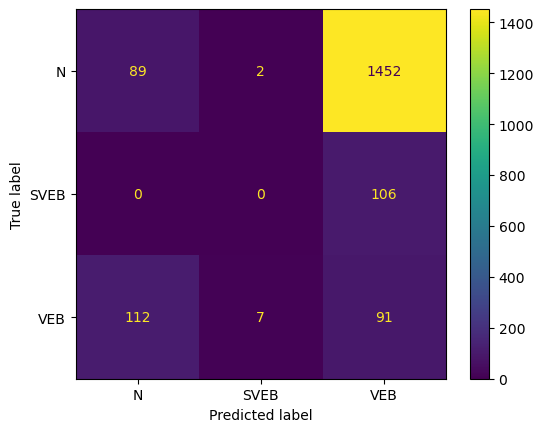

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.93      0.38      0.54       992

    accuracy                           0.67      2579
   macro avg       0.58      0.41      0.46      2579
weighted avg       0.86      0.67      0.72      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.827523  0.0    0.925926  0.670027     0.584483      0.864731
recall        0.853628  0.0    0.378024  0.670027     0.410551      0.670027
f1-score      0.840373  0.0    0.536865  0.670027     0.459079      0.722978
support    1585.000000  2.0  992.000000  0.670027  2579.000000   2579.000000


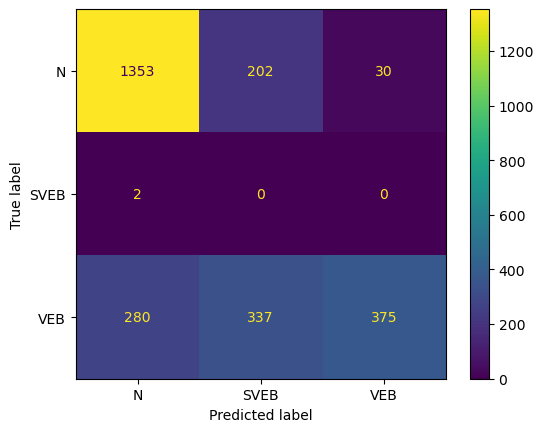

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.89      0.34      0.49      2620
         1.0       0.93      0.52      0.67       383
         2.0       0.00      1.00      0.00         1

    accuracy                           0.36      3004
   macro avg       0.61      0.62      0.39      3004
weighted avg       0.90      0.36      0.51      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.889899    0.934272  0.000555  0.359854     0.608242   
recall        0.336260    0.519582  1.000000  0.359854     0.618614   
f1-score      0.488089    0.667785  0.001110  0.359854     0.385661   
support    2620.000000  383.000000  1.000000  0.359854  3004.000000   

           weighted avg  
precision      0.895260  
recall         0.359854  
f1-score       0.510837  
support     3004.000000  


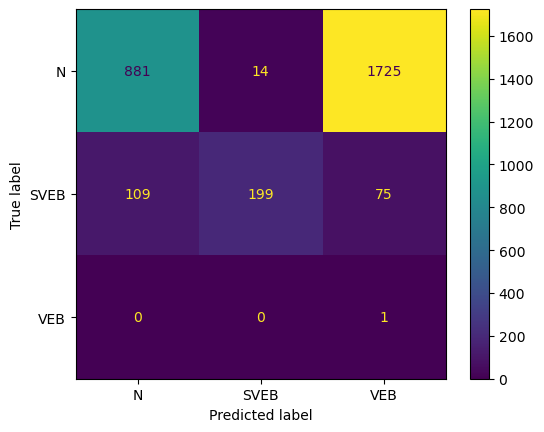

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      2422
         1.0       0.04      0.36      0.07        22
         2.0       0.41      0.59      0.49       195

    accuracy                           0.84      2639
   macro avg       0.48      0.61      0.49      2639
weighted avg       0.93      0.84      0.88      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.978150   0.038462    0.414286  0.844259     0.476966   
recall        0.868704   0.363636    0.594872  0.844259     0.609071   
f1-score      0.920184   0.069565    0.488421  0.844259     0.492723   
support    2422.000000  22.000000  195.000000  0.844259  2639.000000   

           weighted avg  
precision      0.928651  
recall         0.844259  
f1-score       0.881189  
support     2639.000000  


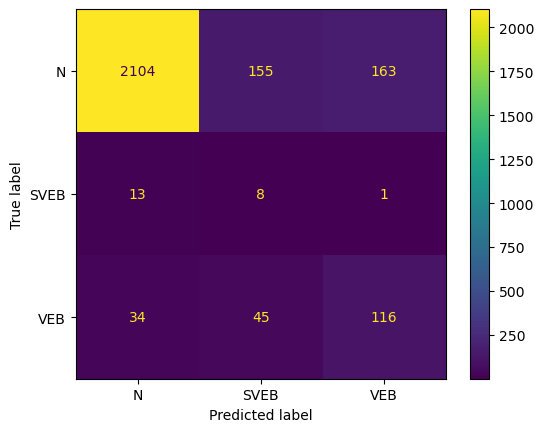

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.83      2747
   macro avg       0.33      0.28      0.30      2747
weighted avg       1.00      0.83      0.91      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0   0.83036     0.333333      1.000000
recall        0.830360  NaN  NaN   0.83036     0.276787      0.830360
f1-score      0.907319  NaN  NaN   0.83036     0.302440      0.907319
support    2747.000000  0.0  0.0   0.83036  2747.000000   2747.000000


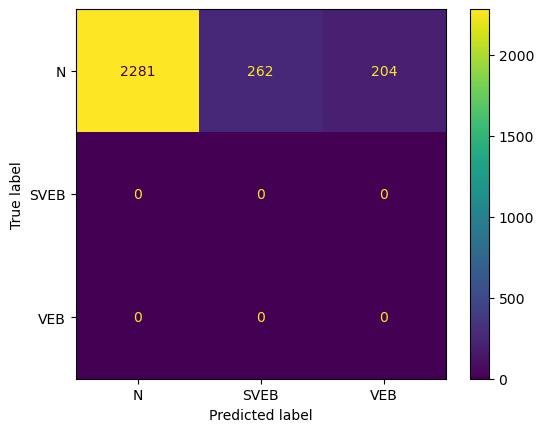

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2640
         1.0       0.16      0.11      0.13        28
         2.0       0.36      0.36      0.36       220

    accuracy                           0.90      2888
   macro avg       0.49      0.47      0.48      2888
weighted avg       0.90      0.90      0.90      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.948621   0.157895    0.360360  0.898199     0.488959   
recall        0.951136   0.107143    0.363636  0.898199     0.473972   
f1-score      0.949877   0.127660    0.361991  0.898199     0.479843   
support    2640.000000  28.000000  220.000000  0.898199  2888.000000   

           weighted avg  
precision      0.896143  
recall         0.898199  
f1-score       0.897122  
support     2888.000000  


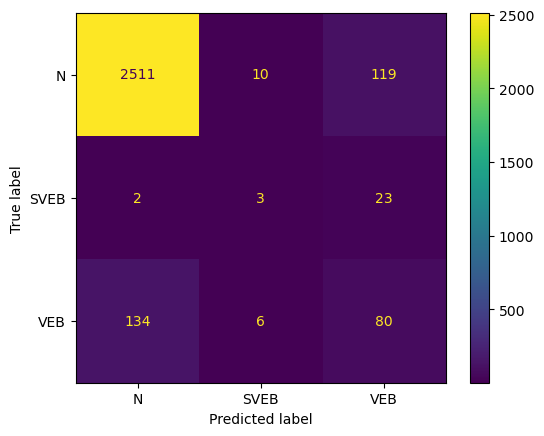

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.89      0.69       256

    accuracy                           0.85      2258
   macro avg       0.52      0.58      0.54      2258
weighted avg       0.94      0.85      0.89      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.987217  0.0    0.565432  0.853853     0.517550      0.939397
recall        0.848651  NaN    0.894531  0.853853     0.581061      0.853853
f1-score      0.912705  NaN    0.692890  0.853853     0.535198      0.887783
support    2002.000000  0.0  256.000000  0.853853  2258.000000   2258.000000


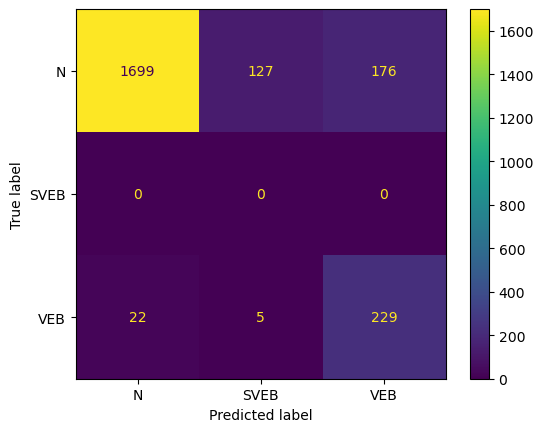

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3194
         1.0       0.03      0.67      0.06         3
         2.0       0.89      0.88      0.89       164

    accuracy                           0.97      3361
   macro avg       0.64      0.84      0.64      3361
weighted avg       0.99      0.97      0.98      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.996173  0.031250    0.894410  0.972925     0.640611   
recall        0.978084  0.666667    0.878049  0.972925     0.840933   
f1-score      0.987046  0.059701    0.886154  0.972925     0.644300   
support    3194.000000  3.000000  164.000000  0.972925  3361.000000   

           weighted avg  
precision      0.990347  
recall         0.972925  
f1-score       0.981295  
support     3361.000000  


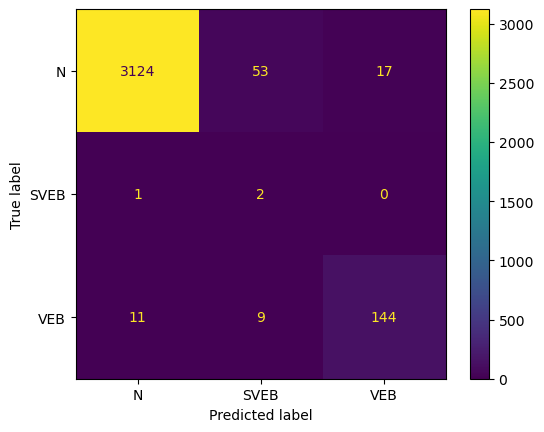

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2081
         1.0       0.02      0.29      0.04         7
         2.0       0.19      0.73      0.30        64

    accuracy                           0.85      2152
   macro avg       0.40      0.63      0.42      2152
weighted avg       0.96      0.85      0.90      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.990592  0.020619   0.189516  0.854554     0.400242   
recall        0.860163  0.285714   0.734375  0.854554     0.626751   
f1-score      0.920782  0.038462   0.301282  0.854554     0.420175   
support    2081.000000  7.000000  64.000000  0.854554  2152.000000   

           weighted avg  
precision      0.963613  
recall         0.854554  
f1-score       0.899488  
support     2152.000000  


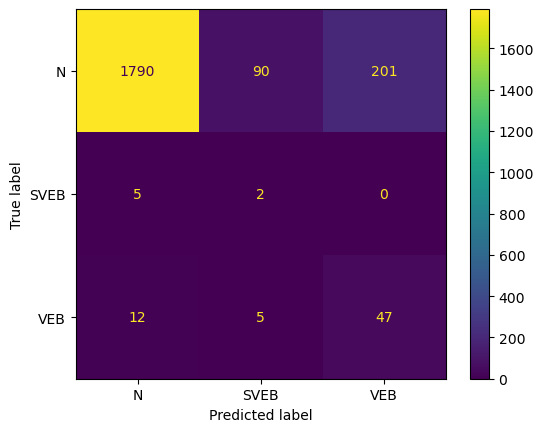

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1953
         1.0       0.95      0.19      0.32        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2047
   macro avg       0.64      0.40      0.43      2047
weighted avg       0.97      0.96      0.95      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.971599   0.947368  0.0  0.961407     0.639656      0.970487
recall        0.998464   0.191489  NaN  0.961407     0.396651      0.961407
f1-score      0.984848   0.318584  NaN  0.961407     0.434478      0.954253
support    1953.000000  94.000000  0.0  0.961407  2047.000000   2047.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

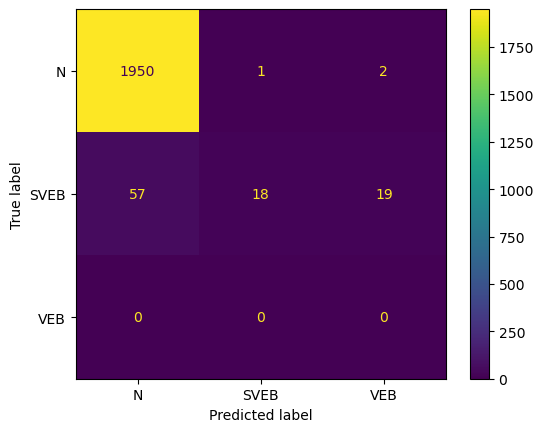

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.81      0.42      0.55       396

    accuracy                           0.83      2426
   macro avg       0.60      0.45      0.50      2426
weighted avg       0.96      0.83      0.89      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.992509  0.0    0.810680  0.833471     0.601063      0.962829
recall        0.913793  NaN    0.421717  0.833471     0.445170      0.833471
f1-score      0.951526  NaN    0.554817  0.833471     0.502114      0.886771
support    2030.000000  0.0  396.000000  0.833471  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

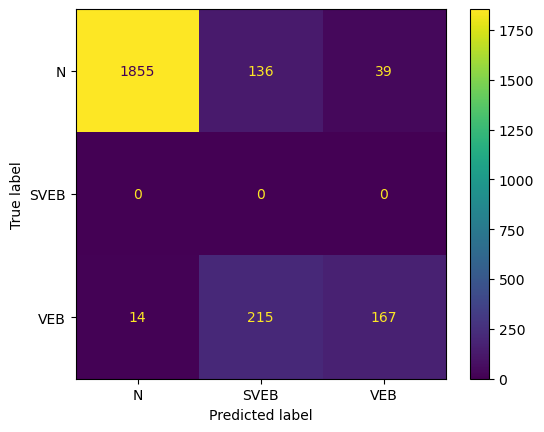

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.97      0.61      0.74      2273
         1.0       0.32      0.40      0.35       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.59      2482
   macro avg       0.43      0.33      0.37      2482
weighted avg       0.91      0.59      0.71      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.966292    0.318008  0.0  0.587832     0.428100      0.911703
recall        0.605367    0.397129  NaN  0.587832     0.334166      0.587832
f1-score      0.744387    0.353191  NaN  0.587832     0.365860      0.711446
support    2273.000000  209.000000  0.0  0.587832  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

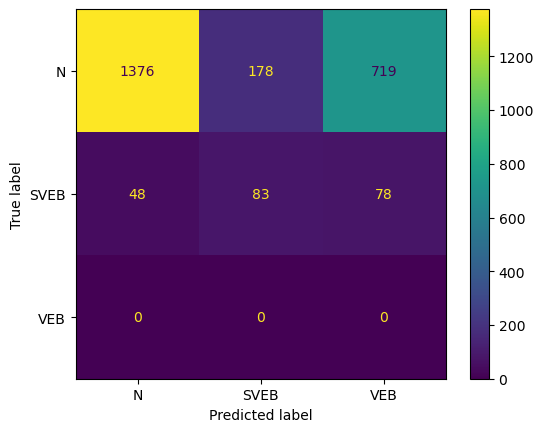

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2044
         1.0       0.12      0.14      0.13        73
         2.0       0.87      0.82      0.84       473

    accuracy                           0.92      2590
   macro avg       0.65      0.64      0.65      2590
weighted avg       0.92      0.92      0.92      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.964217   0.125000    0.873303   0.92278     0.654173   
recall        0.975538   0.136986    0.816068   0.92278     0.642864   
f1-score      0.969844   0.130719    0.843716   0.92278     0.648093   
support    2044.000000  73.000000  473.000000   0.92278  2590.000000   

           weighted avg  
precision      0.923960  
recall         0.922780  
f1-score       0.923159  
support     2590.000000  


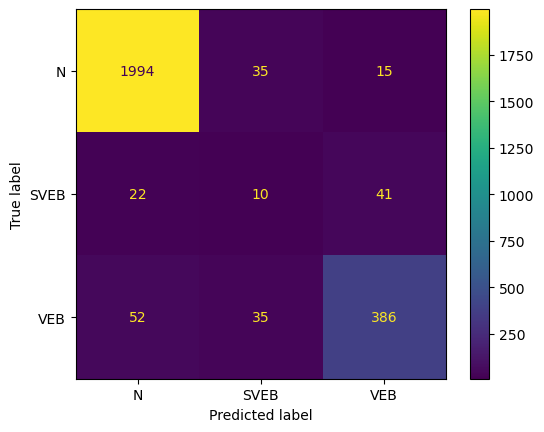

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1687
         1.0       0.01      0.33      0.02         3
         2.0       0.75      0.94      0.83       362

    accuracy                           0.89      2052
   macro avg       0.58      0.72      0.60      2052
weighted avg       0.95      0.89      0.91      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.991333  0.010309    0.747253  0.890838     0.582965   
recall        0.881446  0.333333    0.939227  0.890838     0.718002   
f1-score      0.933166  0.020000    0.832313  0.890838     0.595160   
support    1687.000000  3.000000  362.000000  0.890838  2052.000000   

           weighted avg  
precision      0.946840  
recall         0.890838  
f1-score       0.914039  
support     2052.000000  


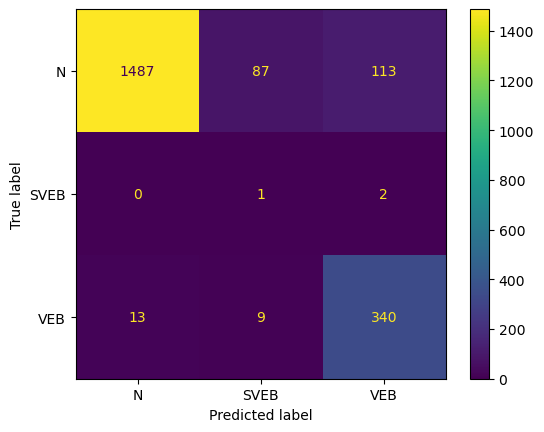

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.69      2255
   macro avg       0.33      0.56      0.28      2255
weighted avg       1.00      0.69      0.82      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.004878  0.692683     0.334959      0.999559
recall        0.692547  NaN  1.000000  0.692683     0.564182      0.692683
f1-score      0.818349  NaN  0.009709  0.692683     0.276019      0.817990
support    2254.000000  0.0  1.000000  0.692683  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

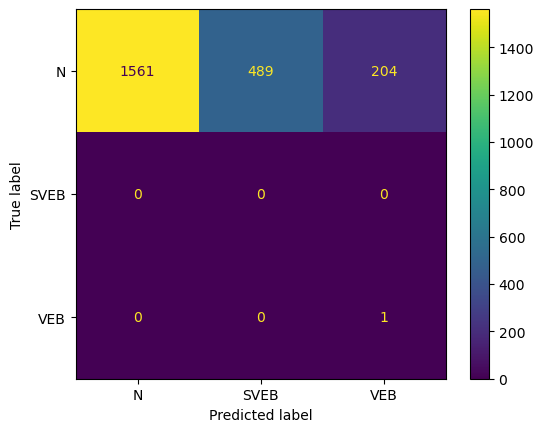

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.01      0.50      0.02         2

    accuracy                           0.84      1570
   macro avg       0.34      0.45      0.31      1570
weighted avg       1.00      0.84      0.91      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998481  0.0  0.009709  0.838217     0.336063      0.996586
recall        0.839183  0.0  0.500000  0.838217     0.446394      0.838217
f1-score      0.911928  0.0  0.019048  0.838217     0.310325      0.910210
support    1567.000000  1.0  2.000000  0.838217  1570.000000   1570.000000


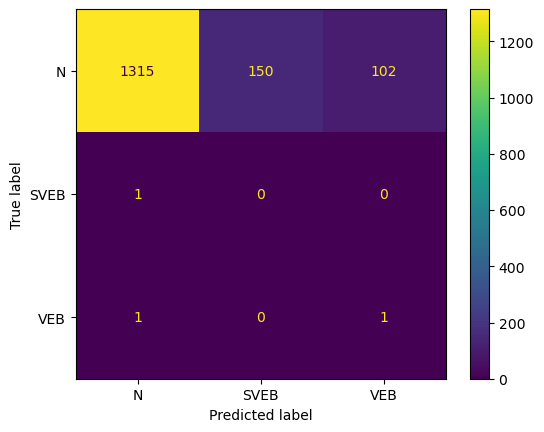

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.25      0.96      0.39       398
         1.0       0.99      0.14      0.25      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.32      1779
   macro avg       0.41      0.37      0.21      1779
weighted avg       0.82      0.32      0.28      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.248532     0.989848  0.0  0.323777     0.412793      0.824000
recall       0.957286     0.141202  NaN  0.323777     0.366163      0.323777
f1-score     0.394614     0.247148  NaN  0.323777     0.213921      0.280140
support    398.000000  1381.000000  0.0  0.323777  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

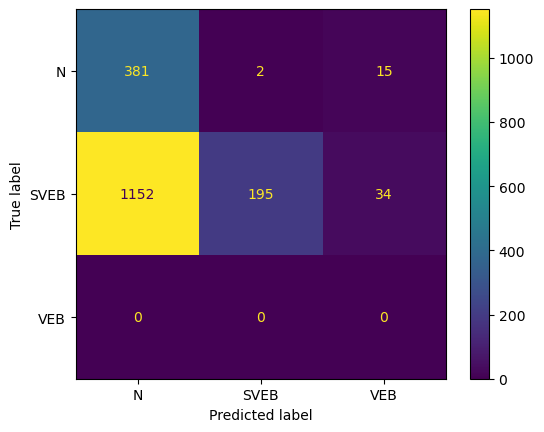

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      2229
         1.0       0.09      0.71      0.16         7
         2.0       0.85      0.92      0.88       831

    accuracy                           0.92      3067
   macro avg       0.64      0.85      0.67      3067
weighted avg       0.94      0.92      0.93      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.980057  0.090909    0.846578  0.924682     0.639181   
recall        0.925976  0.714286    0.922984  0.924682     0.854415   
f1-score      0.952249  0.161290    0.883132  0.924682     0.665557   
support    2229.000000  7.000000  831.000000  0.924682  3067.000000   

           weighted avg  
precision      0.941862  
recall         0.924682  
f1-score       0.931717  
support     3067.000000  


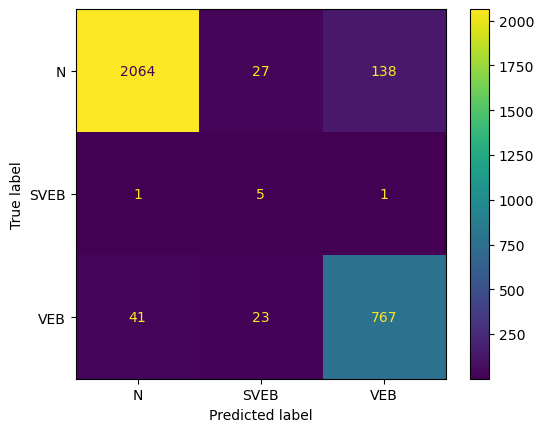

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2699
         1.0       0.02      0.08      0.03        50
         2.0       0.07      1.00      0.12         3

    accuracy                           0.88      2752
   macro avg       0.35      0.66      0.36      2752
weighted avg       0.96      0.88      0.92      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.981263   0.015873  0.066667  0.877907     0.354601   
recall        0.892553   0.080000  1.000000  0.877907     0.657518   
f1-score      0.934808   0.026490  0.125000  0.877907     0.362099   
support    2699.000000  50.000000  3.000000  0.877907  2752.000000   

           weighted avg  
precision      0.962726  
recall         0.877907  
f1-score       0.917422  
support     2752.000000  


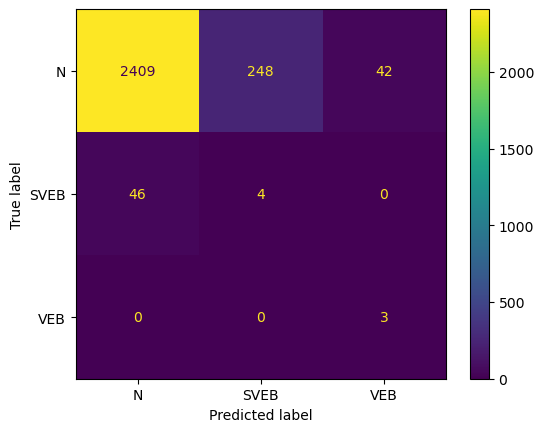

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_features30, acc_features30,confusion_matrix_final_30features,list_select_30 = cross_valid(pipe_select_30, skf, X, y,groups)
end_time=time.time()

In [40]:
df_features30

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.868643   0.166274    0.368962     0.422097      0.842035
precision     0.947876   0.165550    0.286103     0.466510      0.942530
recall        0.837328   0.314048    0.718772     0.534935      0.802371
support    2047.340909  63.159091  159.295455  2269.795455   2269.795455

In [41]:
print("Time"+str(end_time-start_time))

Time1577.9736289978027


In [42]:
confusion_matrix_final_30features

array([[75277.,  2993., 11813.],
       [ 1579.,   644.,   556.],
       [ 1338.,  1132.,  4539.]])

In [43]:
list_select_30

{'patient0': {'0.0': 0.9861959719393527,
  '1.0': 0.4090909090909091,
  '2.0': 0.02469135802469136,
  'macro avg': 0.47332607968498447,
  'weighted avg': 0.9773905266541795},
 'patient1': {'0.0': 0.9973031283710896,
  '1.0': 0.5714285714285715,
  'macro avg': 0.522910566599887,
  'weighted avg': 0.9966169717272509},
 'patient2': {'0.0': 0.9985563041385949,
  '1.0': 0.6666666666666666,
  'macro avg': 0.5550743236017538,
  'weighted avg': 0.9982376391002158},
 'patient3': {'0.0': 0.9546865301055245,
  '2.0': 0.27083333333333326,
  'macro avg': 0.40850662114628594,
  'weighted avg': 0.9437598032669977},
 'patient4': {'0.0': 0.9191671769748928,
  '2.0': 0.4825581395348837,
  'macro avg': 0.4672417721699255,
  'weighted avg': 0.807105627385157},
 'patient5': {'0.0': 0.8249158249158248,
  '1.0': 0.0,
  '2.0': 0.03898635477582846,
  'macro avg': 0.2879673932305511,
  'weighted avg': 0.8154496520226184},
 'patient6': {'0.0': 0.3040816326530612,
  '2.0': 0.030418250950570342,
  'macro avg': 0.1

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pipe_select_19 = Pipeline([
        ('f_classif', SelectKBest(mutual_info_classif, k=19)),
        ('sampling', SMOTE(random_state = 123)),
        ('classification', DecisionTreeClassifier())
    ])
pipe_select_19

Pipeline(steps=[('f_classif',
                 SelectKBest(k=19,
                             score_func=<function mutual_info_classif at 0x000001F14C94AD40>)),
                ('sampling', SMOTE(random_state=123)),
                ('classification', DecisionTreeClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2238
         1.0       0.75      0.27      0.40        33
         2.0       0.01      1.00      0.03         1

    accuracy                           0.97      2272
   macro avg       0.59      0.75      0.47      2272
weighted avg       1.00      0.97      0.98      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.750000  0.012987  0.965229     0.587662   
recall        0.975424   0.272727  1.000000  0.965229     0.749384   
f1-score      0.987559   0.400000  0.025641  0.965229     0.471067   
support    2238.000000  33.000000  1.000000  0.965229  2272.000000   

           weighted avg  
precision      0.995934  
recall         0.965229  
f1-score       0.978602  
support     2272.000000  


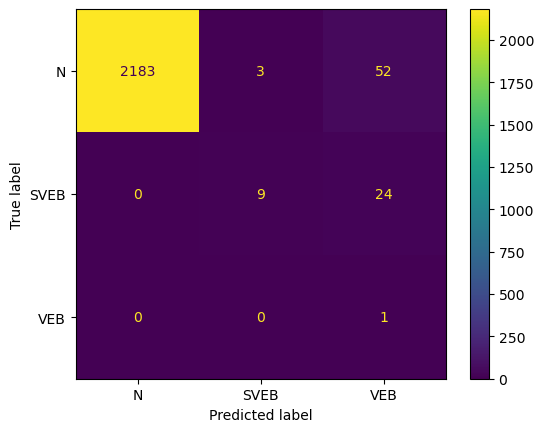

Fold 2:
  Test:  patient=1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1859
         1.0       0.67      0.67      0.67         3
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      1862
   macro avg       0.56      0.55      0.56      1862
weighted avg       1.00      1.00      1.00      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.666667  0.0  0.996241     0.555556      0.999463
recall        0.996772  0.666667  NaN  0.996241     0.554480      0.996241
f1-score      0.998384  0.666667  NaN  0.996241     0.555017      0.997849
support    1859.000000  3.000000  0.0  0.996241  1862.000000   1862.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

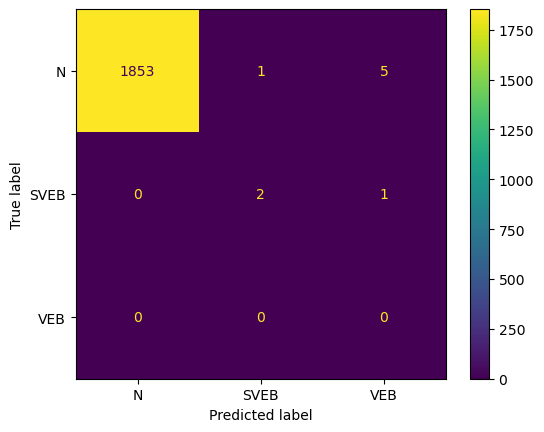

Fold 3:
  Test:  patient=2


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       1.00      0.50      0.67         2
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2083
   macro avg       0.67      0.50      0.56      2083
weighted avg       1.00      1.00      1.00      2083

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  1.000000  0.0  0.996639     0.666667      1.000000
recall        0.997117  0.500000  NaN  0.996639     0.499039      0.996639
f1-score      0.998556  0.666667  NaN  0.996639     0.555074      0.998238
support    2081.000000  2.000000  0.0  0.996639  2083.000000   2083.000000


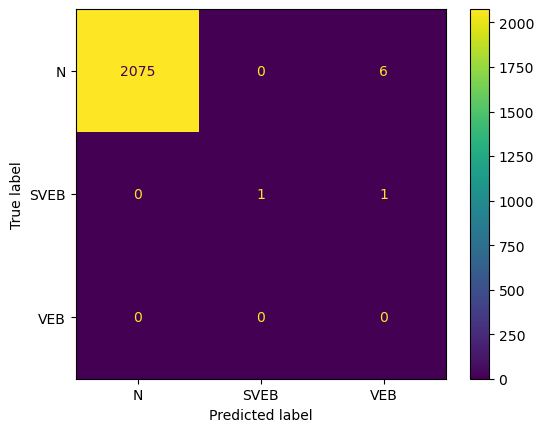

Fold 4:
  Test:  patient=3
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.15      0.93      0.25        41

    accuracy                           0.91      2566
   macro avg       0.38      0.61      0.40      2566
weighted avg       0.99      0.91      0.94      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999131  0.0   0.146154  0.910756     0.381762      0.985502
recall        0.910495  NaN   0.926829  0.910756     0.612441      0.910756
f1-score      0.952756  NaN   0.252492  0.910756     0.401749      0.941567
support    2525.000000  0.0  41.000000  0.910756  2566.000000   2566.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

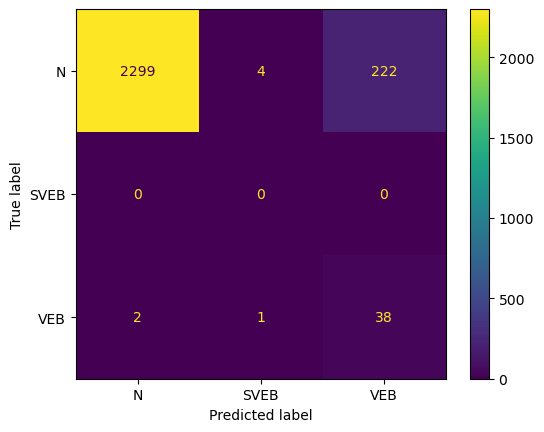

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.35      0.51       520

    accuracy                           0.83      2026
   macro avg       0.60      0.45      0.47      2026
weighted avg       0.86      0.83      0.80      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.820781  0.0    0.973118  0.826259     0.597966      0.859880
recall        0.991368  NaN    0.348077  0.826259     0.446482      0.826259
f1-score      0.898045  NaN    0.512748  0.826259     0.470264      0.799153
support    1506.000000  0.0  520.000000  0.826259  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

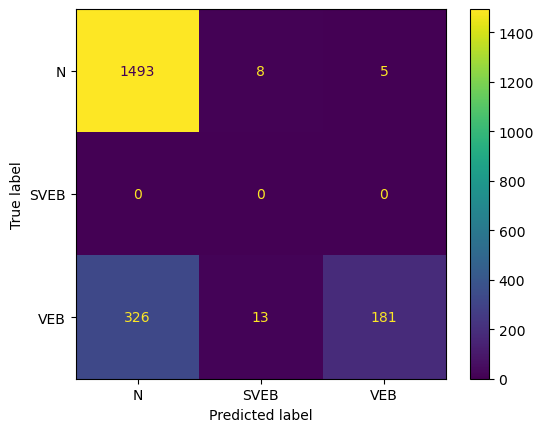

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.02      0.53      0.05        17

    accuracy                           0.79      1760
   macro avg       0.34      0.44      0.31      1760
weighted avg       0.98      0.79      0.87      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.993497  0.0   0.024658  0.786364     0.339385      0.981881
recall        0.790684  0.0   0.529412  0.786364     0.440032      0.786364
f1-score      0.880564  0.0   0.047120  0.786364     0.309228      0.870512
support    1739.000000  4.0  17.000000  0.786364  1760.000000   1760.000000


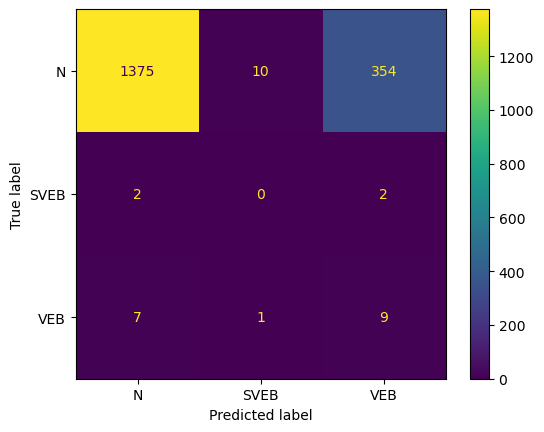

Fold 7:
  Test:  patient=6
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.28      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.02      0.84      0.03        38

    accuracy                           0.18      2529
   macro avg       0.34      0.34      0.10      2529
weighted avg       0.98      0.18      0.28      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995157  0.0   0.015195  0.175168     0.336784      0.980433
recall        0.164994  NaN   0.842105  0.175168     0.335700      0.175168
f1-score      0.283058  NaN   0.029851  0.175168     0.104303      0.279253
support    2491.000000  0.0  38.000000  0.175168  2529.000000   2529.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

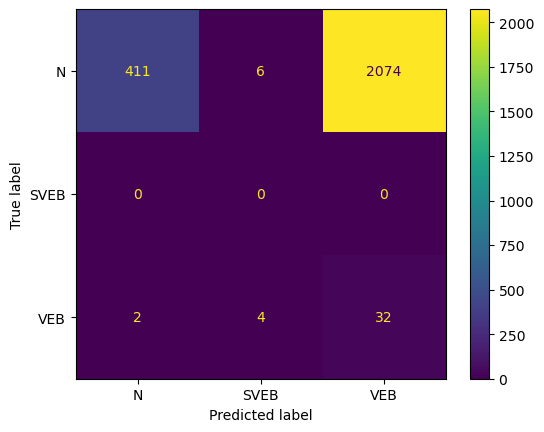

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.02         1

    accuracy                           0.71      2123
   macro avg       0.34      0.57      0.28      2123
weighted avg       1.00      0.71      0.83      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.007576  0.708431     0.335859      0.999533
recall        0.708294  NaN  1.000000  0.708431     0.569431      0.708431
f1-score      0.829241  NaN  0.015038  0.708431     0.281426      0.828858
support    2122.000000  0.0  1.000000  0.708431  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

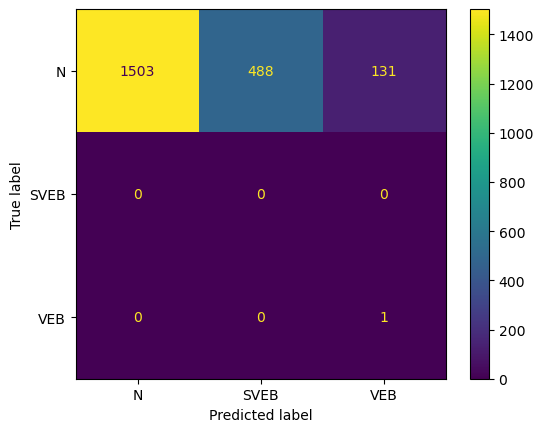

Fold 9:
  Test:  patient=8
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2536
         1.0       0.08      1.00      0.14         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.94      2538
   macro avg       0.36      0.65      0.37      2538
weighted avg       1.00      0.94      0.97      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.076923  0.0  0.941292     0.358974      0.999273
recall        0.941246  1.000000  NaN  0.941292     0.647082      0.941292
f1-score      0.969734  0.142857  NaN  0.941292     0.370864      0.969082
support    2536.000000  2.000000  0.0  0.941292  2538.000000   2538.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

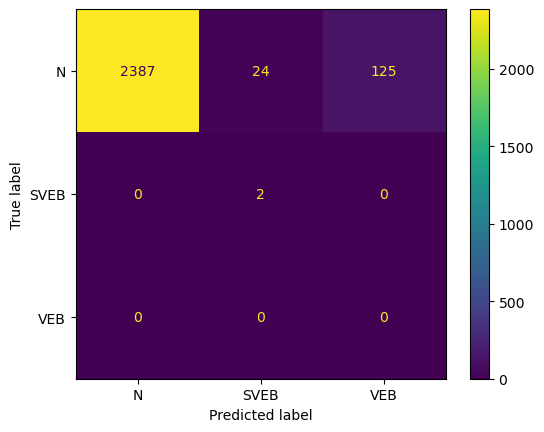

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1788
         1.0       0.05      0.17      0.07         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1794
   macro avg       0.35      0.37      0.35      1794
weighted avg       1.00      0.95      0.97      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998833  0.045455  0.0  0.954849     0.348096      0.995645
recall        0.957494  0.166667  NaN  0.954849     0.374720      0.954849
f1-score      0.977727  0.071429  NaN  0.954849     0.349719      0.974696
support    1788.000000  6.000000  0.0  0.954849  1794.000000   1794.000000


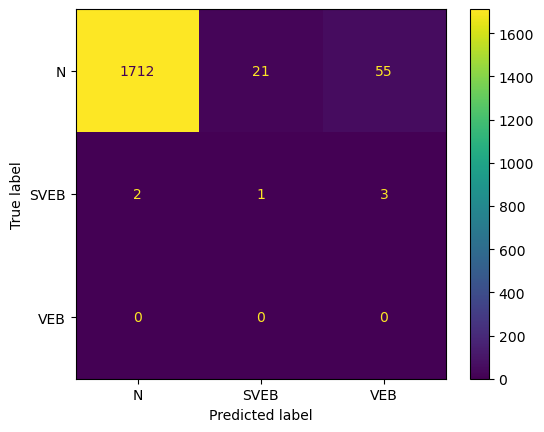

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      1819
         1.0       0.04      0.08      0.06        12
         2.0       0.21      0.77      0.33        43

    accuracy                           0.91      1874
   macro avg       0.41      0.59      0.45      1874
weighted avg       0.97      0.91      0.94      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991726   0.041667   0.208861  0.913554     0.414084   
recall        0.922485   0.083333   0.767442  0.913554     0.591087   
f1-score      0.955853   0.055556   0.328358  0.913554     0.446589   
support    1819.000000  12.000000  43.000000  0.913554  1874.000000   

           weighted avg  
precision      0.967679  
recall         0.913554  
f1-score       0.935690  
support     1874.000000  


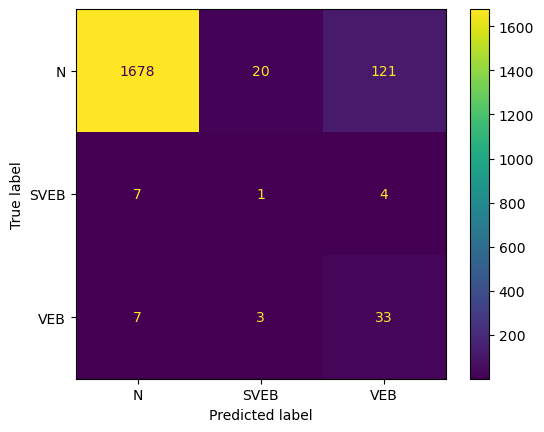

Fold 12:
  Test:  patient=11


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.99      1.00      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.992828     0.333333      1.000000
recall        0.992828  NaN  NaN  0.992828     0.330943      0.992828
f1-score      0.996401  NaN  NaN  0.992828     0.332134      0.996401
support    1952.000000  0.0  0.0  0.992828  1952.000000   1952.000000


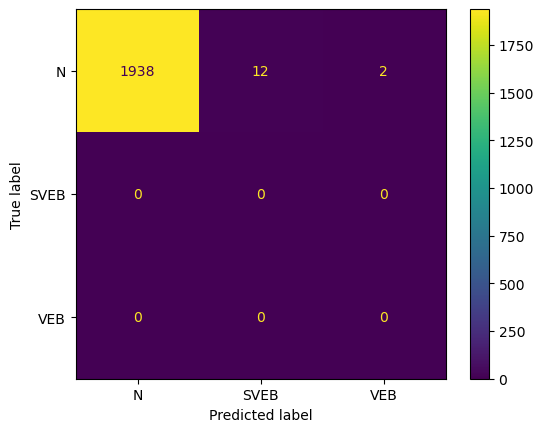

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.71      0.96      0.82       109

    accuracy                           0.97      2411
   macro avg       0.57      0.65      0.60      2411
weighted avg       0.98      0.97      0.98      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997778  0.0    0.714286  0.974699     0.570688      0.984547
recall        0.975663  0.0    0.963303  0.974699     0.646322      0.974699
f1-score      0.986596  0.0    0.820312  0.974699     0.602303      0.978670
support    2301.000000  1.0  109.000000  0.974699  2411.000000   2411.000000


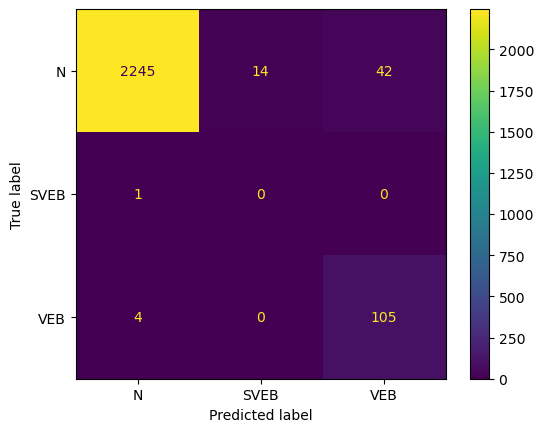

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1533
         1.0       0.01      1.00      0.02         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      1534
   macro avg       0.34      0.63      0.32      1534
weighted avg       1.00      0.89      0.94      1534

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.007752  0.0  0.894394     0.335917      0.999353
recall        0.894325  1.000000  NaN  0.894394     0.631442      0.894394
f1-score      0.944215  0.015385  NaN  0.894394     0.319866      0.943609
support    1533.000000  1.000000  0.0  0.894394  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

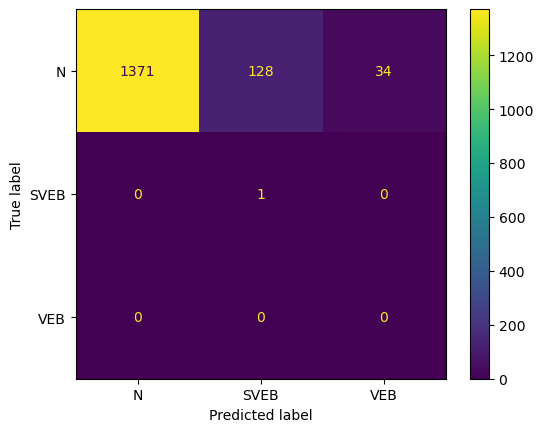

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      2165
         1.0       0.70      0.24      0.36        96
         2.0       0.06      0.69      0.10        16

    accuracy                           0.90      2277
   macro avg       0.58      0.62      0.47      2277
weighted avg       0.97      0.90      0.93      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.987787   0.696970   0.055838  0.902942     0.580198   
recall        0.933949   0.239583   0.687500  0.902942     0.620344   
f1-score      0.960114   0.356589   0.103286  0.902942     0.473330   
support    2165.000000  96.000000  16.000000  0.902942  2277.000000   

           weighted avg  
precision      0.968977  
recall         0.902942  
f1-score       0.928648  
support     2277.000000  


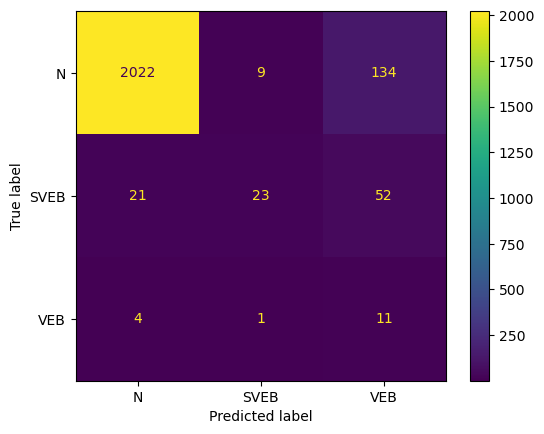

Fold 16:
  Test:  patient=15
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.11      0.19       444

    accuracy                           0.79      1986
   macro avg       0.63      0.37      0.38      1986
weighted avg       0.94      0.79      0.79      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.935701  0.0    0.959184  0.793051     0.631628      0.940951
recall        0.990921  NaN    0.105856  0.793051     0.365592      0.793051
f1-score      0.962520  NaN    0.190669  0.793051     0.384396      0.789961
support    1542.000000  0.0  444.000000  0.793051  1986.000000   1986.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

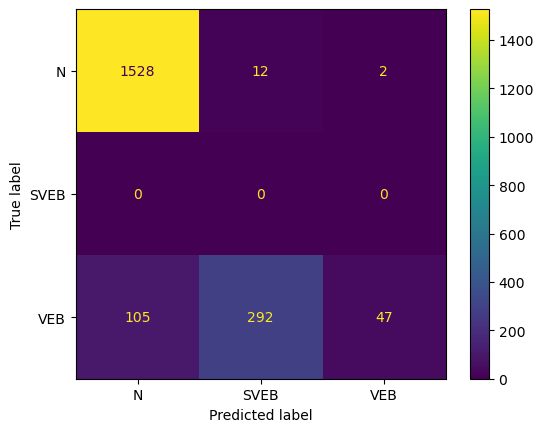

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1860
         1.0       0.01      1.00      0.02         1
         2.0       0.02      1.00      0.04         1

    accuracy                           0.92      1862
   macro avg       0.34      0.97      0.34      1862
weighted avg       1.00      0.92      0.96      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.009346  0.020000  0.916756     0.343115   
recall        0.916667  1.000000  1.000000  0.916756     0.972222   
f1-score      0.956522  0.018519  0.039216  0.916756     0.338085   
support    1860.000000  1.000000  1.000000  0.916756  1862.000000   

           weighted avg  
precision      0.998942  
recall         0.916756  
f1-score       0.955525  
support     1862.000000  


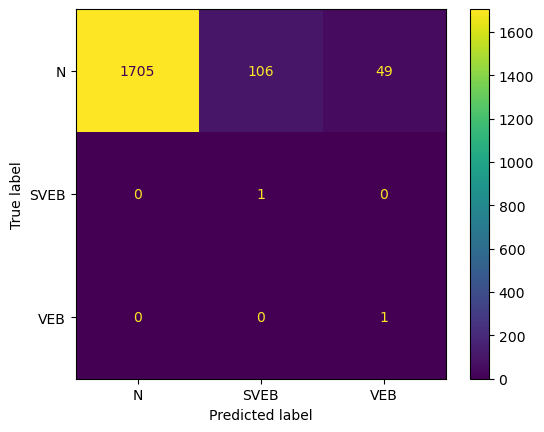

Fold 18:
  Test:  patient=17


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.79      2475
   macro avg       0.33      0.26      0.29      2475
weighted avg       1.00      0.79      0.88      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.787475     0.333333      1.000000
recall        0.787475  NaN  NaN  0.787475     0.262492      0.787475
f1-score      0.881103  NaN  NaN  0.787475     0.293701      0.881103
support    2475.000000  0.0  0.0  0.787475  2475.000000   2475.000000


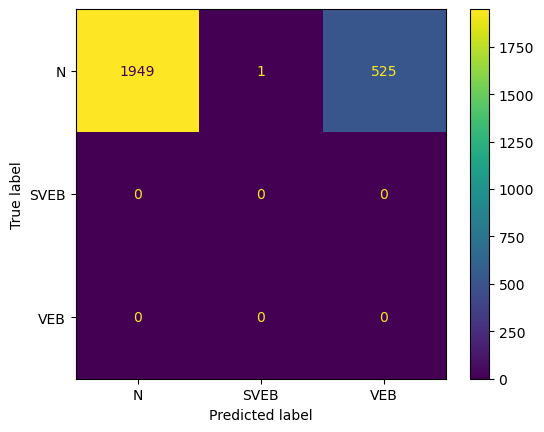

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.33      0.00         3

    accuracy                           0.60      1517
   macro avg       0.33      0.31      0.25      1517
weighted avg       1.00      0.60      0.74      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998893  0.0  0.001706  0.595254     0.333533      0.996921
recall        0.595773  NaN  0.333333  0.595254     0.309702      0.595254
f1-score      0.746380  NaN  0.003396  0.595254     0.249925      0.744910
support    1514.000000  0.0  3.000000  0.595254  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

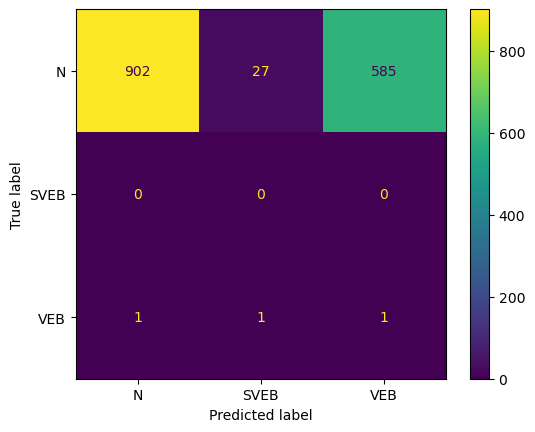

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.97      0.48      0.64      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.04      0.77      0.08        47

    accuracy                           0.48      1613
   macro avg       0.34      0.41      0.24      1613
weighted avg       0.92      0.48      0.61      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.969536   0.0   0.042007  0.476131     0.337181      0.923876
recall        0.476873   0.0   0.765957  0.476131     0.414277      0.476131
f1-score      0.639301   0.0   0.079646  0.476131     0.239649      0.610707
support    1535.000000  31.0  47.000000  0.476131  1613.000000   1613.000000


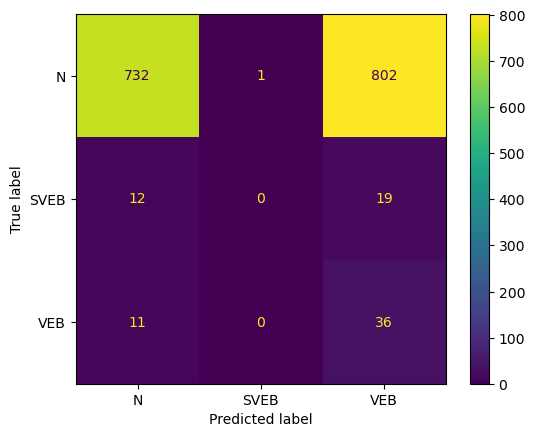

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1742
         1.0       0.03      0.07      0.04        30
         2.0       0.83      0.95      0.89       826

    accuracy                           0.89      2598
   macro avg       0.61      0.63      0.62      2598
weighted avg       0.91      0.89      0.90      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.963102   0.033898    0.832979  0.894919     0.609993   
recall        0.884041   0.066667    0.947942  0.894919     0.632883   
f1-score      0.921880   0.044944    0.886750  0.894919     0.617858   
support    1742.000000  30.000000  826.000000  0.894919  2598.000000   

           weighted avg  
precision      0.911001  
recall         0.894919  
f1-score       0.900584  
support     2598.000000  


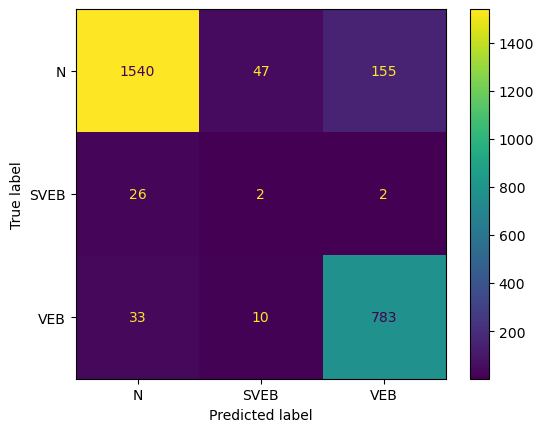

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1634
         1.0       0.27      0.34      0.30       128
         2.0       0.24      0.15      0.18       198

    accuracy                           0.79      1960
   macro avg       0.46      0.46      0.46      1960
weighted avg       0.77      0.79      0.78      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.878427    0.273292    0.239669  0.789286     0.463796   
recall        0.902081    0.343750    0.146465  0.789286     0.464098   
f1-score      0.890097    0.304498    0.181818  0.789286     0.458804   
support    1634.000000  128.000000  198.000000  0.789286  1960.000000   

           weighted avg  
precision      0.774380  
recall         0.789286  
f1-score       0.780303  
support     1960.000000  


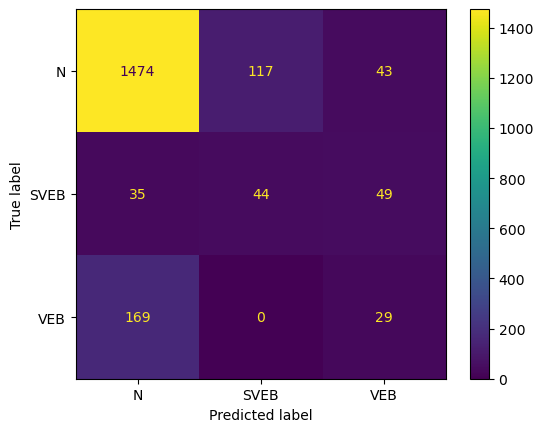

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2060
         1.0       0.31      0.35      0.32        55
         2.0       0.24      0.89      0.38        19

    accuracy                           0.95      2134
   macro avg       0.51      0.73      0.56      2134
weighted avg       0.97      0.95      0.96      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.993003   0.306452   0.239437  0.947985     0.512964   
recall        0.964563   0.345455   0.894737  0.947985     0.734918   
f1-score      0.978577   0.324786   0.377778  0.947985     0.560380   
support    2060.000000  55.000000  19.000000  0.947985  2134.000000   

           weighted avg  
precision      0.968600  
recall         0.947985  
f1-score       0.956377  
support     2134.000000  


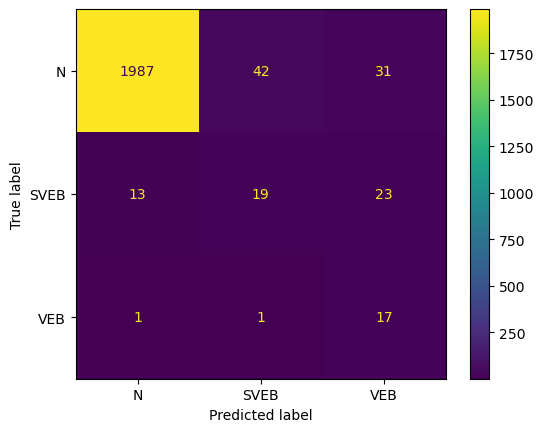

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.32      0.83      0.46       444

    accuracy                           0.67      2974
   macro avg       0.43      0.49      0.41      2974
weighted avg       0.86      0.67      0.72      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.960831  0.0    0.319686  0.667787     0.426839      0.864466
recall        0.640427  0.0    0.826577  0.667787     0.489001      0.667787
f1-score      0.768573  0.0    0.461055  0.667787     0.409876      0.722146
support    2528.000000  2.0  444.000000  0.667787  2974.000000   2974.000000


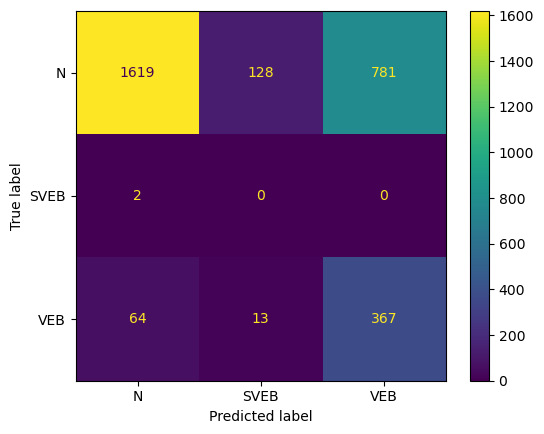

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2570
         1.0       0.08      0.33      0.12         3
         2.0       0.84      0.90      0.87        71

    accuracy                           0.99      2644
   macro avg       0.64      0.74      0.66      2644
weighted avg       0.99      0.99      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.997652  0.076923   0.842105  0.988654     0.638893   
recall        0.991829  0.333333   0.901408  0.988654     0.742190   
f1-score      0.994732  0.125000   0.870748  0.988654     0.663493   
support    2570.000000  3.000000  71.000000  0.988654  2644.000000   

           weighted avg  
precision      0.992430  
recall         0.988654  
f1-score       0.990416  
support     2644.000000  


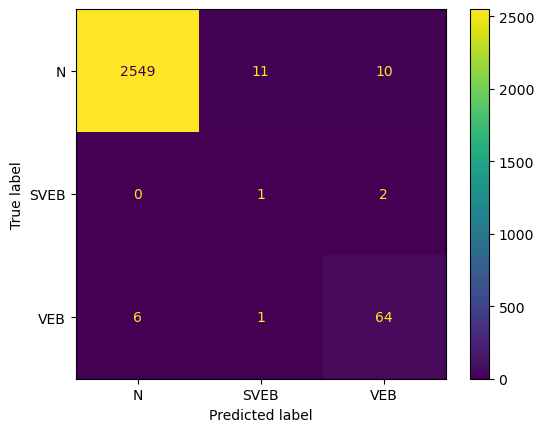

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.46      0.06      0.11      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.45      0.10       210

    accuracy                           0.10      1859
   macro avg       0.17      0.17      0.07      1859
weighted avg       0.39      0.10      0.10      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.457711    0.0    0.057004  0.100054     0.171572      0.386347
recall        0.059624    0.0    0.447619  0.100054     0.169081      0.100054
f1-score      0.105505    0.0    0.101130  0.100054     0.068878      0.098995
support    1543.000000  106.0  210.000000  0.100054  1859.000000   1859.000000


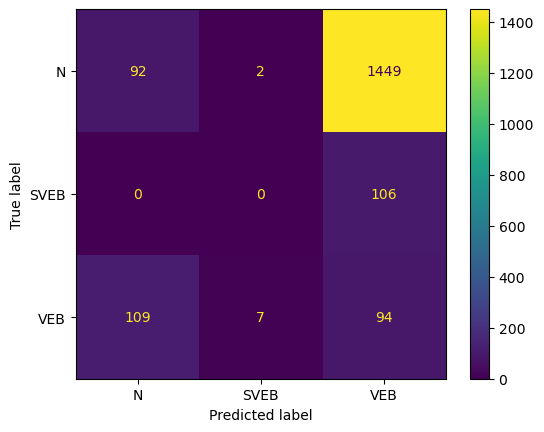

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.87      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.94      0.25      0.40       992

    accuracy                           0.69      2579
   macro avg       0.58      0.41      0.42      2579
weighted avg       0.84      0.69      0.69      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.783963  0.0    0.943396  0.692129     0.575786      0.844680
recall        0.968454  0.0    0.252016  0.692129     0.406823      0.692129
f1-score      0.866497  0.0    0.397772  0.692129     0.421423      0.685533
support    1585.000000  2.0  992.000000  0.692129  2579.000000   2579.000000


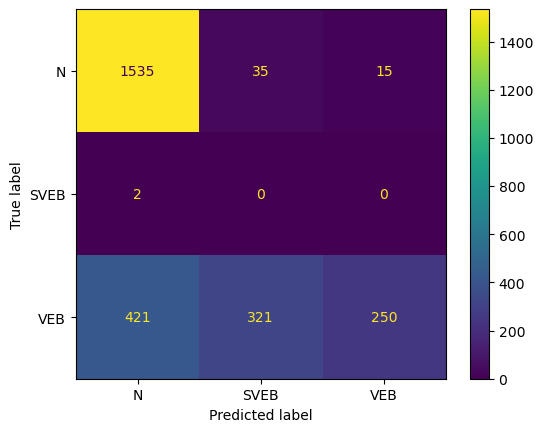

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.89      0.61      0.73      2620
         1.0       0.85      0.29      0.43       383
         2.0       0.00      1.00      0.00         1

    accuracy                           0.57      3004
   macro avg       0.58      0.63      0.39      3004
weighted avg       0.89      0.57      0.69      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.894007    0.853846  0.000933  0.573569     0.582929   
recall        0.614885    0.289817  1.000000  0.573569     0.634901   
f1-score      0.728630    0.432749  0.001864  0.573569     0.387747   
support    2620.000000  383.000000  1.000000  0.573569  3004.000000   

           weighted avg  
precision      0.888589  
recall         0.573569  
f1-score       0.690664  
support     3004.000000  


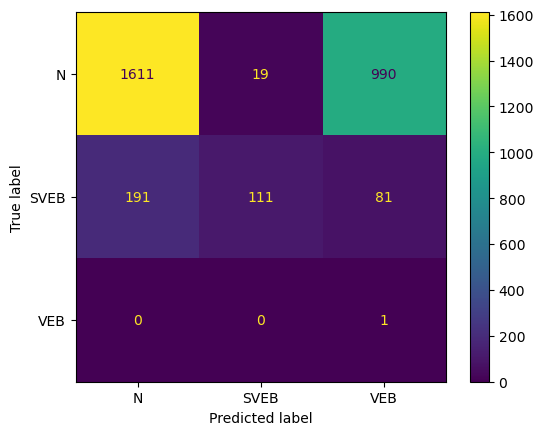

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      2422
         1.0       0.04      0.50      0.08        22
         2.0       0.45      0.73      0.56       195

    accuracy                           0.82      2639
   macro avg       0.49      0.69      0.51      2639
weighted avg       0.93      0.82      0.87      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.975422   0.044177    0.450794  0.824934     0.490131   
recall        0.835673   0.500000    0.728205  0.824934     0.687959   
f1-score      0.900156   0.081181    0.556863  0.824934     0.512733   
support    2422.000000  22.000000  195.000000  0.824934  2639.000000   

           weighted avg  
precision      0.928893  
recall         0.824934  
f1-score       0.867962  
support     2639.000000  


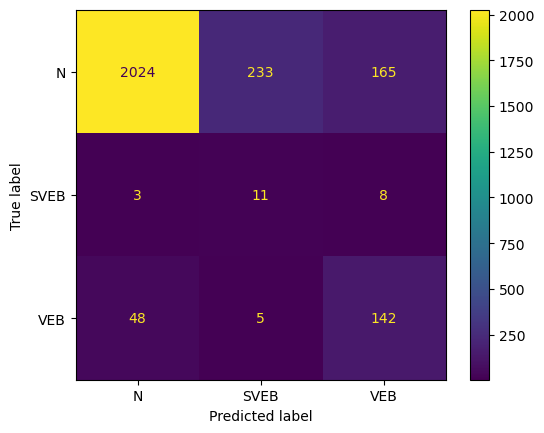

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.82      2747
   macro avg       0.33      0.27      0.30      2747
weighted avg       1.00      0.82      0.90      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.816163     0.333333      1.000000
recall        0.816163  NaN  NaN  0.816163     0.272054      0.816163
f1-score      0.898777  NaN  NaN  0.816163     0.299592      0.898777
support    2747.000000  0.0  0.0  0.816163  2747.000000   2747.000000


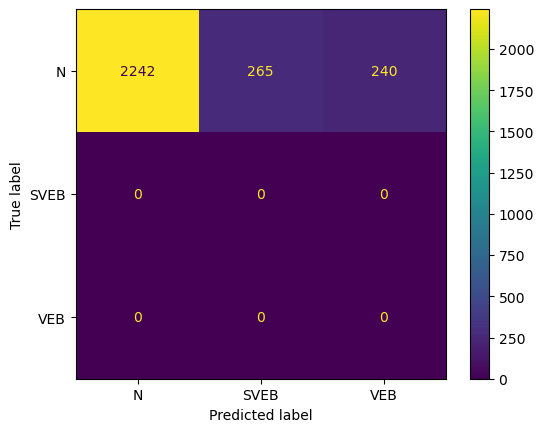

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2640
         1.0       0.17      0.14      0.15        28
         2.0       0.40      0.40      0.40       220

    accuracy                           0.90      2888
   macro avg       0.50      0.50      0.50      2888
weighted avg       0.90      0.90      0.90      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.950795   0.166667    0.396396  0.901662     0.504619   
recall        0.951515   0.142857    0.400000  0.901662     0.498124   
f1-score      0.951155   0.153846    0.398190  0.901662     0.501064   
support    2640.000000  28.000000  220.000000  0.901662  2888.000000   

           weighted avg  
precision      0.900960  
recall         0.901662  
f1-score       0.901301  
support     2888.000000  


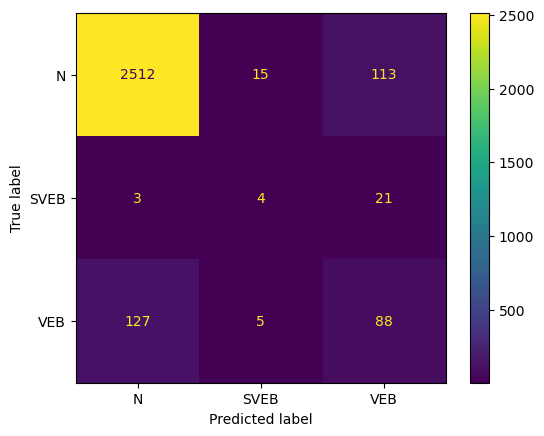

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.85      0.68       256

    accuracy                           0.85      2258
   macro avg       0.52      0.57      0.53      2258
weighted avg       0.93      0.85      0.89      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.980471  0.0    0.569554  0.852081     0.516675      0.933883
recall        0.852647  NaN    0.847656  0.852081     0.566768      0.852081
f1-score      0.912103  NaN    0.681319  0.852081     0.531140      0.885938
support    2002.000000  0.0  256.000000  0.852081  2258.000000   2258.000000


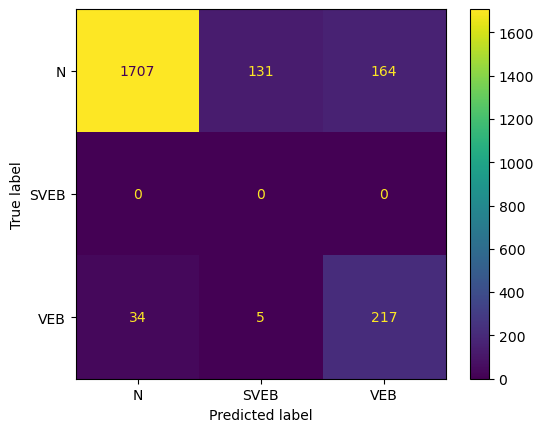

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3194
         1.0       0.03      0.67      0.06         3
         2.0       0.88      0.90      0.89       164

    accuracy                           0.97      3361
   macro avg       0.64      0.85      0.65      3361
weighted avg       0.99      0.97      0.98      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.996808  0.032787    0.880240   0.97352     0.636612   
recall        0.977771  0.666667    0.896341   0.97352     0.846926   
f1-score      0.987198  0.062500    0.888218   0.97352     0.645972   
support    3194.000000  3.000000  164.000000   0.97352  3361.000000   

           weighted avg  
precision      0.990260  
recall         0.973520  
f1-score       0.981543  
support     3361.000000  


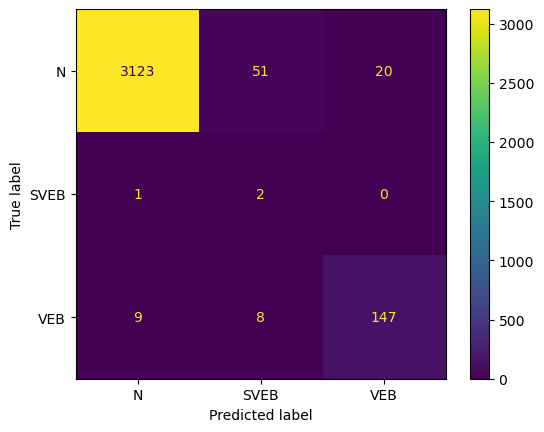

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      2081
         1.0       0.03      0.14      0.05         7
         2.0       0.10      0.52      0.16        64

    accuracy                           0.83      2152
   macro avg       0.37      0.50      0.37      2152
weighted avg       0.95      0.83      0.88      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.981962  0.027027   0.096774  0.825279     0.368588   
recall        0.837098  0.142857   0.515625  0.825279     0.498527   
f1-score      0.903761  0.045455   0.162963  0.825279     0.370726   
support    2081.000000  7.000000  64.000000  0.825279  2152.000000   

           weighted avg  
precision      0.952530  
recall         0.825279  
f1-score       0.878938  
support     2152.000000  


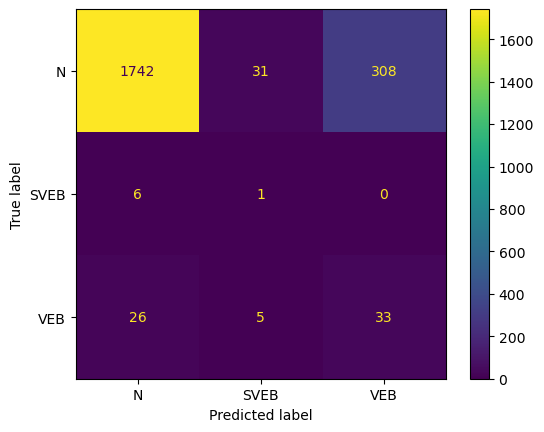

Fold 35:
  Test:  patient=34


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1953
         1.0       0.97      0.32      0.48        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2047
   macro avg       0.65      0.44      0.49      2047
weighted avg       0.97      0.97      0.96      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.974513   0.967742  0.0  0.967269     0.647418      0.974202
recall        0.998464   0.319149  NaN  0.967269     0.439204      0.967269
f1-score      0.986343   0.480000  NaN  0.967269     0.488781      0.963091
support    1953.000000  94.000000  0.0  0.967269  2047.000000   2047.000000


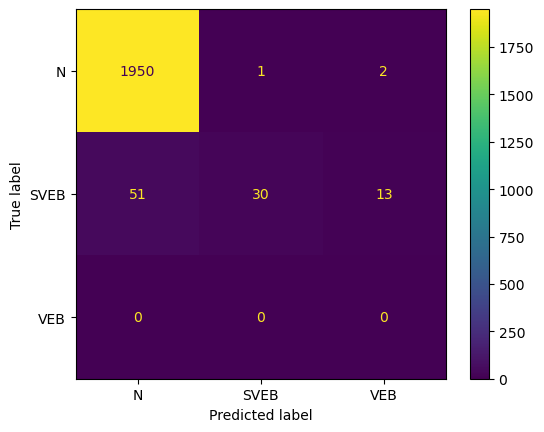

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.78      0.45      0.57       396

    accuracy                           0.81      2426
   macro avg       0.59      0.44      0.50      2426
weighted avg       0.96      0.81      0.88      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999441  0.0    0.779221    0.8108     0.592887      0.963494
recall        0.880296  NaN    0.454545    0.8108     0.444947      0.810800
f1-score      0.936092  NaN    0.574163    0.8108     0.503418      0.877014
support    2030.000000  0.0  396.000000    0.8108  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

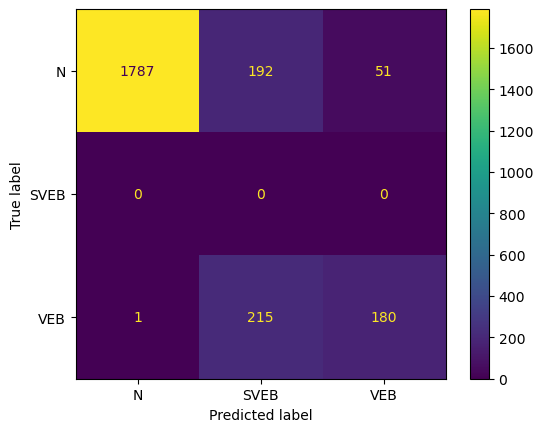

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79      2273
         1.0       0.33      0.34      0.33       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.64      2482
   macro avg       0.43      0.34      0.37      2482
weighted avg       0.91      0.64      0.75      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.961031    0.327189  0.0  0.644641     0.429407      0.907657
recall        0.672679    0.339713  NaN  0.644641     0.337464      0.644641
f1-score      0.791408    0.333333  NaN  0.644641     0.374914      0.752835
support    2273.000000  209.000000  0.0  0.644641  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

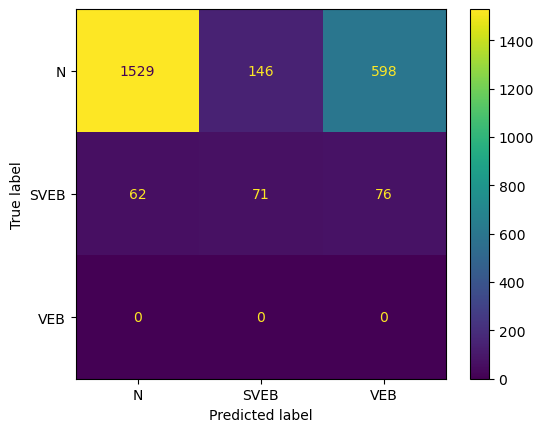

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2044
         1.0       0.14      0.14      0.14        73
         2.0       0.87      0.81      0.84       473

    accuracy                           0.92      2590
   macro avg       0.66      0.64      0.65      2590
weighted avg       0.92      0.92      0.92      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.964337   0.136986    0.868778   0.92471     0.656701   
recall        0.978963   0.136986    0.811839   0.92471     0.642596   
f1-score      0.971595   0.136986    0.839344   0.92471     0.649309   
support    2044.000000  73.000000  473.000000   0.92471  2590.000000   

           weighted avg  
precision      0.923567  
recall         0.924710  
f1-score       0.923919  
support     2590.000000  


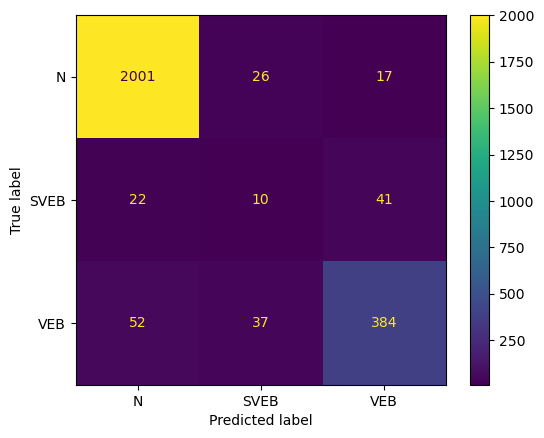

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1687
         1.0       0.01      0.33      0.02         3
         2.0       0.74      0.94      0.83       362

    accuracy                           0.89      2052
   macro avg       0.58      0.72      0.59      2052
weighted avg       0.94      0.89      0.91      2052

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.988008  0.010753    0.742358  0.888889     0.580373   
recall        0.879075  0.333333    0.939227  0.888889     0.717212   
f1-score      0.930364  0.020833    0.829268  0.888889     0.593488   
support    1687.000000  3.000000  362.000000  0.888889  2052.000000   

           weighted avg  
precision      0.943243  
recall         0.888889  
f1-score       0.911200  
support     2052.000000  


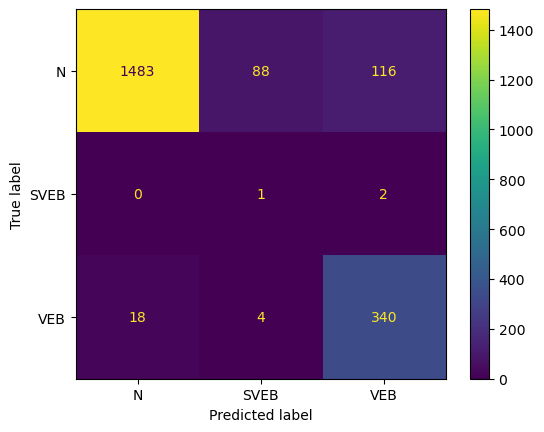

Fold 40:
  Test:  patient=39
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.01         1

    accuracy                           0.69      2255
   macro avg       0.34      0.56      0.28      2255
weighted avg       1.00      0.69      0.82      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.005155  0.690909     0.335052      0.999559
recall        0.690772  NaN  1.000000  0.690909     0.563591      0.690909
f1-score      0.817108  NaN  0.010256  0.690909     0.275788      0.816751
support    2254.000000  0.0  1.000000  0.690909  2255.000000   2255.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

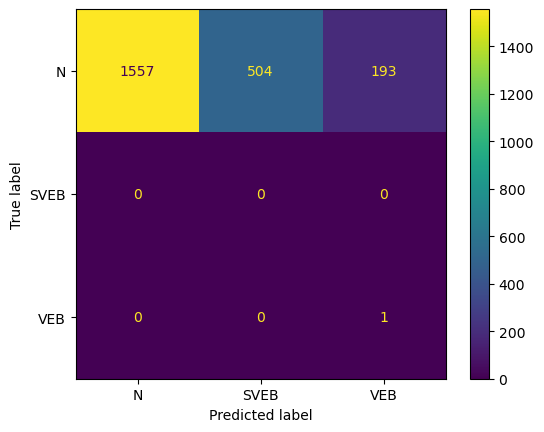

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.03      0.50      0.06         2

    accuracy                           0.88      1570
   macro avg       0.34      0.46      0.33      1570
weighted avg       1.00      0.88      0.93      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998553  0.0  0.031250  0.879618     0.343268      0.996685
recall        0.880664  0.0  0.500000  0.879618     0.460221      0.879618
f1-score      0.935910  0.0  0.058824  0.879618     0.331578      0.934197
support    1567.000000  1.0  2.000000  0.879618  1570.000000   1570.000000


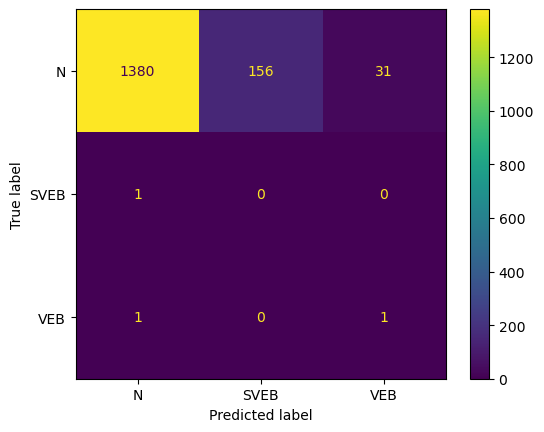

Fold 42:
  Test:  patient=41


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.36      0.96      0.52       398
         1.0       1.00      0.45      0.62      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.56      1779
   macro avg       0.45      0.47      0.38      1779
weighted avg       0.85      0.56      0.60      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.356075     0.996790  0.0  0.563238     0.450955      0.853448
recall       0.957286     0.449674  NaN  0.563238     0.468987      0.563238
f1-score     0.519074     0.619760  NaN  0.563238     0.379611      0.597235
support    398.000000  1381.000000  0.0  0.563238  1779.000000   1779.000000


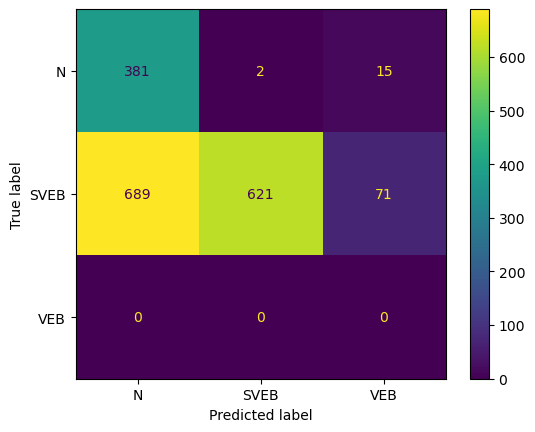

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2229
         1.0       0.08      0.43      0.14         7
         2.0       0.98      0.94      0.96       831

    accuracy                           0.97      3067
   macro avg       0.68      0.79      0.70      3067
weighted avg       0.98      0.97      0.98      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.985235  0.083333    0.981156   0.97359     0.683241   
recall        0.987887  0.428571    0.939832   0.97359     0.785430   
f1-score      0.986559  0.139535    0.960049   0.97359     0.695381   
support    2229.000000  7.000000  831.000000   0.97359  3067.000000   

           weighted avg  
precision      0.982071  
recall         0.973590  
f1-score       0.977443  
support     3067.000000  


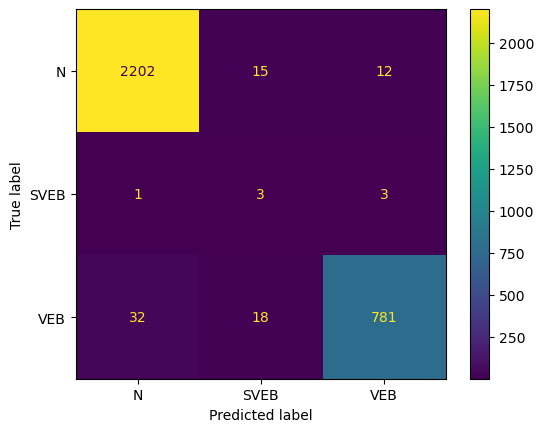

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2699
         1.0       0.02      0.12      0.04        50
         2.0       0.07      1.00      0.12         3

    accuracy                           0.88      2752
   macro avg       0.36      0.67      0.37      2752
weighted avg       0.96      0.88      0.92      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.981997   0.022814  0.066667  0.875363     0.357159   
recall        0.889218   0.120000  1.000000  0.875363     0.669739   
f1-score      0.933307   0.038339  0.125000  0.875363     0.365549   
support    2699.000000  50.000000  3.000000  0.875363  2752.000000   

           weighted avg  
precision      0.963572  
recall         0.875363  
f1-score       0.916166  
support     2752.000000  


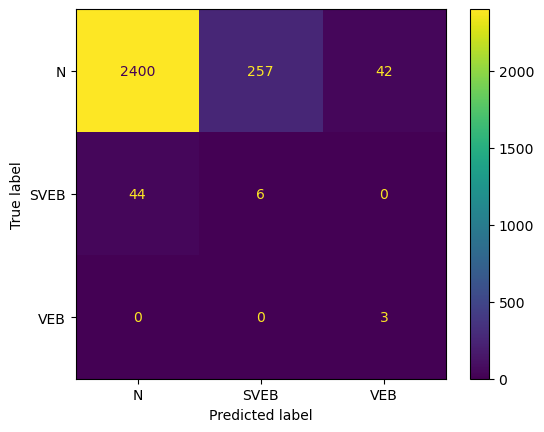

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_features19, acc_features19,confusion_matrix_final_19features,list_select_19 = cross_valid(pipe_select_19, skf, X, y,groups)
end_time=time.time()

In [47]:
df_features19

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.873182   0.179294    0.357913     0.424004      0.848008
precision     0.948004   0.173988    0.284662     0.468884      0.941439
recall        0.841657   0.308994    0.718783     0.535156      0.808531
support    2047.340909  63.159091  159.295455  2269.795455   2269.795455

In [48]:
confusion_matrix_final_19features

array([[75788.,  3409., 10886.],
       [ 1197.,   978.,   604.],
       [ 1620.,   971.,  4418.]])

In [49]:
list_select_19

{'patient0': {'0.0': 0.9875593757068537,
  '1.0': 0.39999999999999997,
  '2.0': 0.025641025641025647,
  'macro avg': 0.47106680044929305,
  'weighted avg': 0.9786019031063289},
 'patient1': {'0.0': 0.9983836206896551,
  '1.0': 0.6666666666666666,
  'macro avg': 0.5550167624521073,
  'weighted avg': 0.9978491680247416},
 'patient2': {'0.0': 0.9985563041385949,
  '1.0': 0.6666666666666666,
  'macro avg': 0.5550743236017538,
  'weighted avg': 0.9982376391002158},
 'patient3': {'0.0': 0.9527559055118111,
  '2.0': 0.25249169435215946,
  'macro avg': 0.4017491999546568,
  'weighted avg': 0.941566960594607},
 'patient4': {'0.0': 0.8980451127819549,
  '2.0': 0.5127478753541076,
  'macro avg': 0.4702643293786875,
  'weighted avg': 0.7991534230176505},
 'patient5': {'0.0': 0.8805635606788343,
  '1.0': 0.0,
  '2.0': 0.04712041884816753,
  'macro avg': 0.3092279931756673,
  'weighted avg': 0.8705119767846089},
 'patient6': {'0.0': 0.2830578512396695,
  '2.0': 0.02985074626865672,
  'macro avg': 0.

In [50]:
print("Time"+str(end_time-start_time))

Time1423.0463008880615


In [54]:
from utils import retrieve_fscore_avg,compare_plots

In [55]:
list_normal=retrieve_fscore_avg(list_fscore)
list_smote=retrieve_fscore_avg(list_fscore_smote)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=298.0, pvalue=0.020780881657515238)

In [56]:
list_normal=retrieve_fscore_avg(list_fscore_PCA)
list_smote=retrieve_fscore_avg(list_fscore_smote)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=373.0, pvalue=0.1576424579131981)

In [57]:
list_normal=retrieve_fscore_avg(list_fscore)
list_smote=retrieve_fscore_avg(list_fscore_PCA)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=242.0, pvalue=0.002608097674851706)

In [58]:
list_normal=retrieve_fscore_avg(list_select_30)
list_smote=retrieve_fscore_avg(list_fscore_smote)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=431.0, pvalue=0.46242261272516316)

In [59]:
list_normal=retrieve_fscore_avg(list_select_19)
list_smote=retrieve_fscore_avg(list_fscore_smote)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=424.0, pvalue=0.41437451547221826)

In [60]:
list_normal=retrieve_fscore_avg(list_fscore)
list_smote=retrieve_fscore_avg(list_select_30)
wilcoxon(list_normal, list_smote)

WilcoxonResult(statistic=370.0, pvalue=0.1474951547022556)

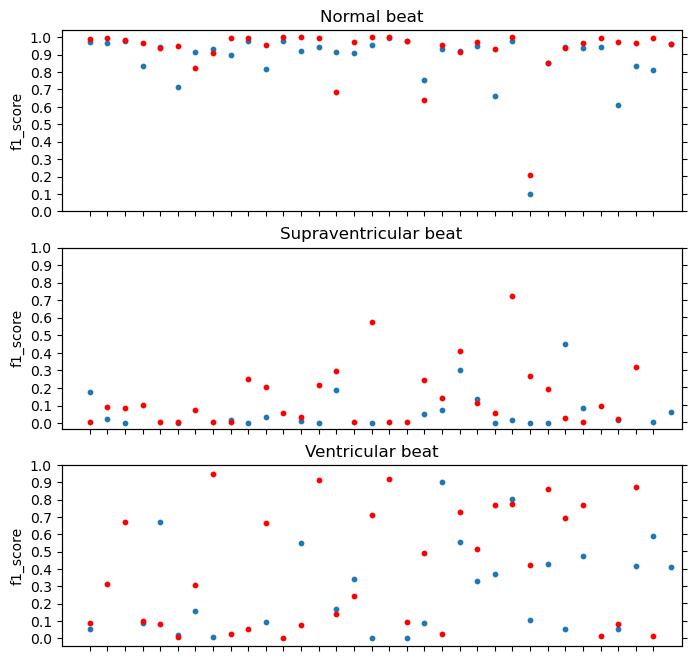

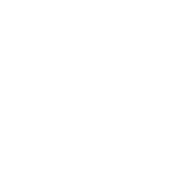

In [61]:
compare_plots(list_fscore,list_fscore_PCA)  #blu è quello a dx, rosso quello a sx

In [62]:
pd.DataFrame(list_fscore).to_csv('list_bestDT.csv')

In [63]:
import json

# export the dictionary to a JSON file
with open('bestDT.json', 'w') as f:
    json.dump(list_fscore, f)
